In [1]:
# # joey's

# import numpy as np
# import pandas as pd
# import seaborn as sns
# import lightgbm as lgb
# from sklearn import metrics
# from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, f1_score, roc_curve, roc_auc_score, classification_report, precision_recall_curve, accuracy_score
# from imblearn.ensemble import BalancedRandomForestClassifier
# import xgboost
# from lightgbm import LGBMClassifier
# from statistics import mean
# import matplotlib.pyplot as plt
# import warnings
# import math

# df_train = pd.read_csv("/kaggle/input/ASNA-hackathon/train.csv") #7290
# df_test = pd.read_csv("/kaggle/input/ASNA-hackathon/test.csv") #1844

# for c in df_train.columns:
#     if c != 'Effective To Date':
#         col_type = df_train[c].dtype
#         if col_type == 'object' or col_type.name == 'category':
#             df_train[c] = df_train[c].astype('category')

# for c in df_test.columns:
#     if c != 'Effective To Date':
#         col_type = df_test[c].dtype
#         if col_type == 'object' or col_type.name == 'category':
#             df_test[c] = df_test[c].astype('category')

# cols_with_missing = [col for col in df_train.columns 
#                                  if df_train[col].isnull().any()]                                  
# candidate_train_predictors = df_train.drop(['CustomerID', 'Claim over 1k', 'Coverage', 'Education', 'Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'Vehicle Size'] + cols_with_missing, axis=1)
# candidate_test_predictors = df_test.drop(['CustomerID', 'Coverage', 'Education', 'Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'Vehicle Size'] + cols_with_missing, axis=1)
# candidate_train_predictors['Effective To Date'] = pd.to_datetime(candidate_train_predictors['Effective To Date'])
# candidate_train_predictors['Current Date'] = '10/1/2024'
# candidate_train_predictors['Current Date'] = pd.to_datetime(candidate_train_predictors['Current Date'])

# # create new columns
# candidate_train_predictors['clv_avg'] = candidate_train_predictors['Customer Lifetime Value'] / candidate_train_predictors['Months Since Policy Inception']
# candidate_train_predictors['complaints_avg'] = candidate_train_predictors['Number of Open Complaints'] / candidate_train_predictors['Number of Policies']
# candidate_train_predictors = candidate_train_predictors.drop(['Number of Open Complaints'], axis=1)
# candidate_train_predictors['Policy Age (in months)'] = ((candidate_train_predictors['Current Date'] - candidate_train_predictors['Effective To Date']) / pd.Timedelta(days=30.44)).astype(int)
# candidate_train_predictors = candidate_train_predictors.drop(['Current Date', 'Effective To Date'], axis=1)
# # remove noise
# candidate_train_predictors = candidate_train_predictors.drop(['State', 'Policy', 'Sales Channel', 'Renew Offer Type', 'Policy Type'], axis=1)
# candidate_test_predictors['Effective To Date'] = pd.to_datetime(candidate_test_predictors['Effective To Date'])
# candidate_test_predictors['Current Date'] = '10/1/2024'
# candidate_test_predictors['Current Date'] = pd.to_datetime(candidate_test_predictors['Current Date'])

# # create new columns
# candidate_test_predictors['clv_avg'] = candidate_test_predictors['Customer Lifetime Value'] / candidate_test_predictors['Months Since Policy Inception']
# candidate_test_predictors['complaints_avg'] = candidate_test_predictors['Number of Open Complaints'] / candidate_test_predictors['Number of Policies']
# candidate_test_predictors = candidate_test_predictors.drop(['Number of Open Complaints'], axis=1)
# candidate_test_predictors['Policy Age (in months)'] = ((candidate_test_predictors['Current Date'] - candidate_test_predictors['Effective To Date']) / pd.Timedelta(days=30.44)).astype(int)
# candidate_test_predictors = candidate_test_predictors.drop(['Current Date', 'Effective To Date'], axis=1)
# # remove noise
# candidate_test_predictors = candidate_test_predictors.drop(['State', 'Policy', 'Sales Channel', 'Renew Offer Type', 'Policy Type'], axis=1)
# y = df_train['Claim over 1k']
# X = candidate_train_predictors
# train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=314, stratify=y)
# lgbm = LGBMClassifier(objective='binary')
# lgbm.fit(train_X,train_y)
# val_y_predlgbm = lgbm.predict(val_X)

# fpr, tpr, thresholds = metrics.roc_curve(val_y, val_y_predlgbm, pos_label=1)
# auc_roc = metrics.auc(fpr, tpr)
# precision, recall, _ = precision_recall_curve(val_y, val_y_predlgbm)
# auc_pr = auc(recall, precision)

# print("Recall of LightGBM on test set:",metrics.recall_score(val_y, val_y_predlgbm,average='binary')) 
# print('Precision of LightGBM on test set: {:.2f}'.format(precision_score(val_y, val_y_predlgbm))) 
# print('F1 score of LightGBM on test set: {:.2f}'.format(f1_score(val_y, val_y_predlgbm, average='weighted'))) # to account for disbalance

# print(f"ROC-AUC of LightGBM on test set: {auc_roc}")
# print(f"PR-AUC of LightGBM on test set: {auc_pr}")
# import shap
# explainer = shap.Explainer(lgbm)
# shap_values = explainer.shap_values(val_X)
# shap.summary_plot(shap_values[1], val_X)
# best_params = {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 150, 'num_leaves': 31}
# best_model = lgb.LGBMClassifier(**best_params)
# best_model.fit(train_X, train_y)

# val_y_predlgbmht = best_model.predict(val_X)

# fpr, tpr, thresholds = metrics.roc_curve(val_y, val_y_predlgbmht, pos_label=1)
# auc_roc = metrics.auc(fpr, tpr)
# precision, recall, _ = precision_recall_curve(val_y, val_y_predlgbmht)
# auc_pr = auc(recall, precision)

# print("Recall of LightGBM on test set:",metrics.recall_score(val_y, val_y_predlgbmht,average='binary')) 
# print('Precision of LightGBM on test set: {:.2f}'.format(precision_score(val_y, val_y_predlgbmht))) 
# print('F1 score of LightGBM on test set: {:.2f}'.format(f1_score(val_y, val_y_predlgbmht, average='weighted'))) # to account for disbalance

# print(f"ROC-AUC of LightGBM on test set: {auc_roc}")
# print(f"PR-AUC of LightGBM on test set: {auc_pr}")
# predictions = best_model.predict(candidate_test_predictors)
# output = pd.DataFrame({'CustomerID': df_test.CustomerID, 'Claim over 1k': predictions})
# output.to_csv('submission.csv', index=False)
# sum(output['Claim over 1k'].values) / len(output['Claim over 1k'].values)

In [2]:
pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, log_loss, precision_score, recall_score, roc_curve
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import imblearn
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.tree import DecisionTreeClassifier
from tabpfn import TabPFNClassifier 

In [4]:
df = pd.read_csv("/kaggle/input/ASNA-hackathon/train.csv")
df_test = pd.read_csv("/kaggle/input/ASNA-hackathon/test.csv")
sample = pd.read_csv("/kaggle/input/ASNA-hackathon/sample_submission.csv")

In [5]:
df.head()

CustomerID       State  Customer Lifetime Value Response  Coverage  \
0    QC35222  California                  3622.69       No     Basic   
1    AE98193  Washington                 10610.21       No     Basic   
2    TM23514      Oregon                 13868.02       No  Extended   
3    QZ42725  Washington                  3119.69       No     Basic   
4    SG81493     Arizona                  5999.04       No   Premium   

   Coverage Index             Education  Education Index Effective To Date  \
0               0              Bachelor                2          1/1/2024   
1               0  High School or Below                0          1/1/2024   
2               1               College                1          1/1/2024   
3               0              Bachelor                2          1/1/2024   
4               2              Bachelor                2          1/1/2024   

  Employment Status  ...     Policy Type Policy Type Index        Policy  \
0          Employed  ...  Corporate Auto                 1  Corporate L2   
1        Unemployed  ...   Personal Auto                 0   Personal L1   
2          Employed  ...   Personal Auto                 0   Personal L3   
3        Unemployed  ...   Personal Auto                 0   Personal L3   
4          Employed  ...  Corporate Auto                 1  Corporate L1   

  Policy Index  Renew Offer Type  Sales Channel  Sales Channel Index  \
0            4                 3            Web                    0   
1            0                 1         Branch                    1   
2            2                 3            Web                    0   
3            2                 2          Agent                    2   
4            3                 2            Web                    0   

   Vehicle Size  Vehicle Size Index Claim over 1k  
0       Medsize                   1             0  
1       Medsize                   1             1  
2       Medsize                   1             0  
3       Medsize                   1             0  
4       Medsize                   1             0  

[5 rows x 29 columns]

In [6]:
df_test.head()

CustomerID       State  Customer Lifetime Value Response Coverage  \
0    WB38524  California                  4008.95       No    Basic   
1    QP80741  Washington                  8165.58       No    Basic   
2    WP41146  California                  7210.94       No    Basic   
3    KR62797     Arizona                  6198.70       No    Basic   
4    VE55982      Nevada                  3570.32       No    Basic   

   Coverage Index             Education  Education Index Effective To Date  \
0               0  High School or Below                0          1/1/2024   
1               0               College                1          1/1/2024   
2               0  High School or Below                0          1/1/2024   
3               0  High School or Below                0          1/1/2024   
4               0              Bachelor                2          1/1/2024   

  Employment Status  ...  Number of Policies     Policy Type  \
0          Employed  ...                   1   Personal Auto   
1        Unemployed  ...                   2  Corporate Auto   
2        Unemployed  ...                   7   Personal Auto   
3          Employed  ...                   1   Personal Auto   
4          Employed  ...                   1  Corporate Auto   

   Policy Type Index        Policy  Policy Index  Renew Offer Type  \
0                  0   Personal L3             2                 2   
1                  1  Corporate L1             3                 3   
2                  0   Personal L2             1                 1   
3                  0   Personal L2             1                 2   
4                  1  Corporate L1             3                 1   

   Sales Channel  Sales Channel Index  Vehicle Size Vehicle Size Index  
0         Branch                    1         Small                  0  
1          Agent                    2       Medsize                  1  
2         Branch                    1       Medsize                  1  
3    Call Center                    3       Medsize                  1  
4    Call Center                    3       Medsize                  1  

[5 rows x 28 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7290 non-null   object 
 1   State                          7290 non-null   object 
 2   Customer Lifetime Value        7290 non-null   float64
 3   Response                       7290 non-null   object 
 4   Coverage                       7290 non-null   object 
 5   Coverage Index                 7290 non-null   int64  
 6   Education                      7290 non-null   object 
 7   Education Index                7290 non-null   int64  
 8   Effective To Date              7290 non-null   object 
 9   Employment Status              7290 non-null   object 
 10  Employment Status Index        7290 non-null   int64  
 11  Gender                         7290 non-null   object 
 12  Income                         7290 non-null   i

In [8]:
df.describe()

Customer Lifetime Value  Coverage Index  Education Index  \
count              7290.000000     7290.000000      7290.000000   
mean              10798.116623        0.490261         1.287243   
std                9180.878153        0.658827         1.079150   
min                2562.310000        0.000000         0.000000   
25%                5374.027500        0.000000         0.000000   
50%                7845.015000        0.000000         1.000000   
75%               12152.585000        1.000000         2.000000   
max              100208.500000        2.000000         4.000000   

       Employment Status Index         Income  Marital Status Index  \
count              7290.000000    7290.000000           7290.000000   
mean                  0.985597   50573.282579              0.878189   
std                   0.910412   41090.968142              0.638740   
min                   0.000000       0.000000              0.000000   
25%                   0.000000       0.000000              0.000000   
50%                   1.000000   45398.500000              1.000000   
75%                   1.000000   83655.750000              1.000000   
max                   4.000000  134947.000000              2.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              7290.000000                    7290.000000   
mean                 20.514678                      65.164335   
std                  13.626412                      37.656121   
min                   0.000000                       0.000000   
25%                   8.000000                      32.000000   
50%                  19.000000                      65.000000   
75%                  31.000000                      96.000000   
max                  47.000000                     134.000000   

       Number of Open Complaints  Number of Policies  Policy Type Index  \
count                7290.000000         7290.000000        7290.000000   
mean                    0.379287            2.978875           0.300000   
std                     0.903361            2.404229           0.543978   
min                     0.000000            1.000000           0.000000   
25%                     0.000000            1.000000           0.000000   
50%                     0.000000            2.000000           0.000000   
75%                     0.000000            4.000000           1.000000   
max                     5.000000            9.000000           2.000000   

       Policy Index  Renew Offer Type  Sales Channel Index  \
count   7290.000000       7290.000000          7290.000000   
mean       2.216735          1.964472             1.622497   
std        1.785506          1.004708             0.956533   
min        0.000000          1.000000             0.000000   
25%        1.000000          1.000000             1.000000   
50%        2.000000          2.000000             2.000000   
75%        3.000000          3.000000             2.000000   
max        8.000000          4.000000             3.000000   

       Vehicle Size Index  Claim over 1k  
count         7290.000000    7290.000000  
mean             0.913717       0.114129  
std              0.534543       0.317990  
min              0.000000       0.000000  
25%              1.000000       0.000000  
50%              1.000000       0.000000  
75%              1.000000       0.000000  
max              2.000000       1.000000

In [9]:
df.shape

(7290, 29)

In [10]:
df.isna().sum()

CustomerID                       0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Coverage Index                   0
Education                        0
Education Index                  0
Effective To Date                0
Employment Status                0
Employment Status Index          0
Gender                           0
Income                           0
Marital Status                   0
Marital Status Index             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy Type Index                0
Policy                           0
Policy Index                     0
Renew Offer Type                 0
Sales Channel                    0
Sales Channel Index              0
Vehicle Size                     0
Vehicle Size Index               0
Claim over 1k       

# EDA

In [11]:
df['Claim over 1k'].value_counts()

Claim over 1k
0    6458
1     832
Name: count, dtype: int64

In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns
categoric_cols = df.select_dtypes(exclude=['number']).columns
print(len(numeric_cols), len(categoric_cols))
print(numeric_cols)
print(categoric_cols)

16 13
Index(['Customer Lifetime Value', 'Coverage Index', 'Education Index',
       'Employment Status Index', 'Income', 'Marital Status Index',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type Index',
       'Policy Index', 'Renew Offer Type', 'Sales Channel Index',
       'Vehicle Size Index', 'Claim over 1k'],
      dtype='object')
Index(['CustomerID', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'Employment Status', 'Gender', 'Marital Status',
       'Policy Type', 'Policy', 'Sales Channel', 'Vehicle Size'],
      dtype='object')


In [13]:
indexed_cols_pairs = []
indexed_cols = []
for cat_col in categoric_cols:
    for num_col in numeric_cols:
        if cat_col + ' Index' == num_col:
            indexed_cols_pairs.append([num_col, cat_col])
            indexed_cols.append(num_col)

non_index_cols = ['CustomerID', 'Effective To Date', 'State', 'Response', 'Gender']
actual_numeric_cols = [col for col in numeric_cols if col not in indexed_cols][:-1]
print('Already indexed', len(indexed_cols))
print(indexed_cols)
print('Not indexed', len(non_index_cols))
print(non_index_cols)
print('Actual numeric', len(actual_numeric_cols))
print(actual_numeric_cols)

Already indexed 8
['Coverage Index', 'Education Index', 'Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'Vehicle Size Index']
Not indexed 5
['CustomerID', 'Effective To Date', 'State', 'Response', 'Gender']
Actual numeric 7
['Customer Lifetime Value', 'Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type']


## Categorical

In [14]:
def plot_bar_charts(df, columns):
    num_columns = len(columns)
    num_rows = math.ceil(num_columns / 3)
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        value_counts = df[col].value_counts()

        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=axes[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'{col} Distribution')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

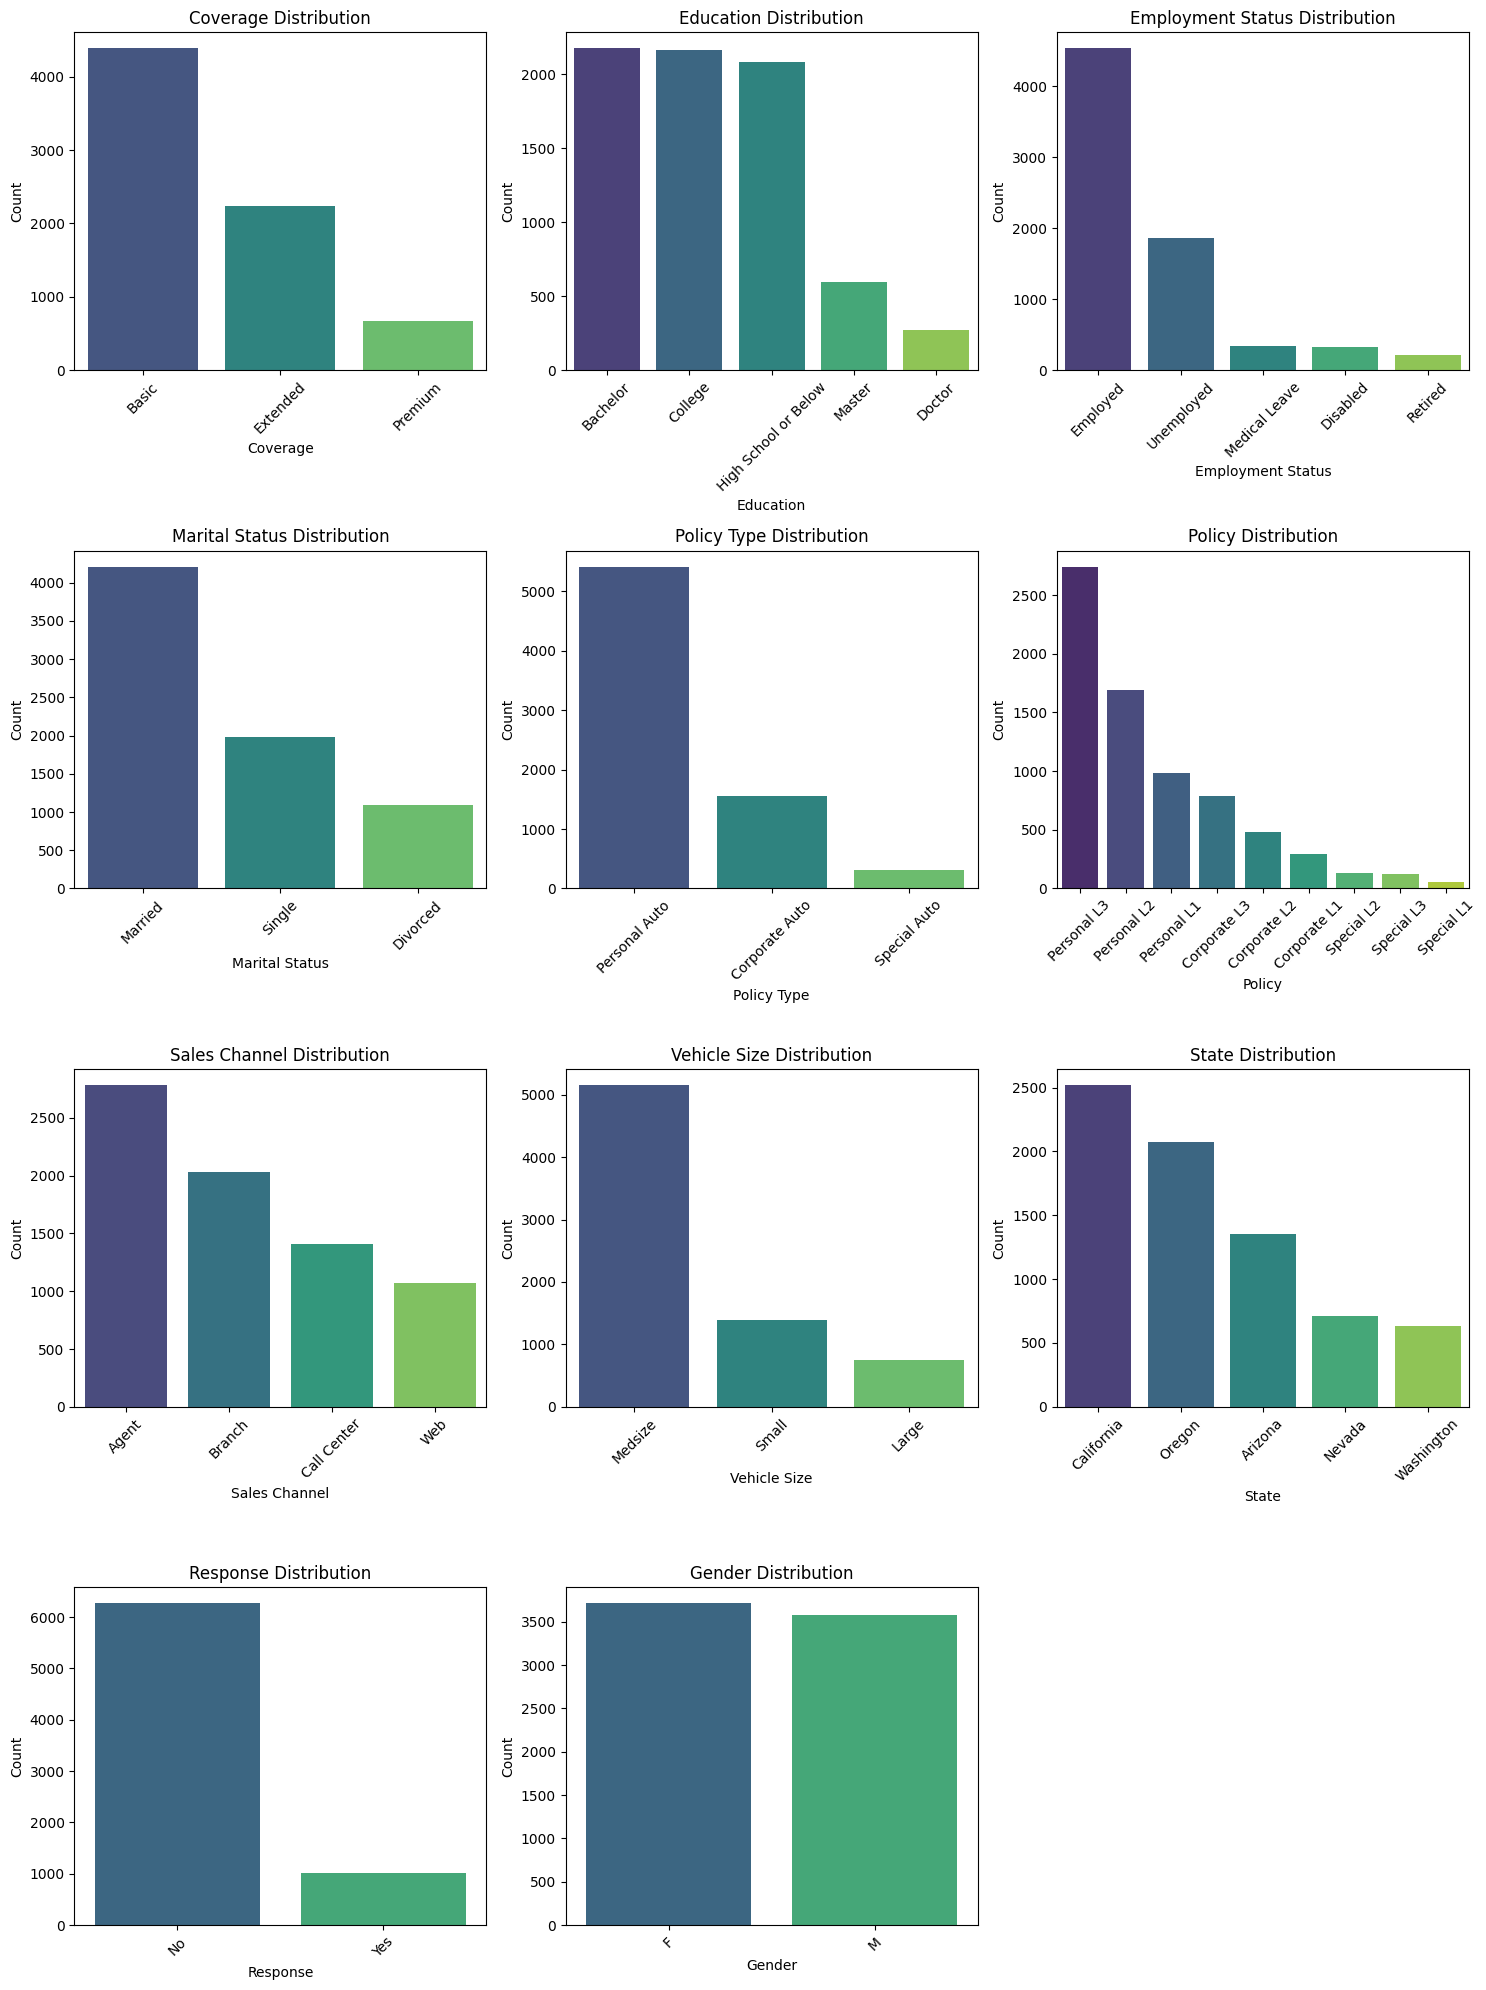

In [15]:
plot_bar_charts(df, [col[1] for col in indexed_cols_pairs] + non_index_cols[2:])

In [16]:
for idx_col in indexed_cols_pairs:
    print(df[idx_col].value_counts())

Coverage Index  Coverage
0               Basic       4387
1               Extended    2232
2               Premium      671
Name: count, dtype: int64
Education Index  Education           
2                Bachelor                2175
1                College                 2163
0                High School or Below    2086
3                Master                   593
4                Doctor                   273
Name: count, dtype: int64
Employment Status Index  Employment Status
1                        Employed             4536
0                        Unemployed           1868
2                        Medical Leave         338
4                        Disabled              329
3                        Retired               219
Name: count, dtype: int64
Marital Status Index  Marital Status
1                     Married           4208
0                     Single            1985
2                     Divorced          1097
Name: count, dtype: int64
Policy Type Index  Policy Type   


In [17]:
policy_distribution = df[['Policy Type', 'Policy', 'Claim over 1k']].groupby(['Policy Type', 'Policy']).agg(over1k = ('Claim over 1k', 'sum'), total=('Claim over 1k', 'count'))
policy_distribution['under1k'] = policy_distribution['total'] - policy_distribution['over1k']
policy_distribution['under1k_prop'] = policy_distribution['under1k'] / policy_distribution['total']
policy_distribution['over1k_prop'] = policy_distribution['over1k'] / policy_distribution['total']
policy_distribution

over1k  total  under1k  under1k_prop  over1k_prop
Policy Type    Policy                                                         
Corporate Auto Corporate L1      33    298      265      0.889262     0.110738
               Corporate L2      53    477      424      0.888889     0.111111
               Corporate L3      89    786      697      0.886768     0.113232
Personal Auto  Personal L1      120    986      866      0.878296     0.121704
               Personal L2      196   1689     1493      0.883955     0.116045
               Personal L3      303   2741     2438      0.889456     0.110544
Special Auto   Special L1        11     58       47      0.810345     0.189655
               Special L2        14    131      117      0.893130     0.106870
               Special L3        13    124      111      0.895161     0.104839

In [18]:
df[non_index_cols]

CustomerID Effective To Date       State Response Gender
0       QC35222          1/1/2024  California       No      F
1       AE98193          1/1/2024  Washington       No      M
2       TM23514          1/1/2024      Oregon       No      M
3       QZ42725          1/1/2024  Washington       No      F
4       SG81493          1/1/2024     Arizona       No      M
...         ...               ...         ...      ...    ...
7285    HC90344          9/2/2024  California       No      F
7286    ZU83252          9/2/2024  California       No      F
7287    PR80703          9/2/2024  California       No      F
7288    NS23754          9/2/2024  California       No      F
7289    QO56615          9/2/2024  California       No      F

[7290 rows x 5 columns]

In [19]:
df['State'].value_counts()

State
California    2520
Oregon        2077
Arizona       1353
Nevada         708
Washington     632
Name: count, dtype: int64

In [20]:
df['Response'].value_counts()

Response
No     6265
Yes    1025
Name: count, dtype: int64

In [21]:
df['Gender'].value_counts()

Gender
F    3711
M    3579
Name: count, dtype: int64

## Numeric

In [22]:
print(actual_numeric_cols)
print('Actual numeric', len(actual_numeric_cols))

['Customer Lifetime Value', 'Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type']
Actual numeric 7


In [23]:
def plot_eachfeature(graph_type, df):
    fig, axes = plt.subplots(nrows=2, ncols=int(len(actual_numeric_cols)/2) + 1, figsize=(20,16))

    axes = axes.flatten()

    for i in range(len(actual_numeric_cols)):
        graph_type(df[actual_numeric_cols[i]], ax=axes[i])
        axes[i].set_xlabel(actual_numeric_cols[i])

    fig.tight_layout()
    plt.show()

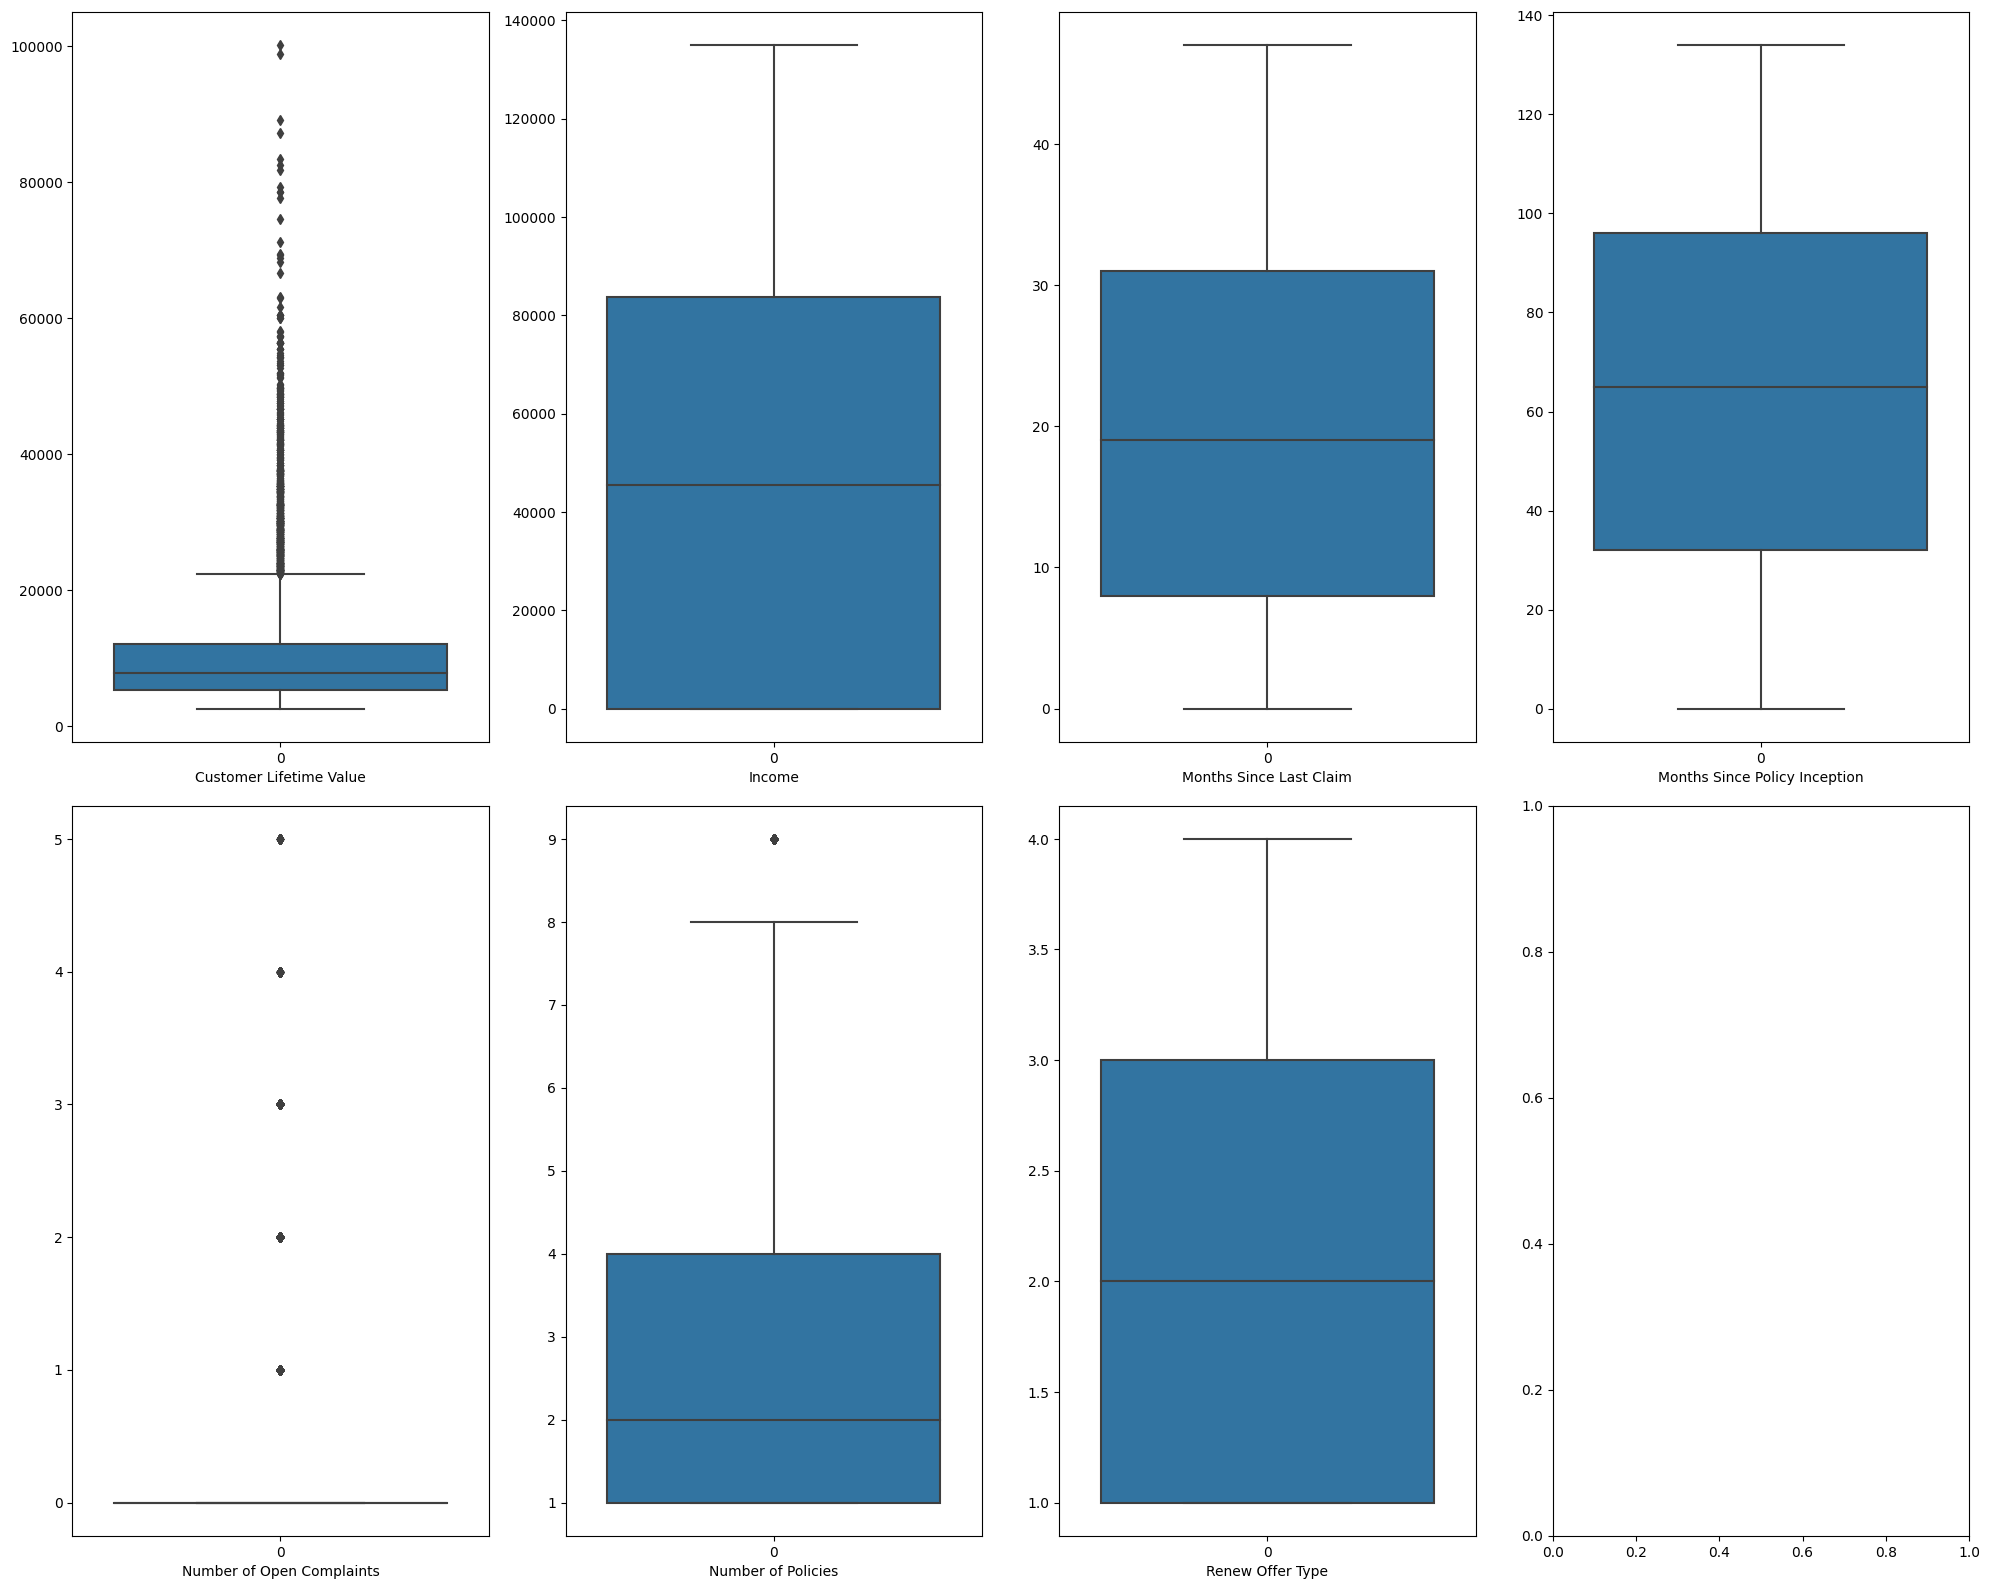

In [24]:
plot_eachfeature(sns.boxplot, df)

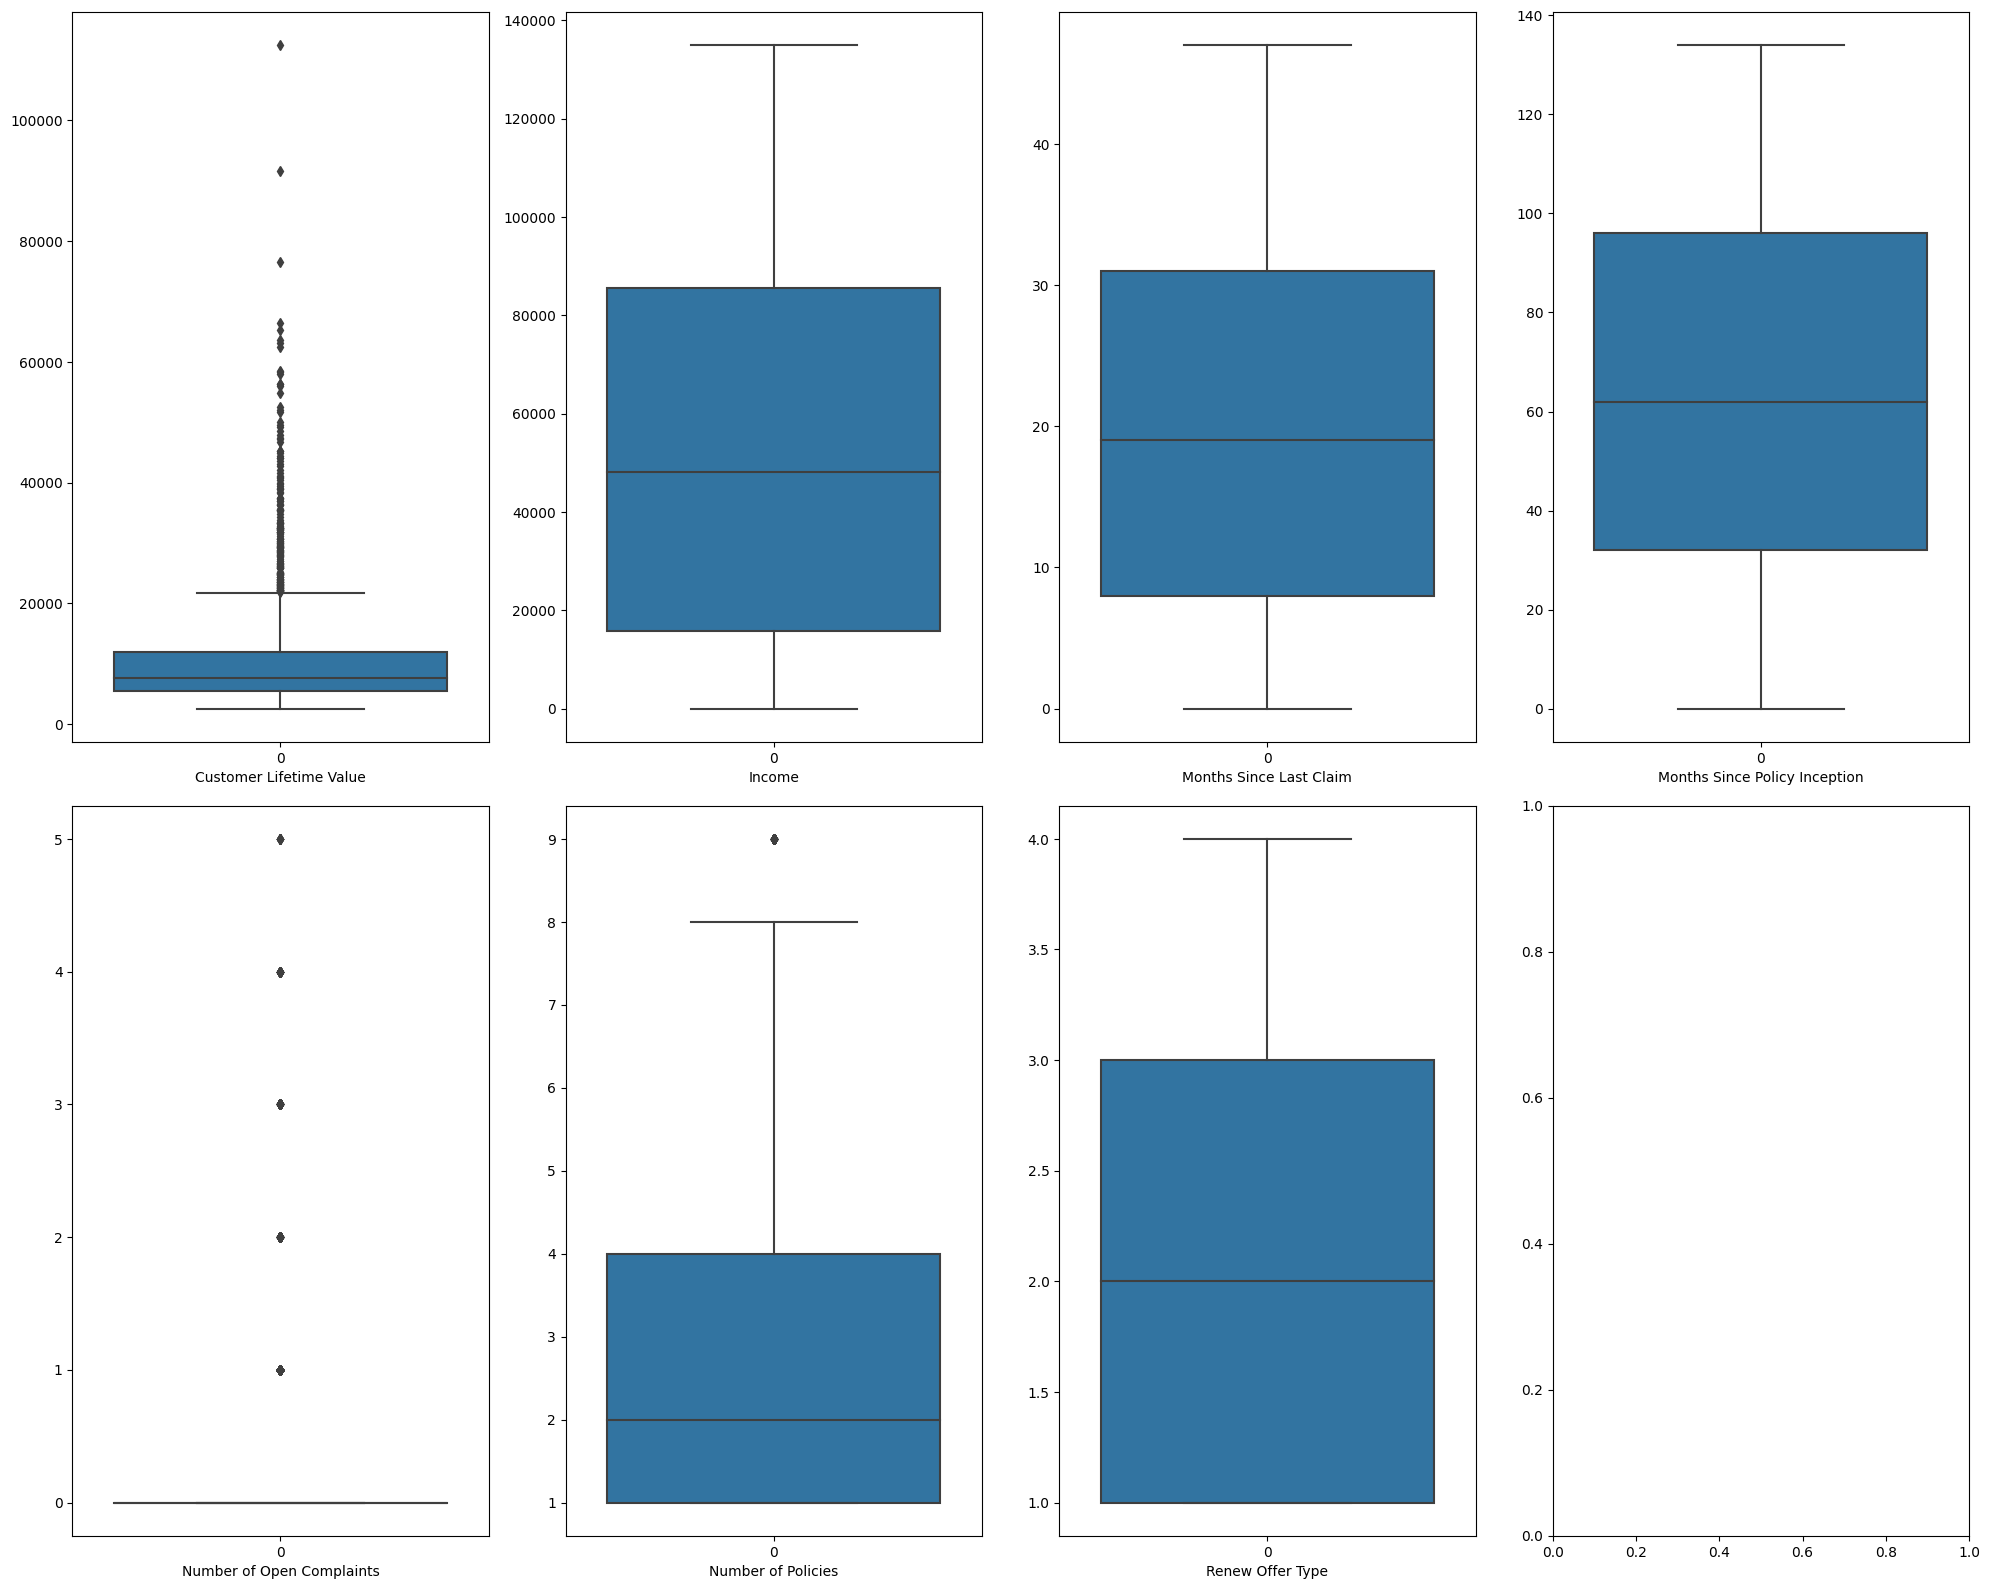

In [25]:
plot_eachfeature(sns.boxplot, df_test)

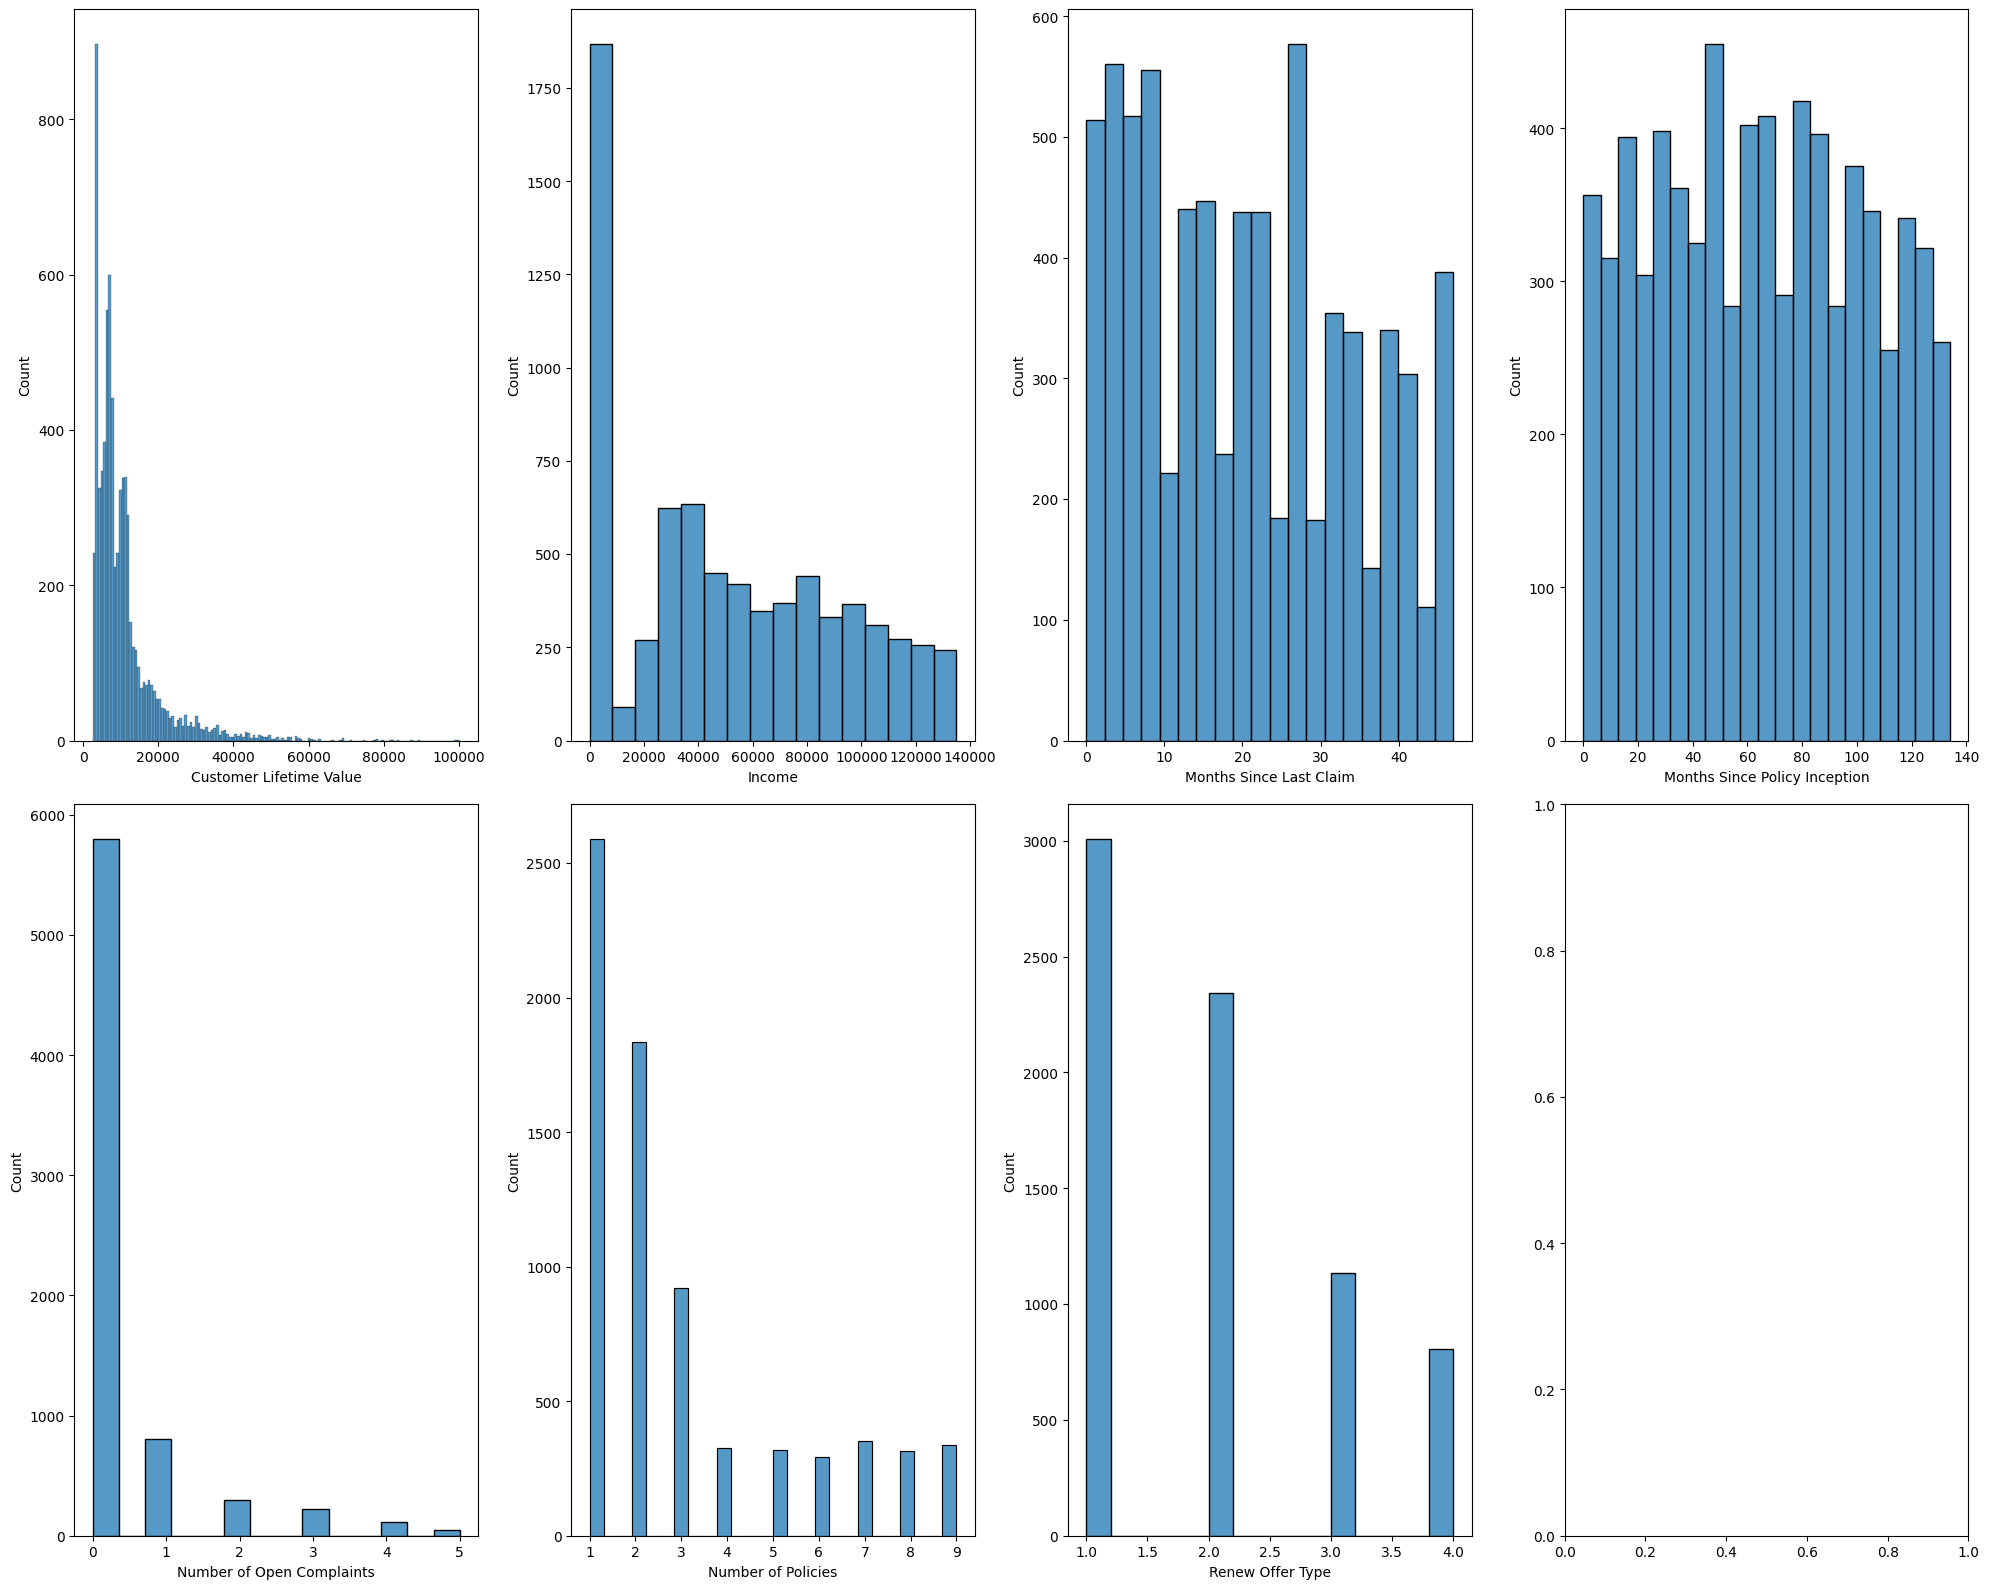

In [26]:
warnings.filterwarnings("ignore")
plot_eachfeature(sns.histplot, df)

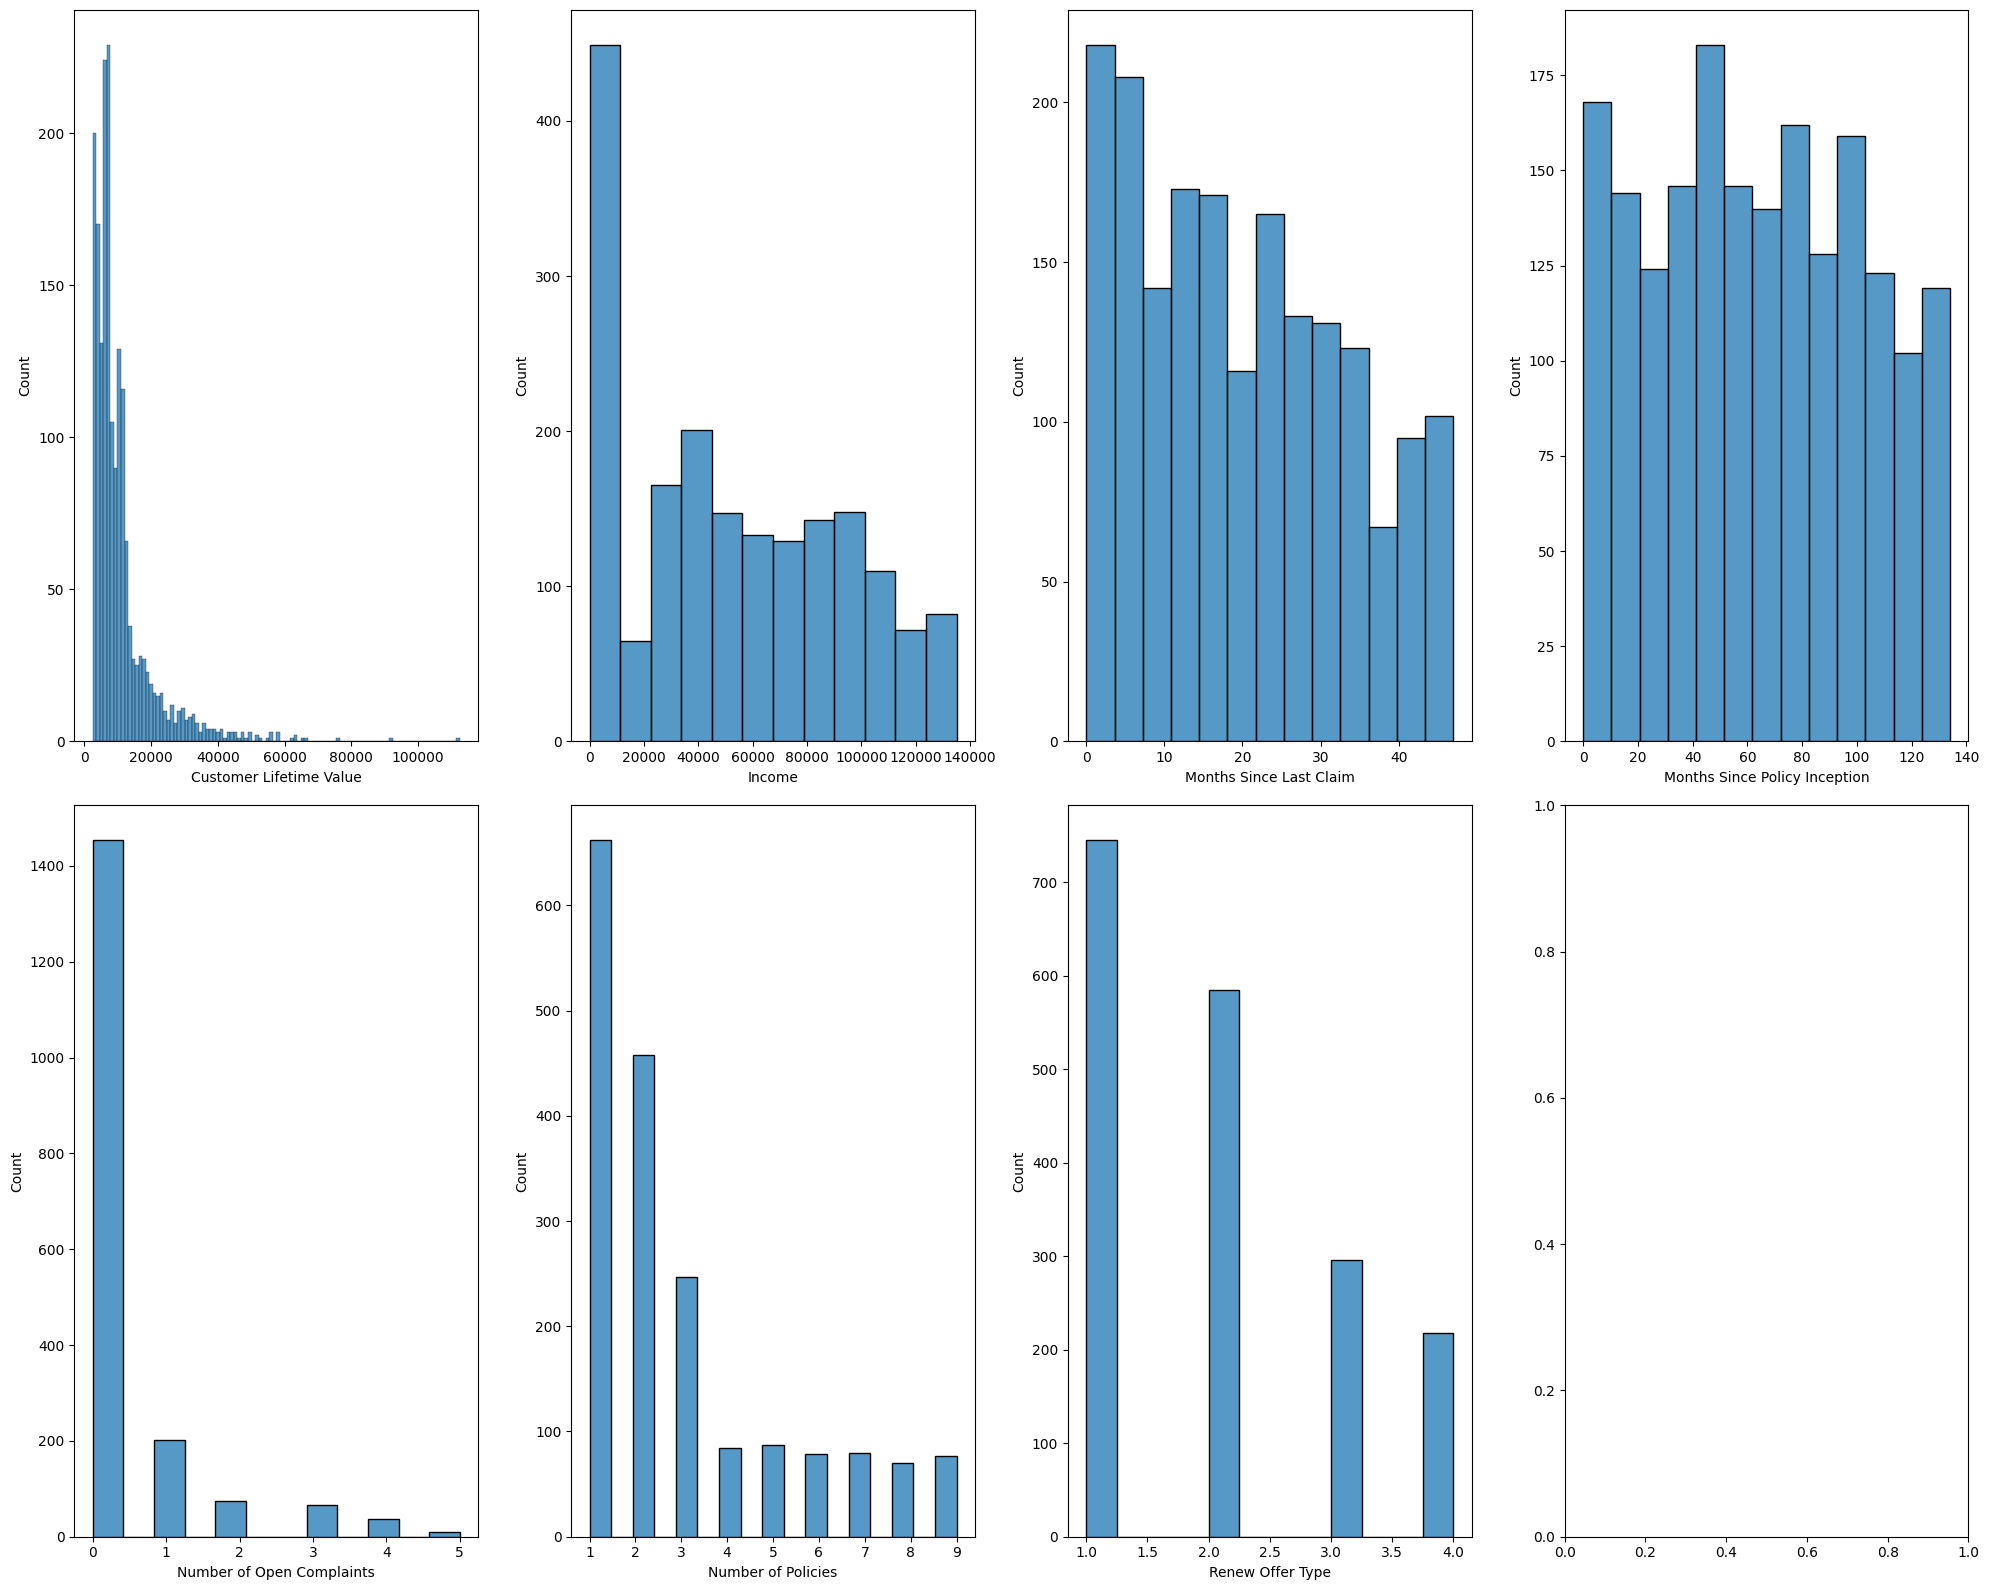

In [27]:
warnings.filterwarnings("ignore")
plot_eachfeature(sns.histplot, df_test)

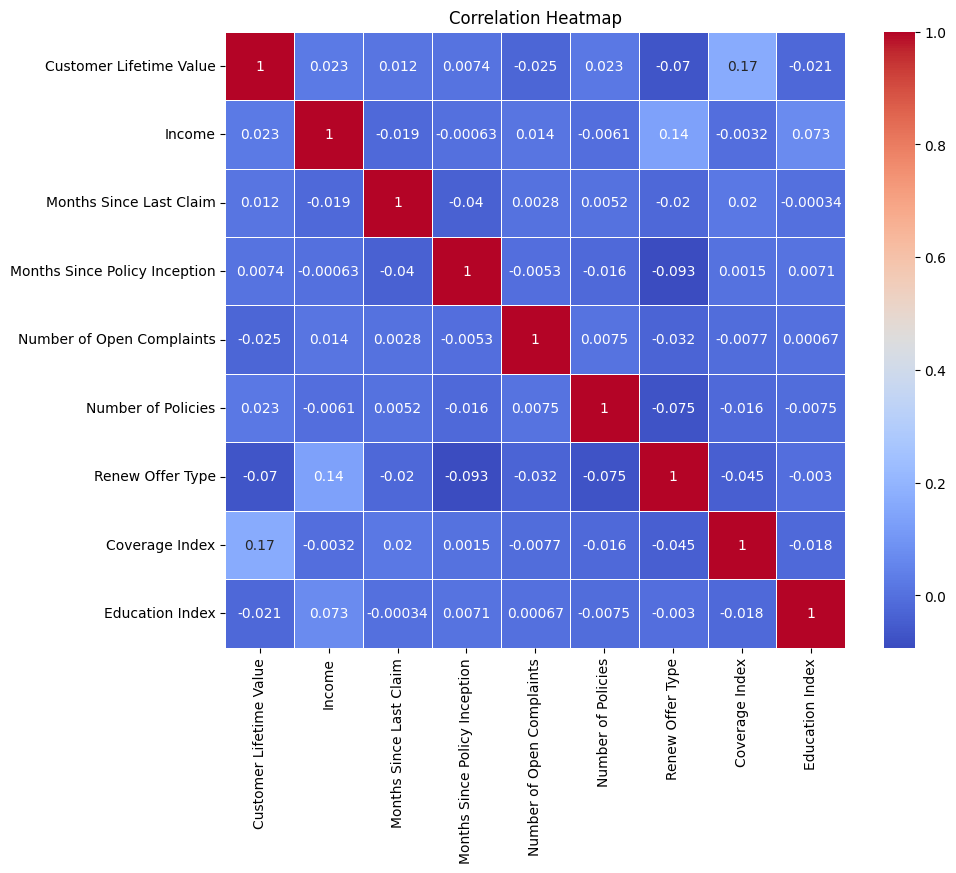

In [28]:
corr_matrix = df[actual_numeric_cols + ['Coverage Index', 'Education Index']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df['Number of Policies']

0       1
1       7
2       3
3       1
4       1
       ..
7285    2
7286    2
7287    9
7288    1
7289    1
Name: Number of Policies, Length: 7290, dtype: int64

## Each policy level

In [30]:
policy = ['Corporate', 'Personal', 'Special']
l1 = [policy_type + ' L1' for policy_type in policy]
l2 = [policy_type + ' L3' for policy_type in policy]
l3 = [policy_type + ' L3' for policy_type in policy]
df_l1 = df[df['Policy'].isin(l1)]
df_l2 = df[df['Policy'].isin(l2)]
df_l3 = df[df['Policy'].isin(l3)]

In [31]:
def plot_policy_levels(input_feature):
    edu_l1 = df_l1[input_feature].value_counts()
    edu_l2 = df_l2[input_feature].value_counts()
    edu_l3 = df_l3[input_feature].value_counts()

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(edu_l1.index, edu_l1.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for L1 Policies')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].bar(edu_l2.index, edu_l2.values, color='green')
    ax[1].set_title(input_feature + ' Distribution for L2 Policies')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    ax[2].bar(edu_l3.index, edu_l3.values, color='red')
    ax[2].set_title(input_feature + ' Distribution for L3 Policies')
    ax[2].set_xlabel(input_feature)
    ax[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

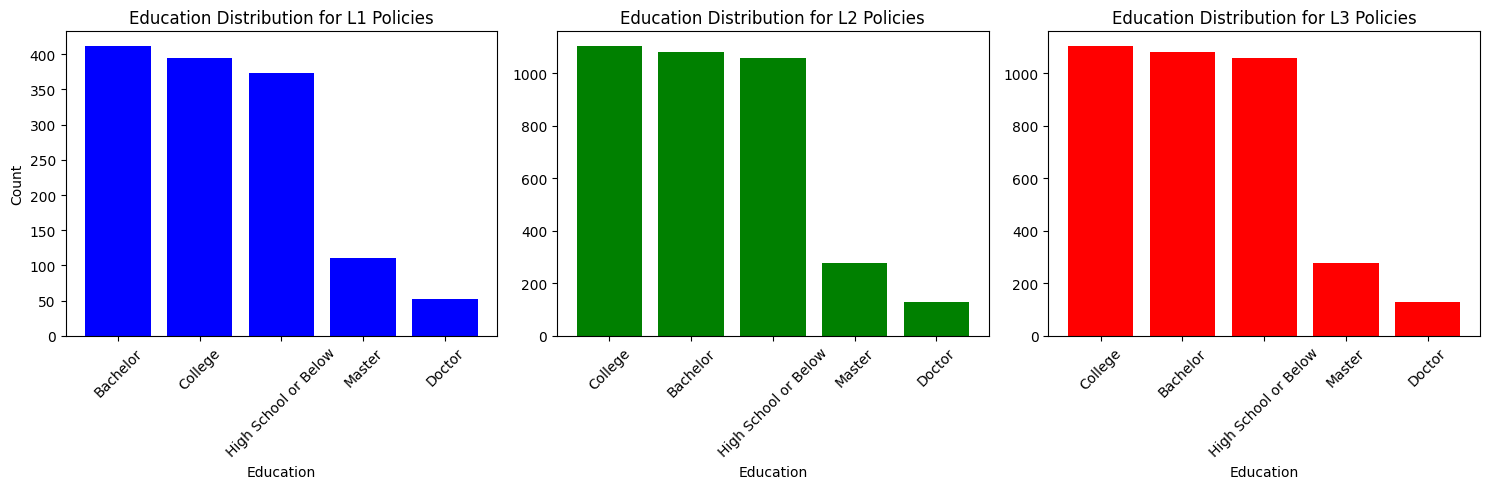

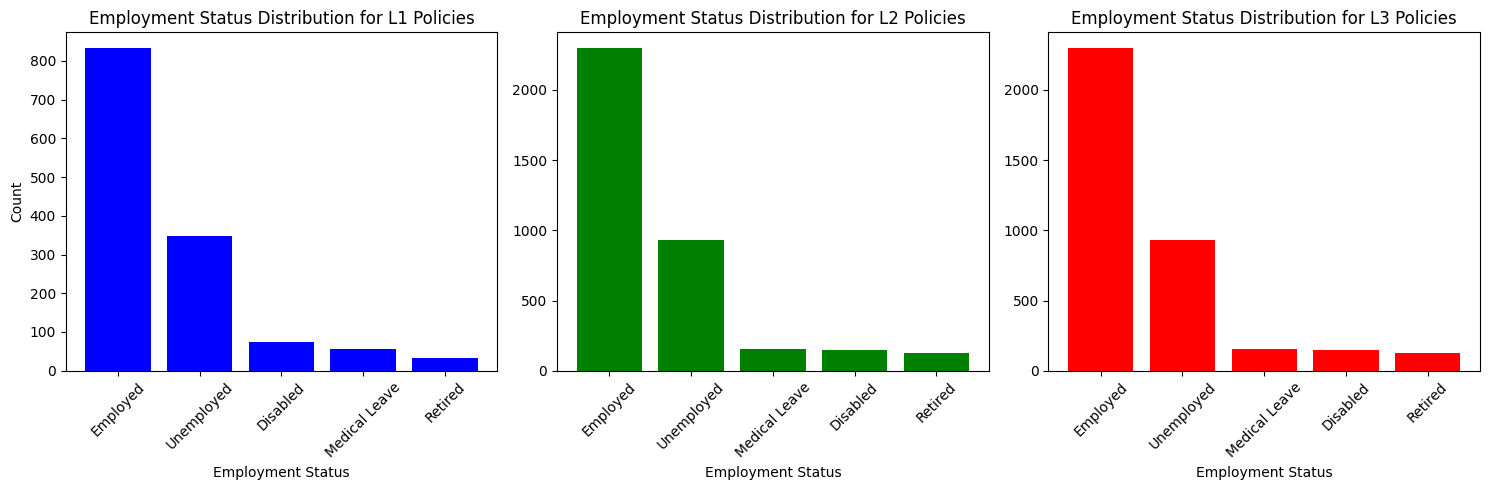

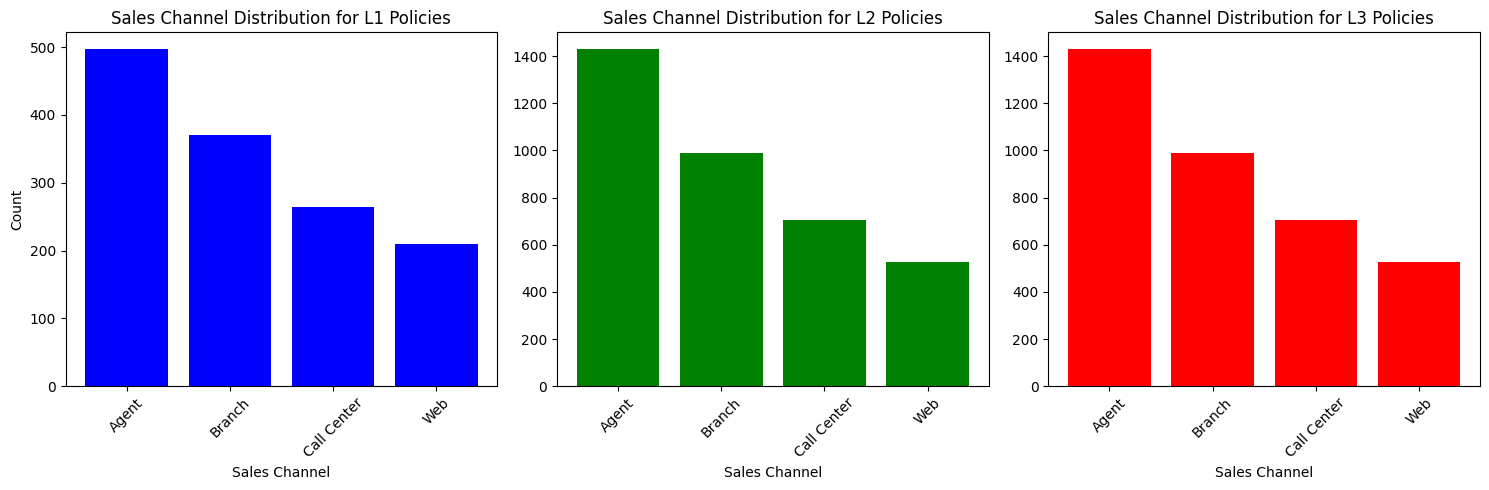

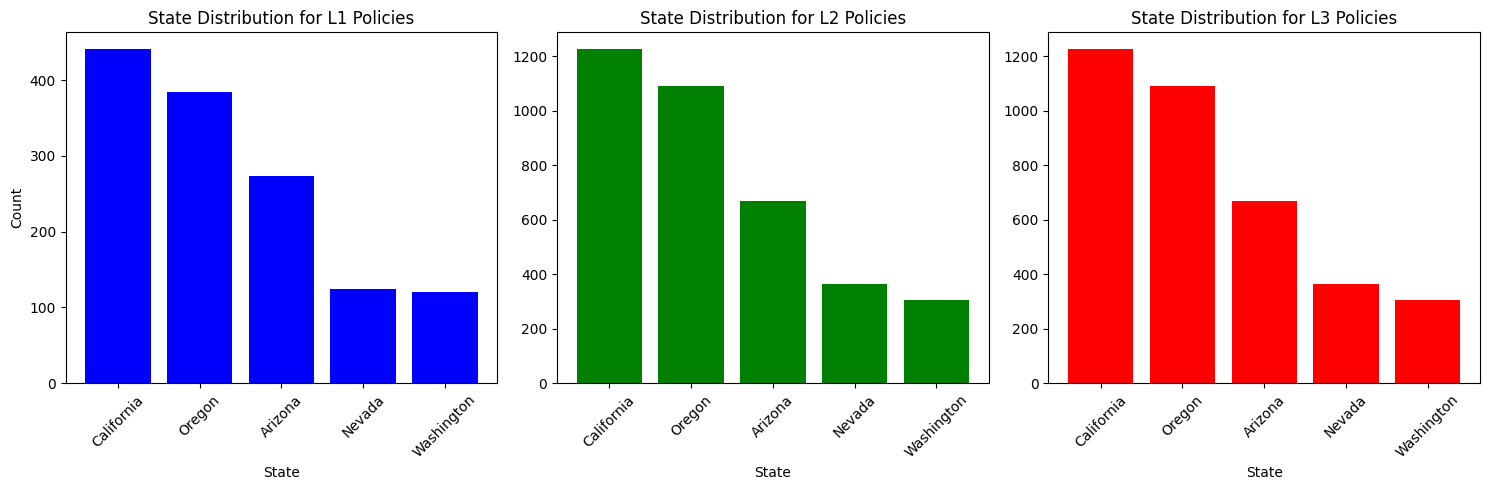

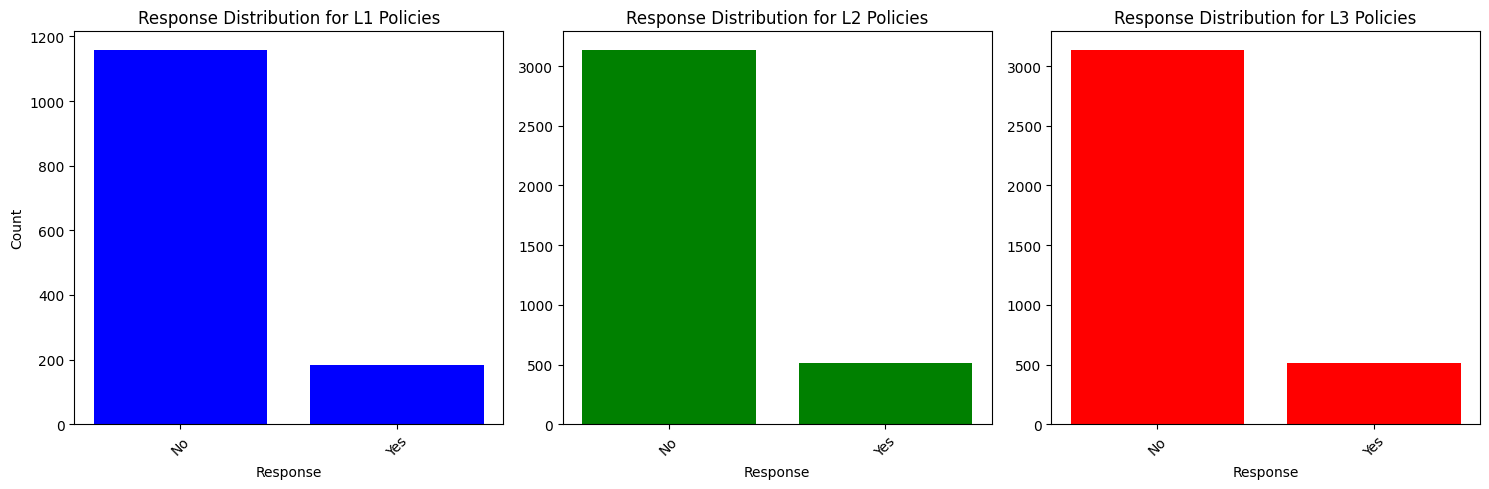

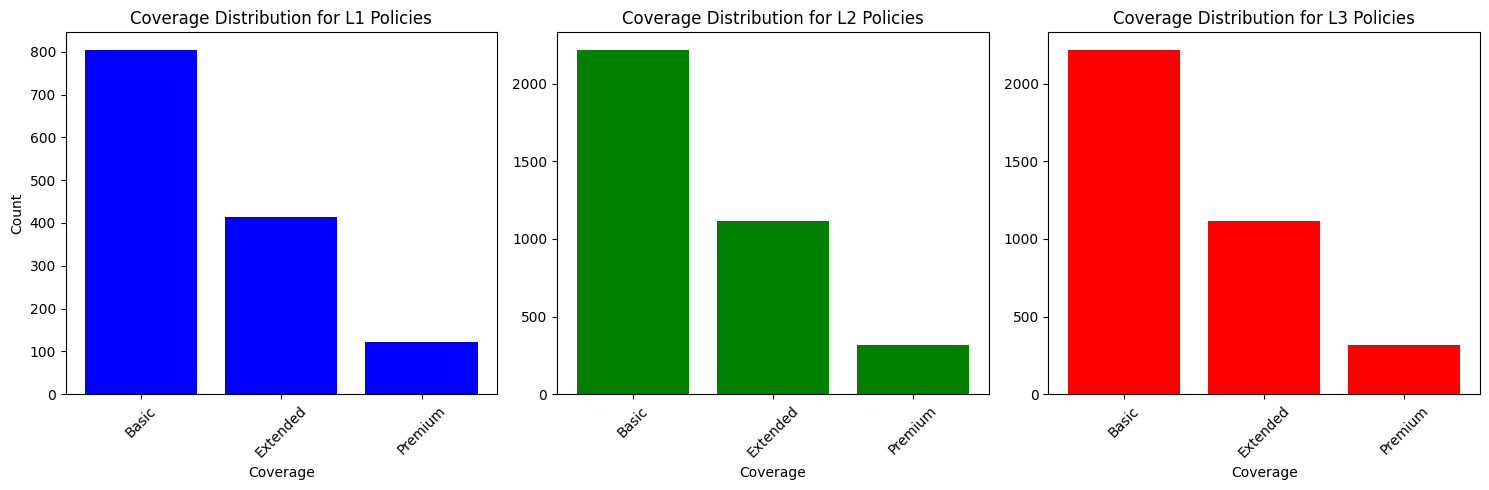

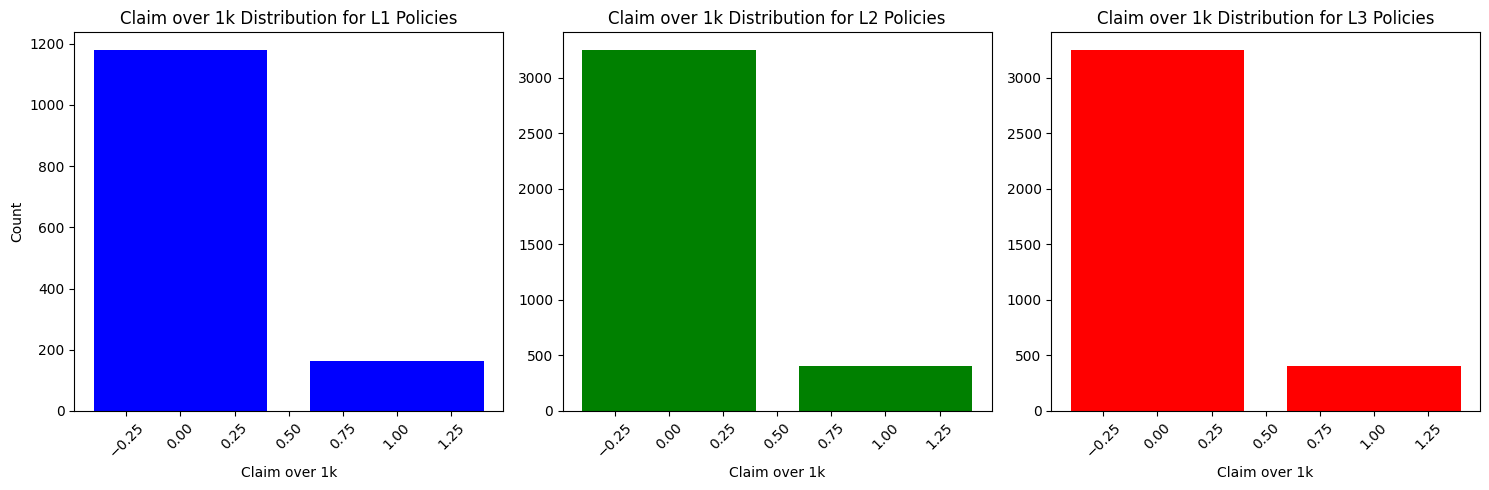

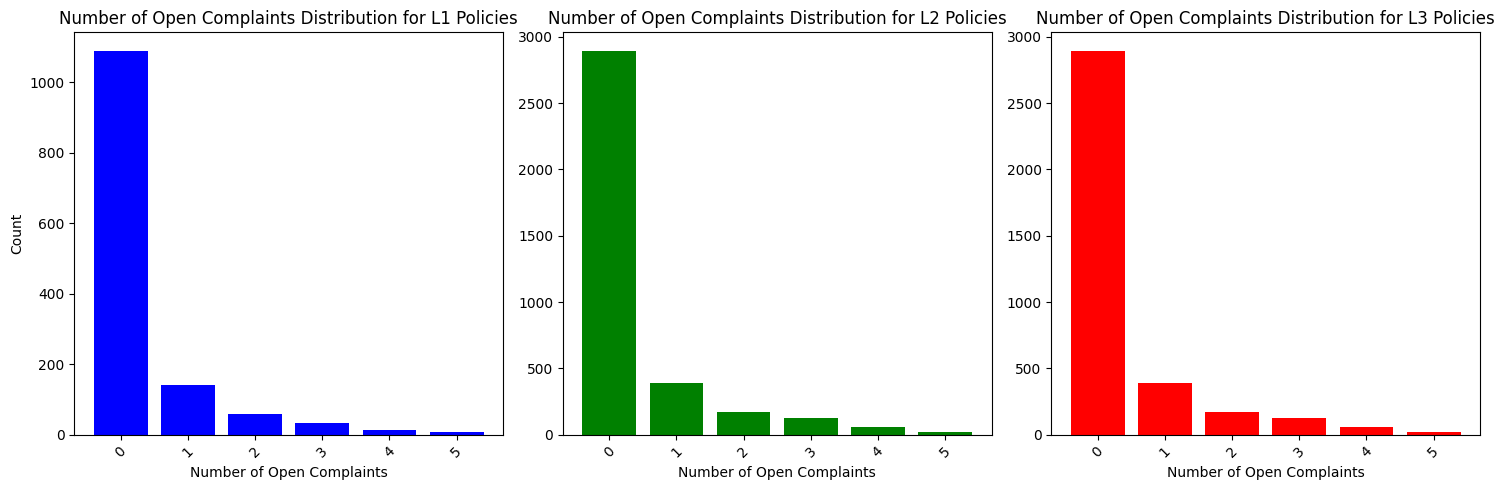

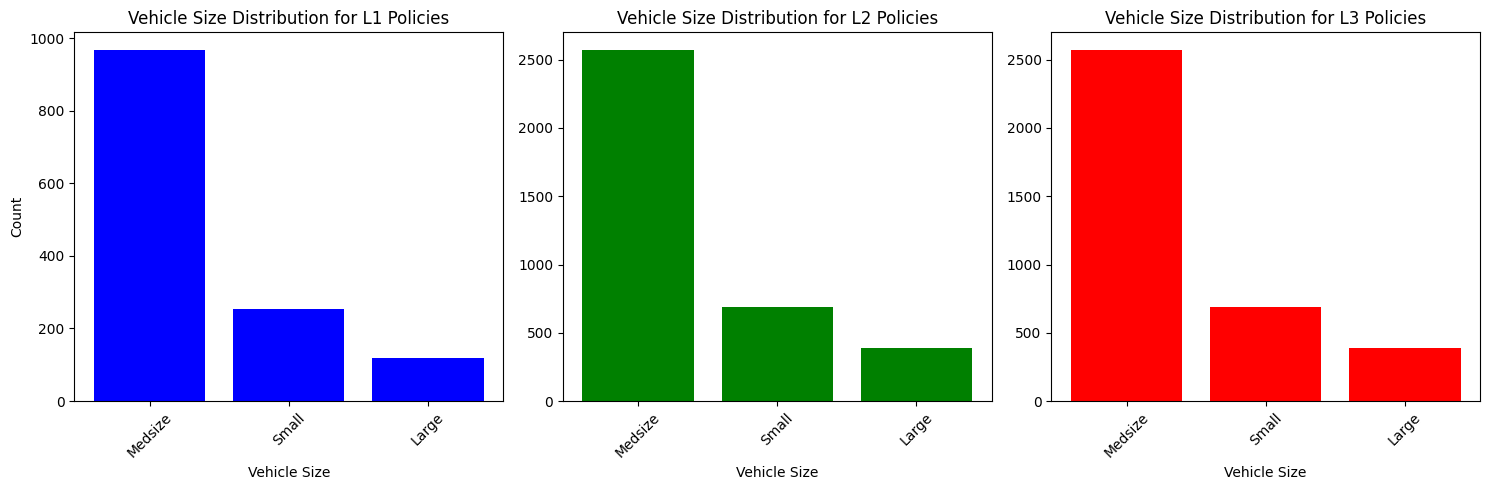

In [32]:
plot_policy_levels('Education')
plot_policy_levels('Employment Status')
plot_policy_levels('Sales Channel')
plot_policy_levels('State')
plot_policy_levels('Response')
plot_policy_levels('Coverage')
plot_policy_levels('Claim over 1k')
plot_policy_levels('Number of Open Complaints')
plot_policy_levels('Vehicle Size')

In [33]:
def plot_policy_levels(input_feature):

    values_l1 = df_l1[input_feature].dropna()
    values_l2 = df_l2[input_feature].dropna()
    values_l3 = df_l3[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(5, 5))

    data = [values_l1, values_l2, values_l3]

    ax.boxplot(data, patch_artist=True, labels=['L1 Policies', 'L2 Policies', 'L3 Policies'])

    ax.set_title(input_feature + ' Box Plot Distribution')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()


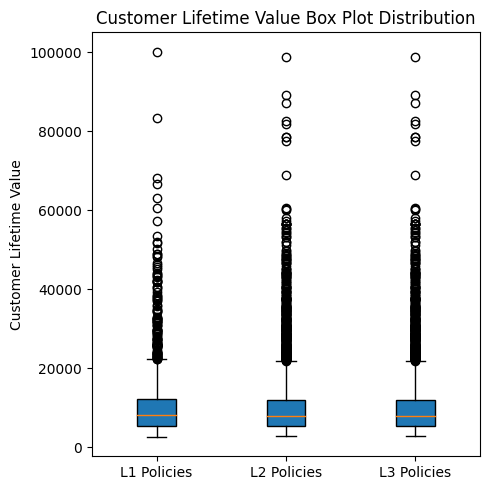

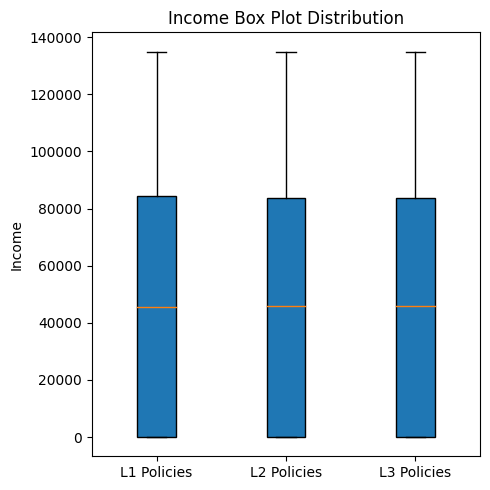

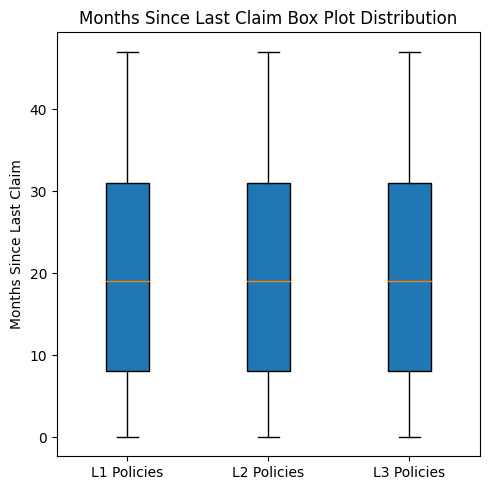

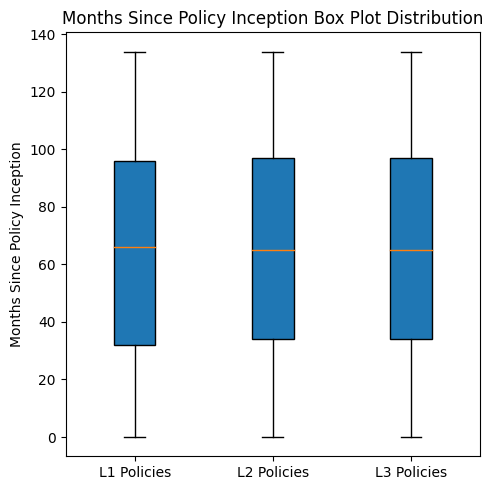

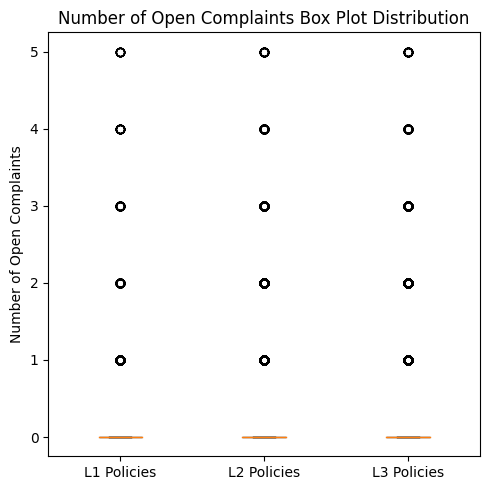

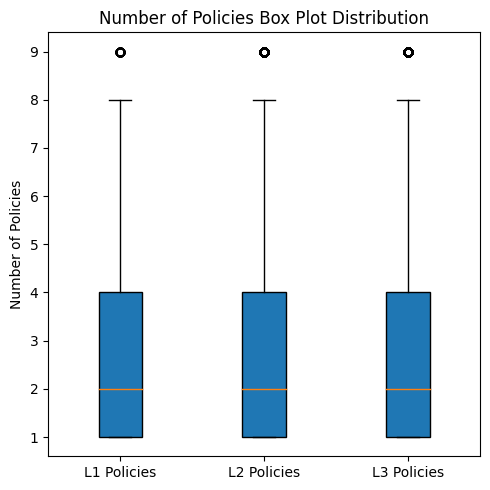

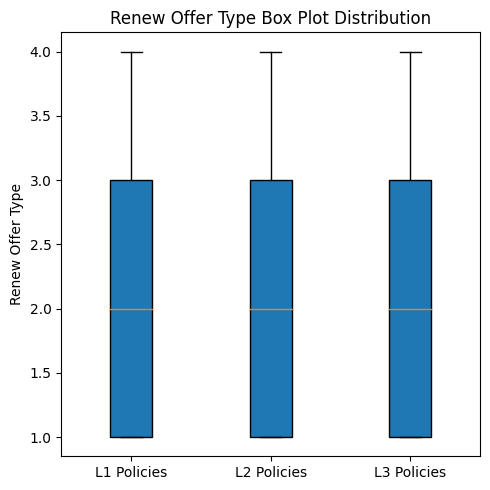

In [34]:
for feature in actual_numeric_cols:
    plot_policy_levels(feature)

In [35]:
print(df_l1['Claim over 1k'].value_counts() / df_l1['Claim over 1k'].shape[0])
print(df_l2['Claim over 1k'].value_counts() / df_l2['Claim over 1k'].shape[0])
print(df_l3['Claim over 1k'].value_counts() / df_l3['Claim over 1k'].shape[0])

Claim over 1k
0    0.877794
1    0.122206
Name: count, dtype: float64
Claim over 1k
0    0.889071
1    0.110929
Name: count, dtype: float64
Claim over 1k
0    0.889071
1    0.110929
Name: count, dtype: float64


There is no difference :)

## Each Coverage

In [36]:
df_basic = df[df['Coverage']=='Basic']
df_extended = df[df['Coverage']=='Extended']
df_premium = df[df['Coverage']=='Premium']

df_basic.shape, df_extended.shape, df_premium.shape

((4387, 29), (2232, 29), (671, 29))

In [37]:
def plot_coverage(input_feature):
    edu_l1 = df_basic[input_feature].value_counts()
    edu_l2 = df_extended[input_feature].value_counts()
    edu_l3 = df_premium[input_feature].value_counts()

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(edu_l1.index, edu_l1.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for Basic')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].bar(edu_l2.index, edu_l2.values, color='green')
    ax[1].set_title(input_feature + ' Distribution for Extended')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    ax[2].bar(edu_l3.index, edu_l3.values, color='red')
    ax[2].set_title(input_feature + ' Distribution for Premium')
    ax[2].set_xlabel(input_feature)
    ax[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_coverage_cont(input_feature):

    values_l1 = df_basic[input_feature].dropna()
    values_l2 = df_extended[input_feature].dropna()
    values_l3 = df_premium[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(5, 5))

    data = [values_l1, values_l2, values_l3]

    ax.boxplot(data, patch_artist=True, labels=['Basic', 'Extended', 'Premium'])

    ax.set_title(input_feature + ' Box Plot Distribution')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()

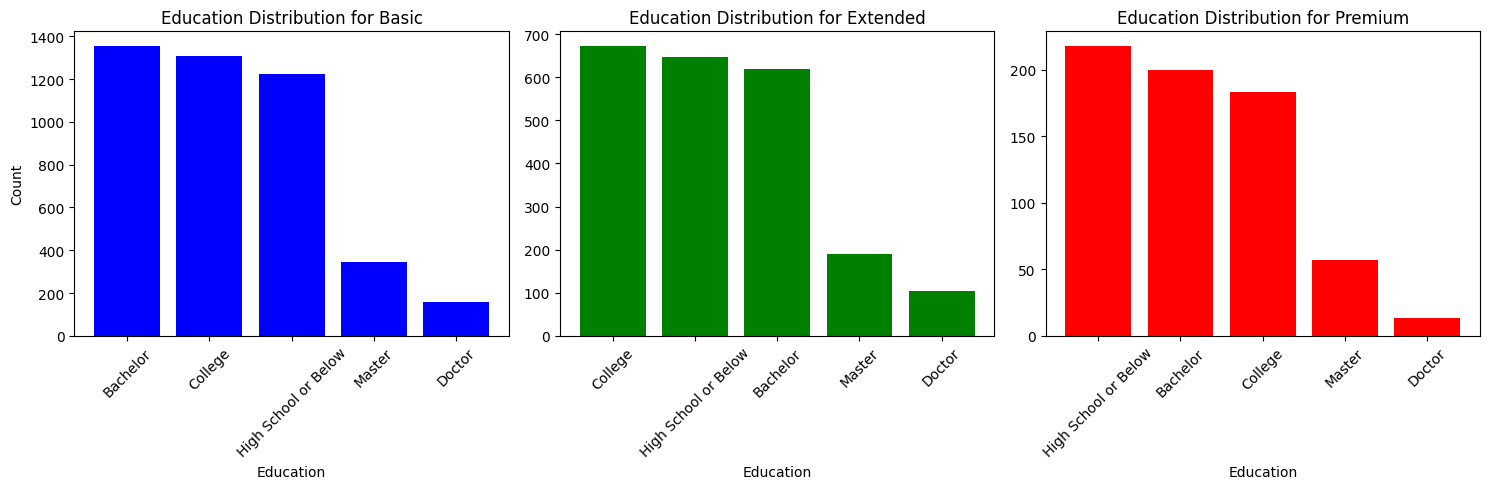

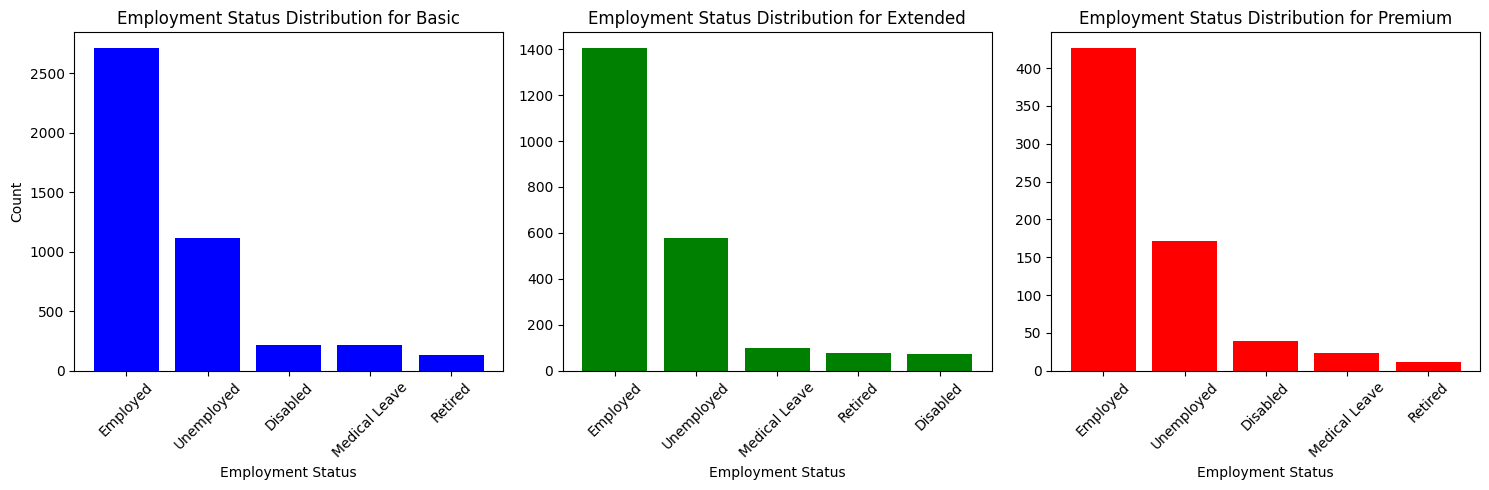

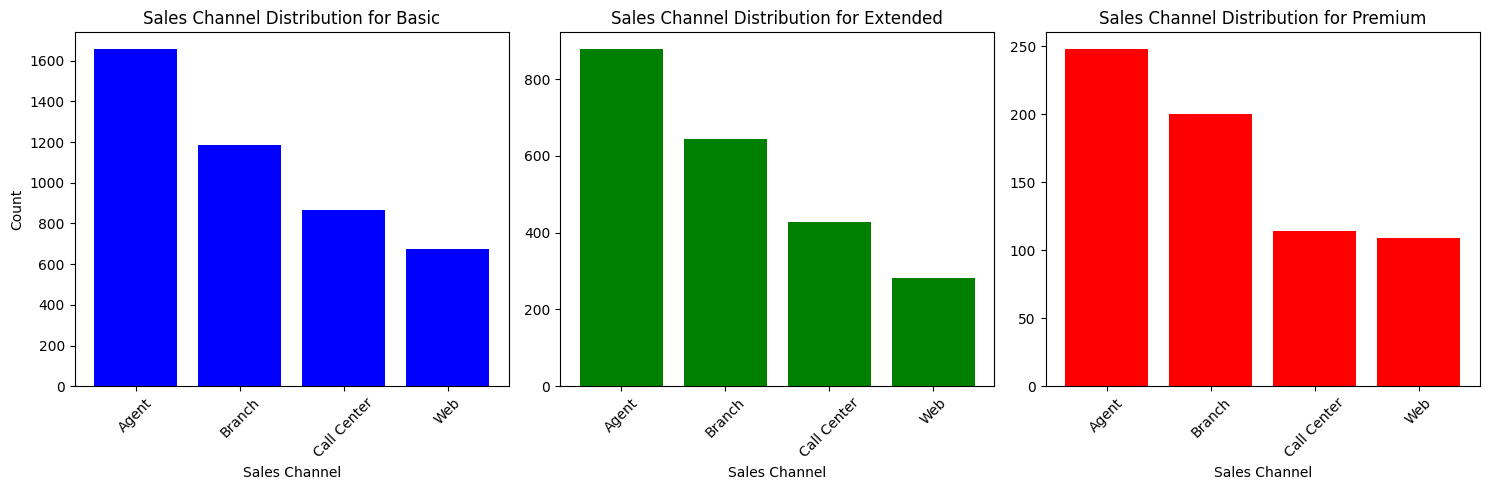

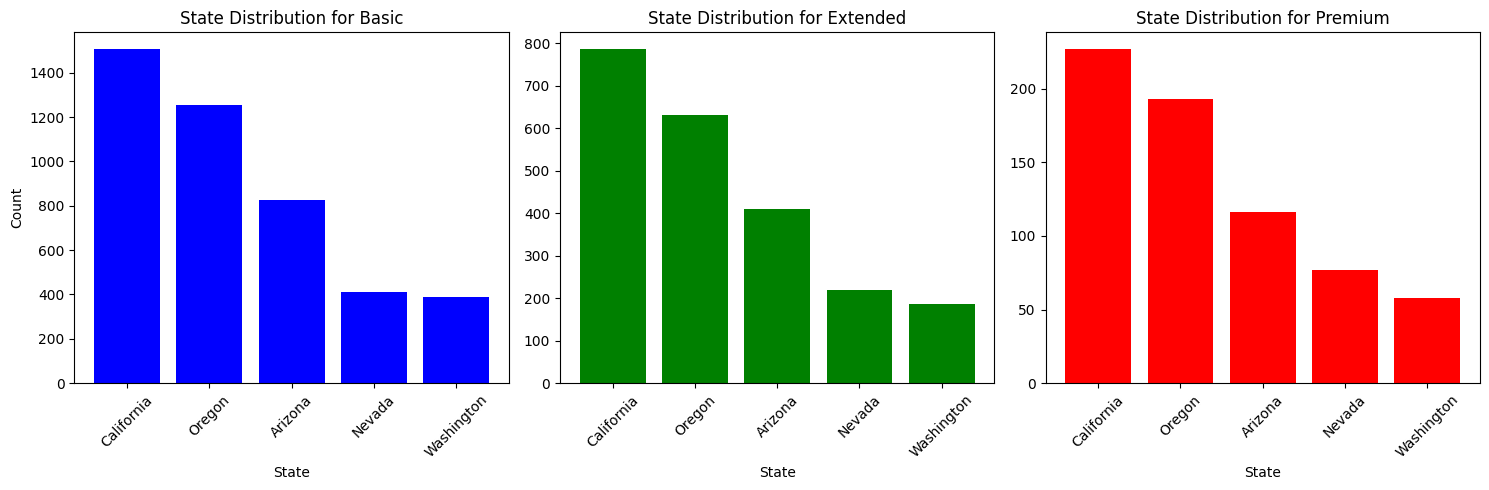

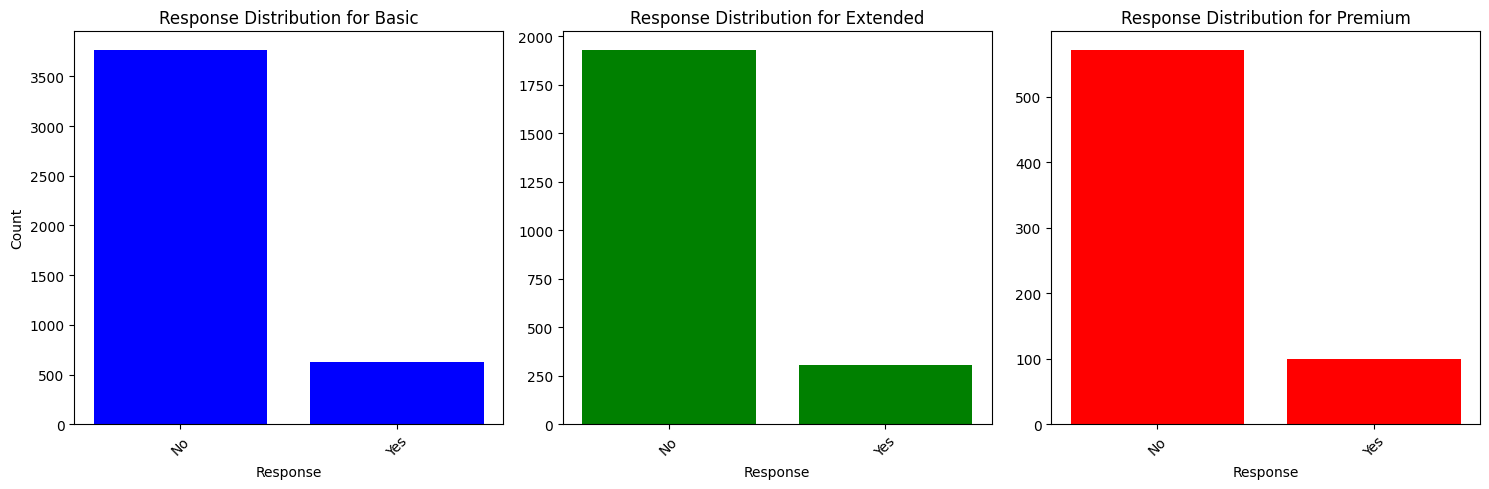

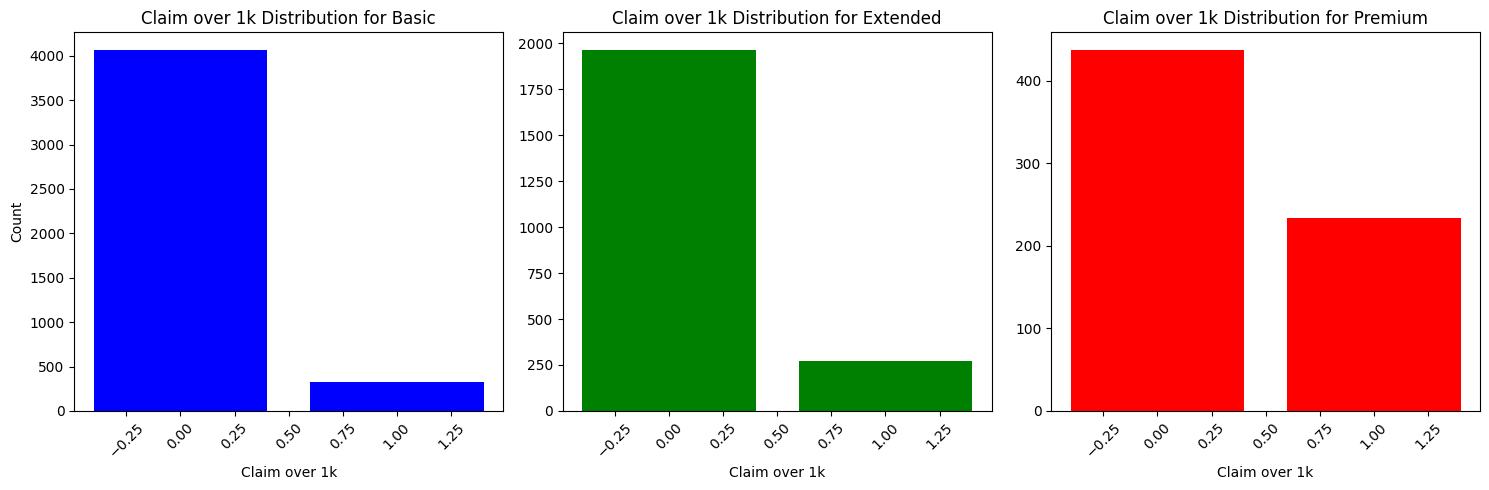

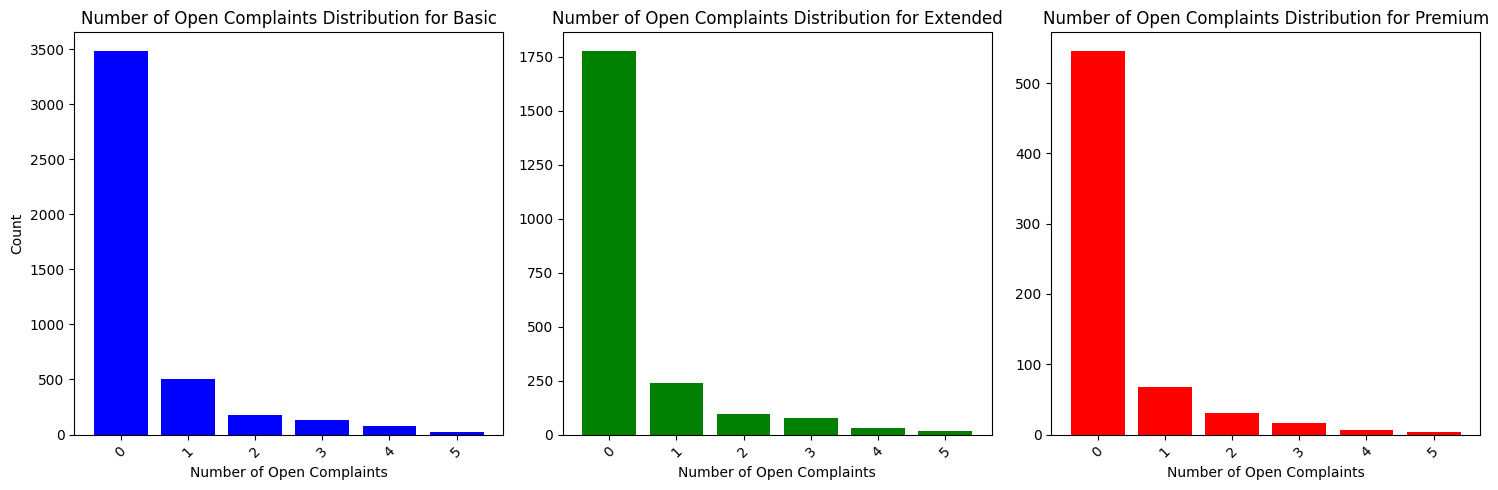

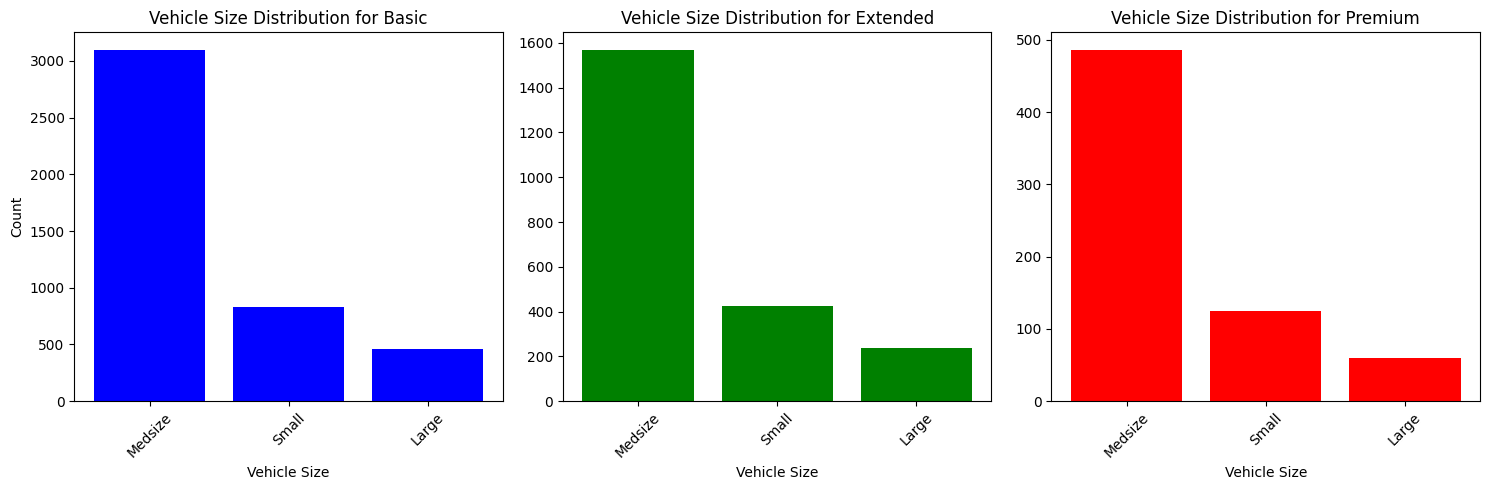

In [38]:
plot_coverage('Education')
plot_coverage('Employment Status')
plot_coverage('Sales Channel')
plot_coverage('State')
plot_coverage('Response')
plot_coverage('Claim over 1k')
plot_coverage('Number of Open Complaints')
plot_coverage('Vehicle Size')

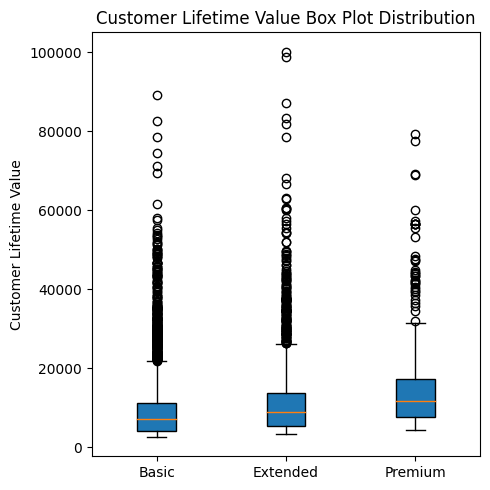

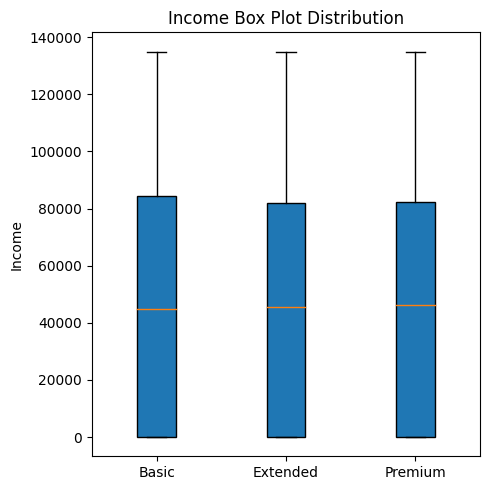

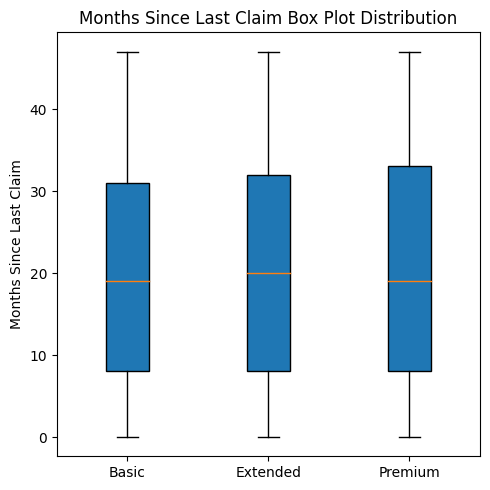

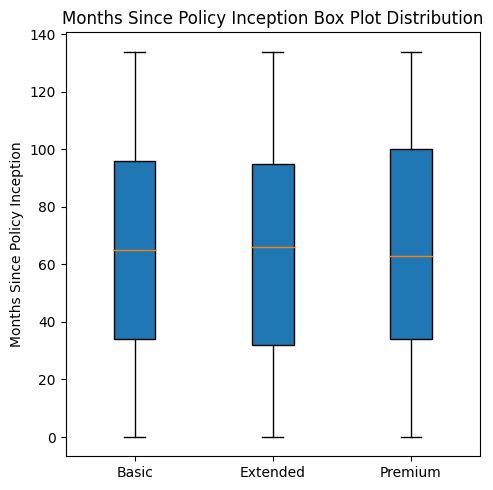

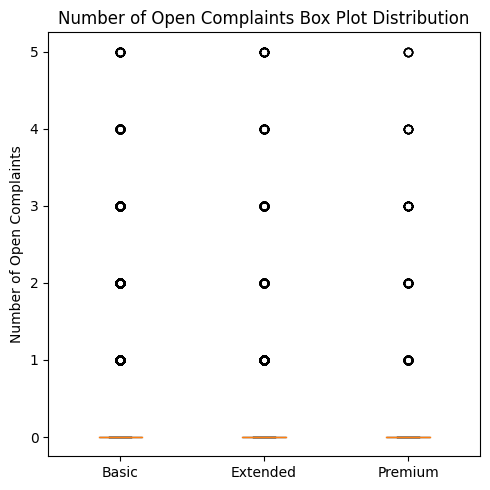

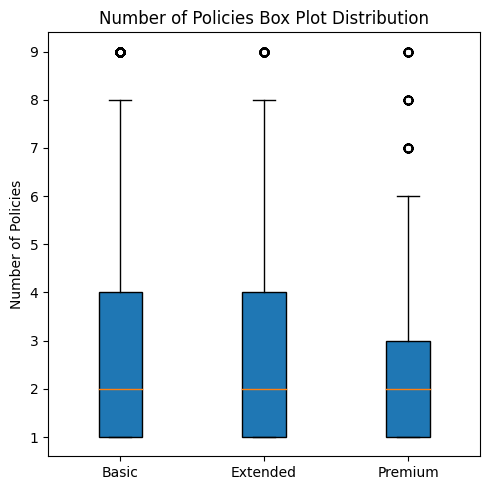

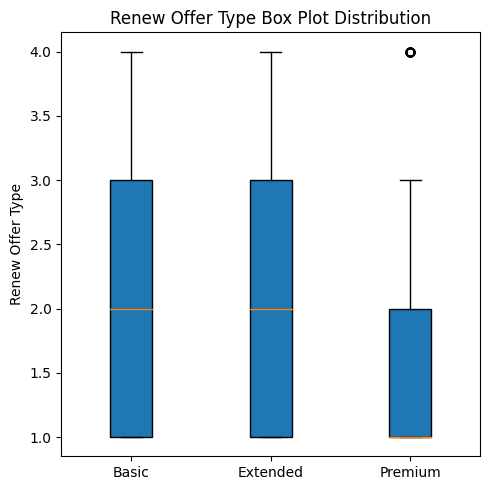

In [39]:
for feature in actual_numeric_cols:
    plot_coverage_cont(feature)

In [40]:
df_premium['Claim over 1k'].value_counts(), df_basic['Claim over 1k'].value_counts(), df_extended['Claim over 1k'].value_counts()

(Claim over 1k
 0    437
 1    234
 Name: count, dtype: int64,
 Claim over 1k
 0    4060
 1     327
 Name: count, dtype: int64,
 Claim over 1k
 0    1961
 1     271
 Name: count, dtype: int64)

## Each policy type

In [41]:
df_personal = df[df['Policy Type']=='Personal Auto']
df_corporate = df[df['Policy Type']=='Corporate Auto']
df_special = df[df['Policy Type']=='Special Auto']

In [42]:
df_personal.shape, df_corporate.shape, df_special.shape

((5416, 29), (1561, 29), (313, 29))

In [43]:
def plot_policy_levels(input_feature):
    edu_l1 = df_personal[input_feature].value_counts()
    edu_l2 = df_corporate[input_feature].value_counts()
    edu_l3 = df_special[input_feature].value_counts()

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(edu_l1.index, edu_l1.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for Personal Policies')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].bar(edu_l2.index, edu_l2.values, color='green')
    ax[1].set_title(input_feature + ' Distribution for Corporate Policies')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    ax[2].bar(edu_l3.index, edu_l3.values, color='red')
    ax[2].set_title(input_feature + ' Distribution for Special Policies')
    ax[2].set_xlabel(input_feature)
    ax[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

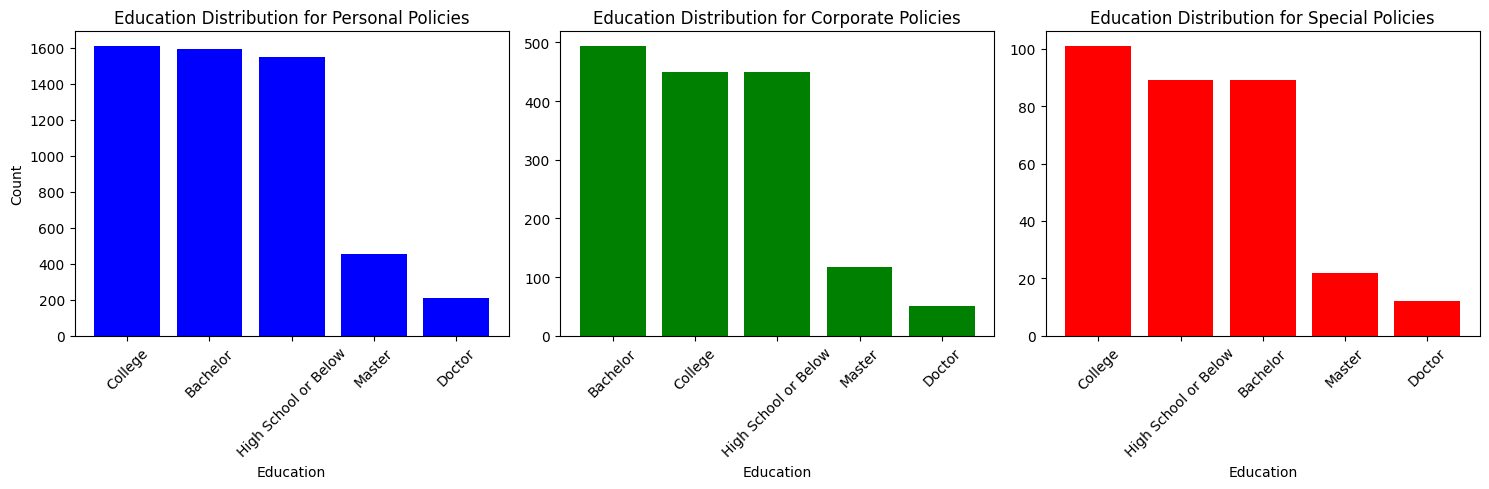

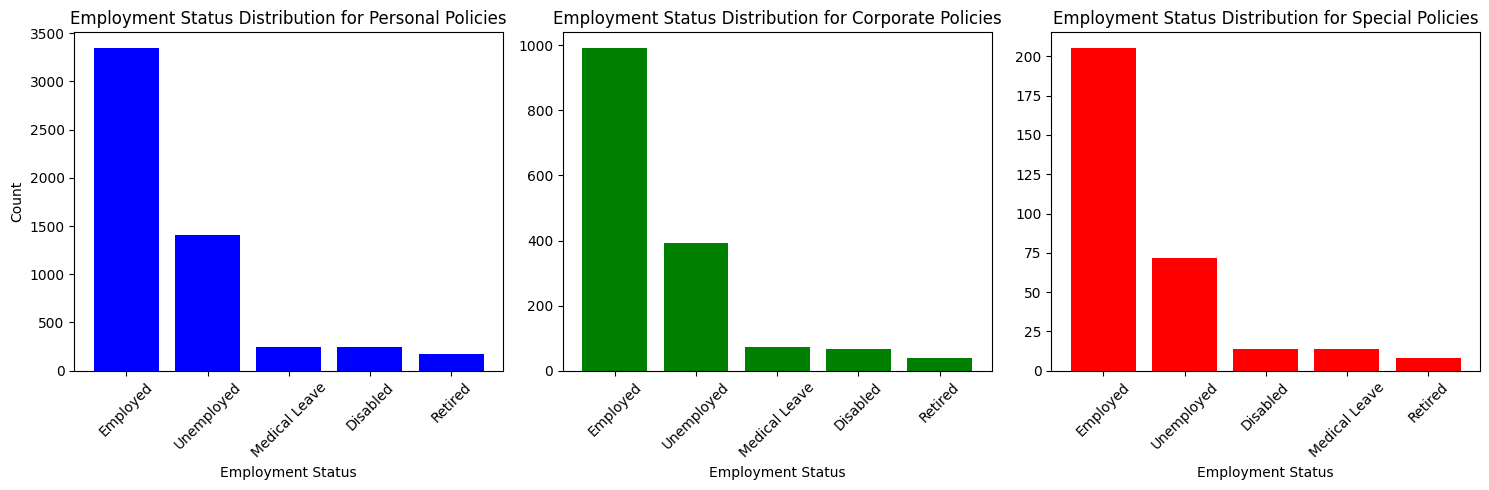

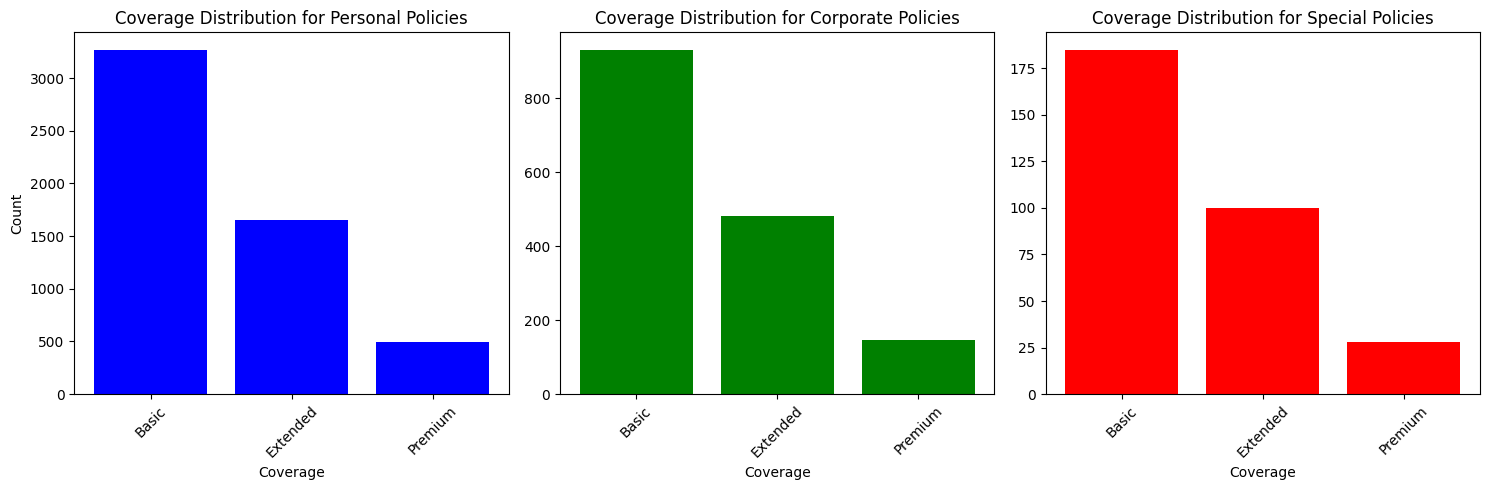

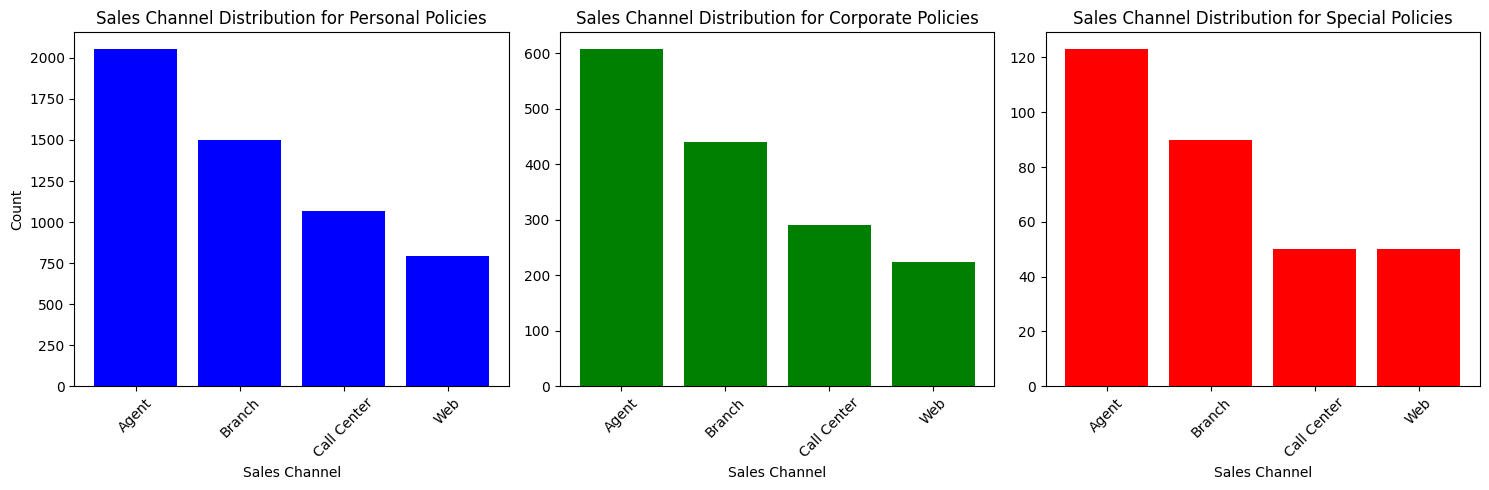

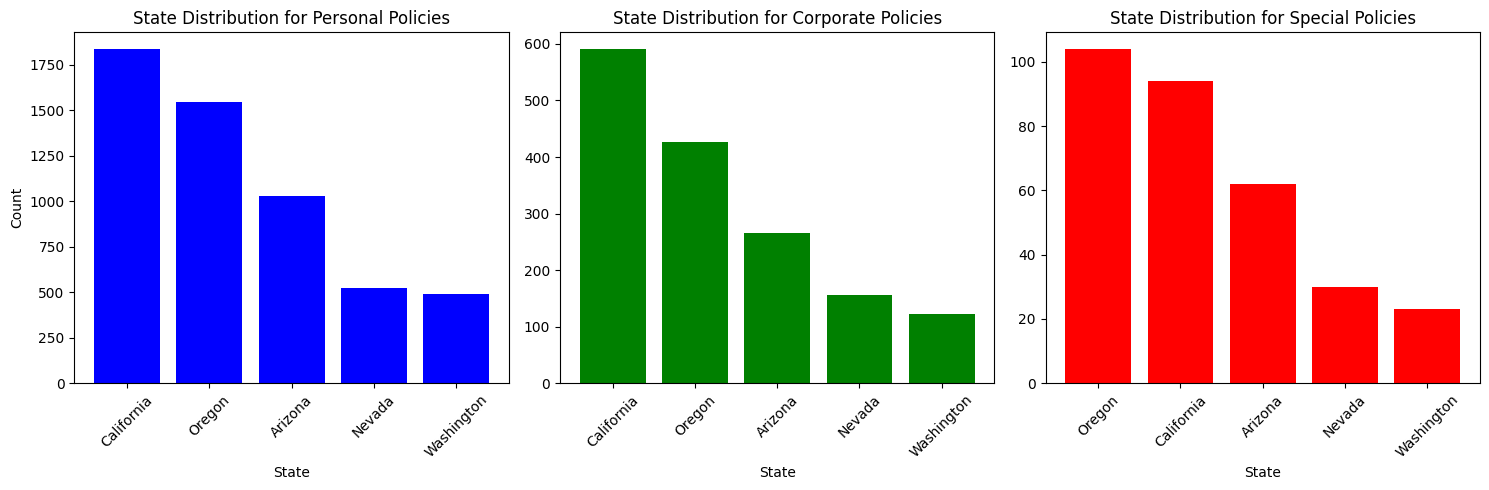

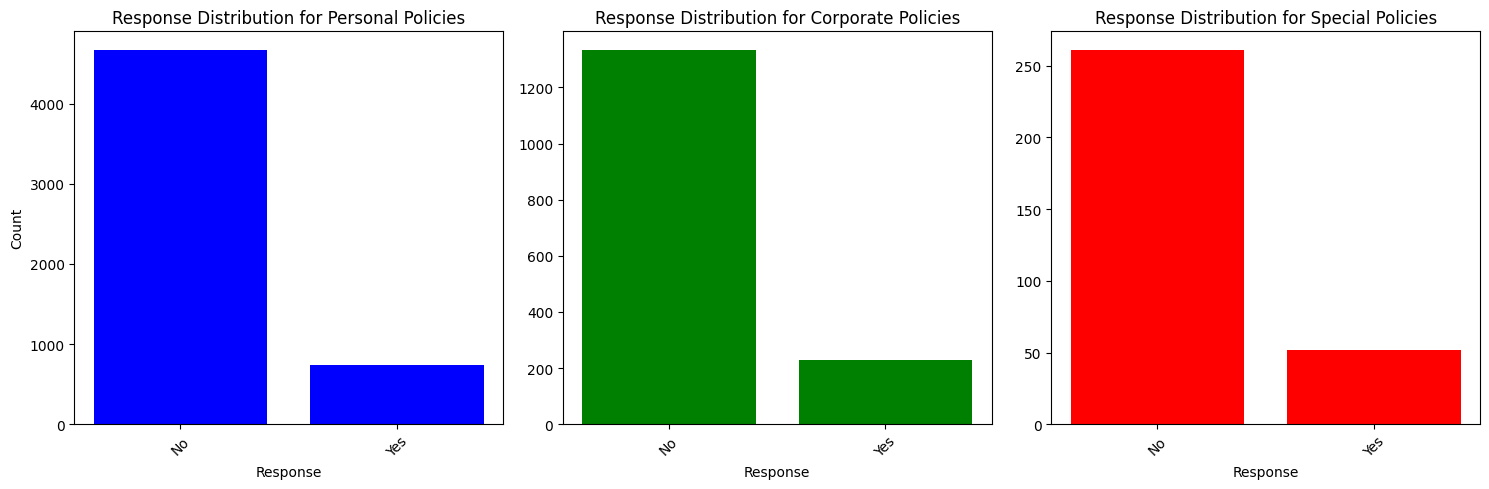

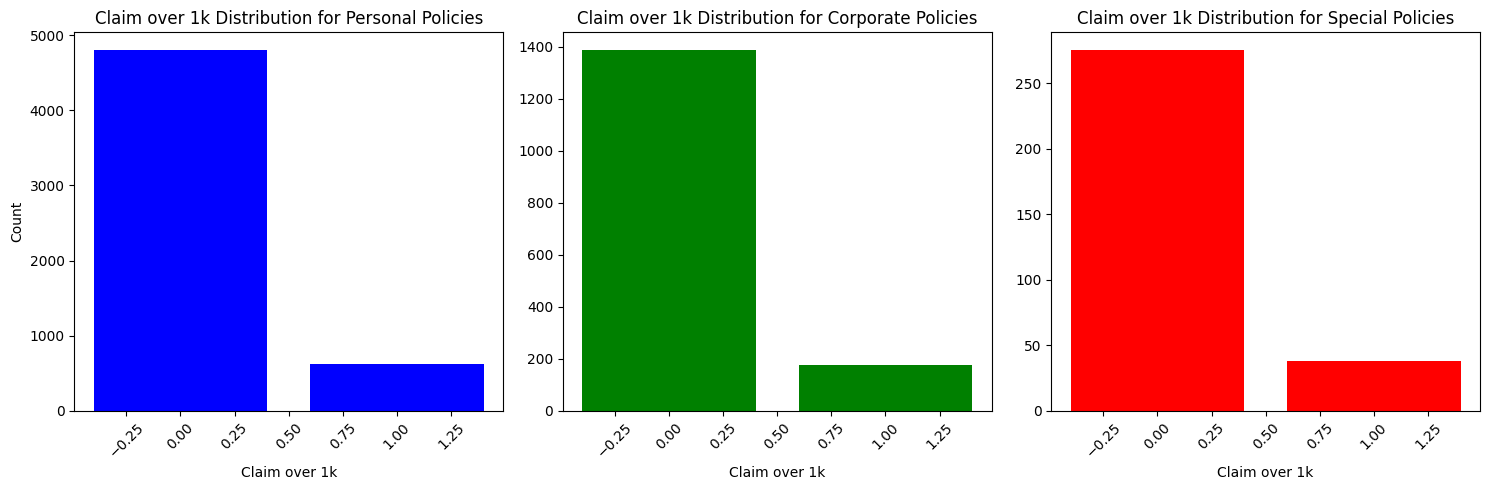

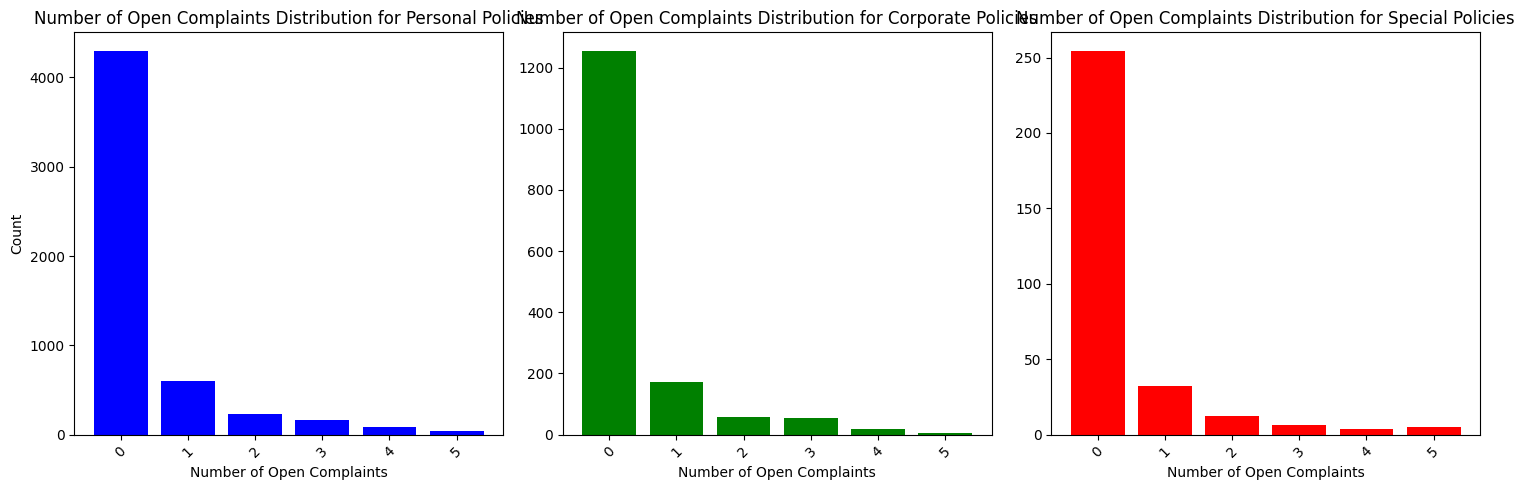

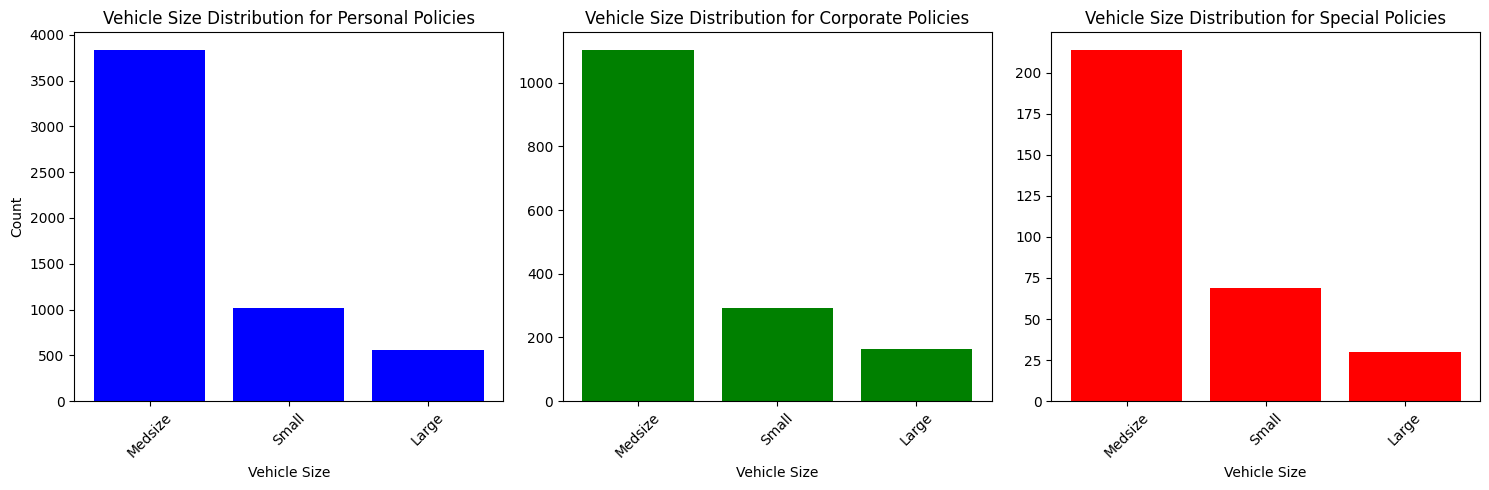

In [44]:
plot_policy_levels('Education')
plot_policy_levels('Employment Status')
plot_policy_levels('Coverage')
plot_policy_levels('Sales Channel')
plot_policy_levels('State')
plot_policy_levels('Response')
plot_policy_levels('Claim over 1k')
plot_policy_levels('Number of Open Complaints')
plot_policy_levels('Vehicle Size')

In [45]:
def plot_policy_levels(input_feature):

    values_l1 = df_l1[input_feature].dropna()
    values_l2 = df_l2[input_feature].dropna()
    values_l3 = df_l3[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(5, 5))

    data = [values_l1, values_l2, values_l3]

    ax.boxplot(data, patch_artist=True, labels=['L1 Policies', 'L2 Policies', 'L3 Policies'])

    ax.set_title(input_feature + ' Box Plot Distribution')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()

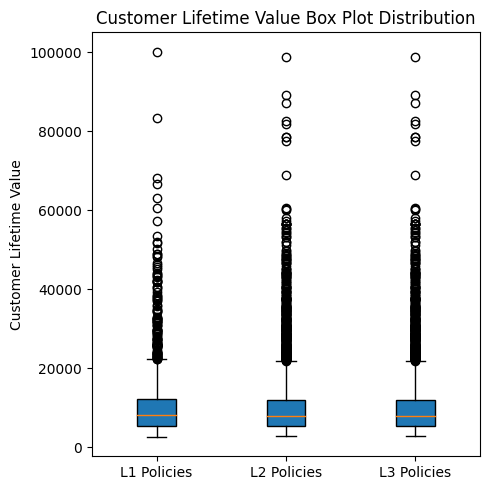

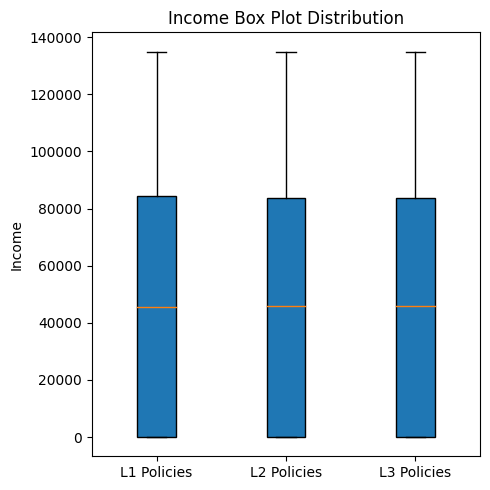

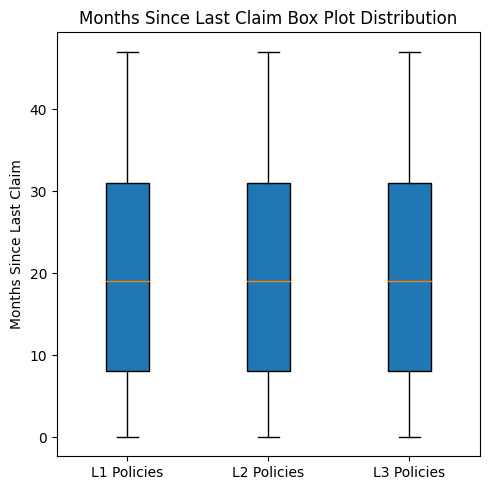

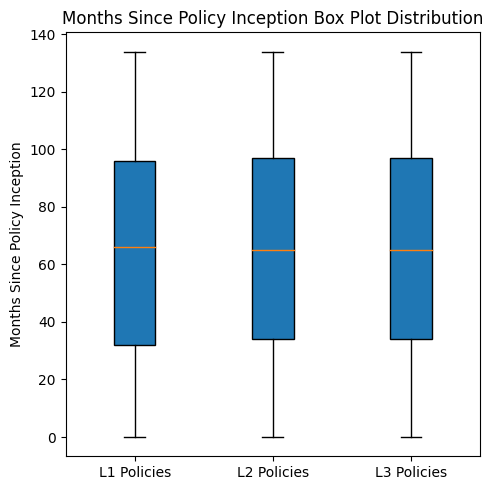

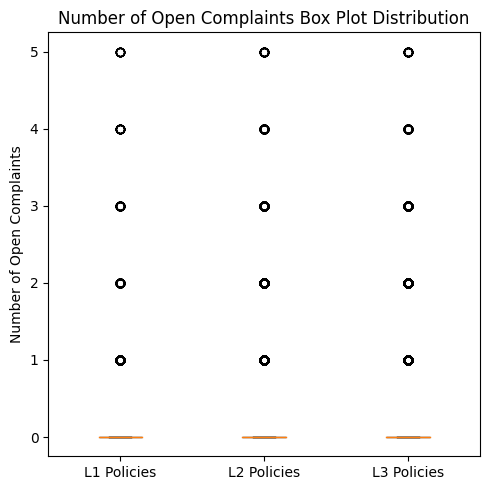

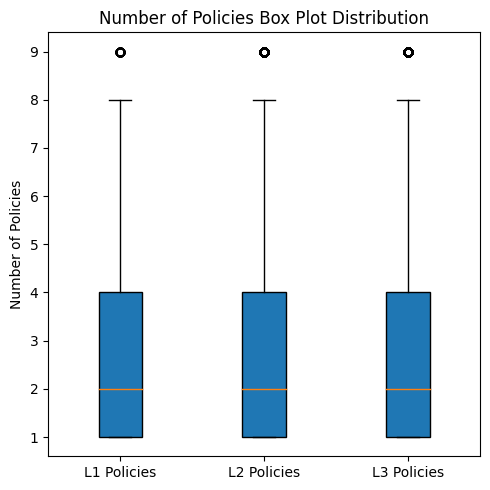

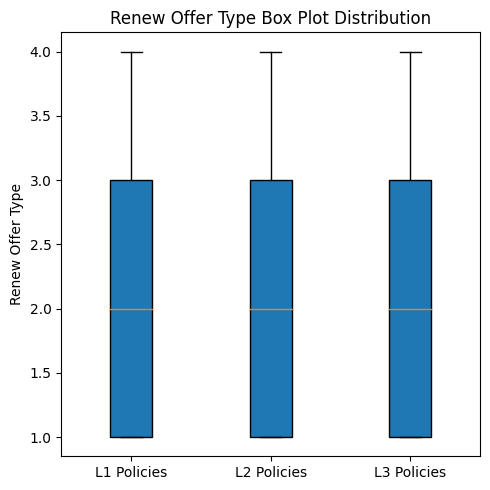

In [46]:
for feature in actual_numeric_cols:
    plot_policy_levels(feature)

## Each Class

In [47]:
df['Claim over 1k'].value_counts()

Claim over 1k
0    6458
1     832
Name: count, dtype: int64

In [48]:
df_over = df[df['Claim over 1k']==1]
df_under = df[df['Claim over 1k']==0]

def plot_claim_levels(input_feature):
    over_values = df_over[input_feature].value_counts()
    under_values = df_under[input_feature].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row and 2 columns

    # Plot for Claims Over 1k
    ax[0].bar(over_values.index, over_values.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for Claims Over 1k')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    # Plot for Claims Under 1k
    ax[1].bar(under_values.index, under_values.values, color='red')
    ax[1].set_title(input_feature + ' Distribution for Claims Under 1k')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_claim_box(input_feature):
    over_values = df_over[input_feature].dropna()
    under_values = df_under[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(7, 5))

    data = [over_values, under_values]

    ax.boxplot(data, patch_artist=True, labels=['Over 1k Claims', 'Under 1k Claims'])

    ax.set_title(input_feature + ' Box Plot Distribution by Claim Levels')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()


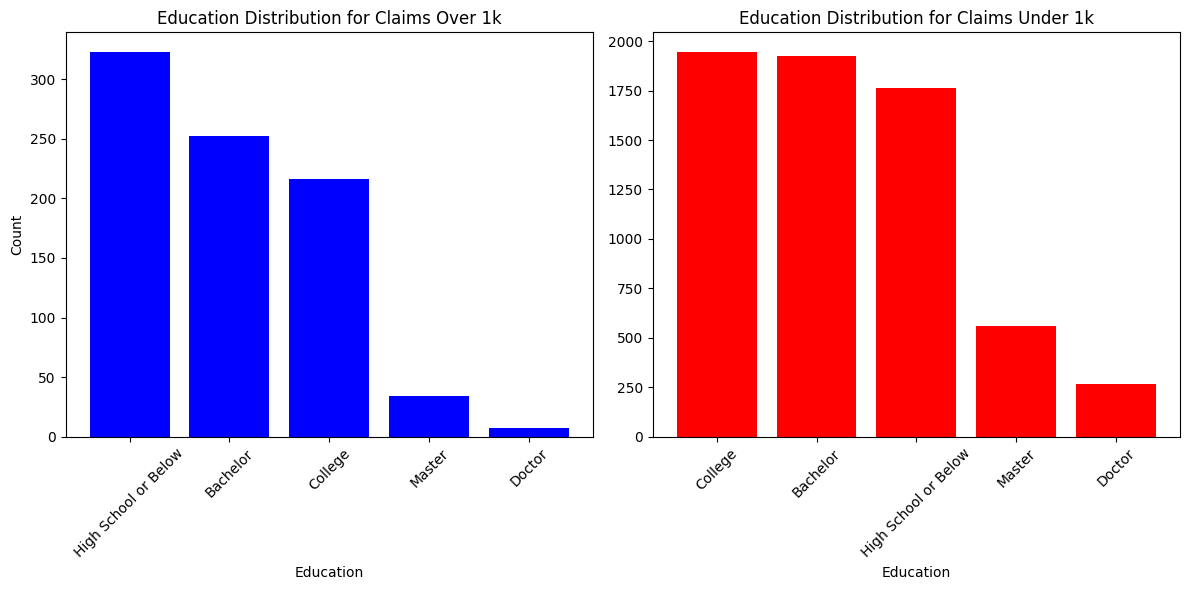

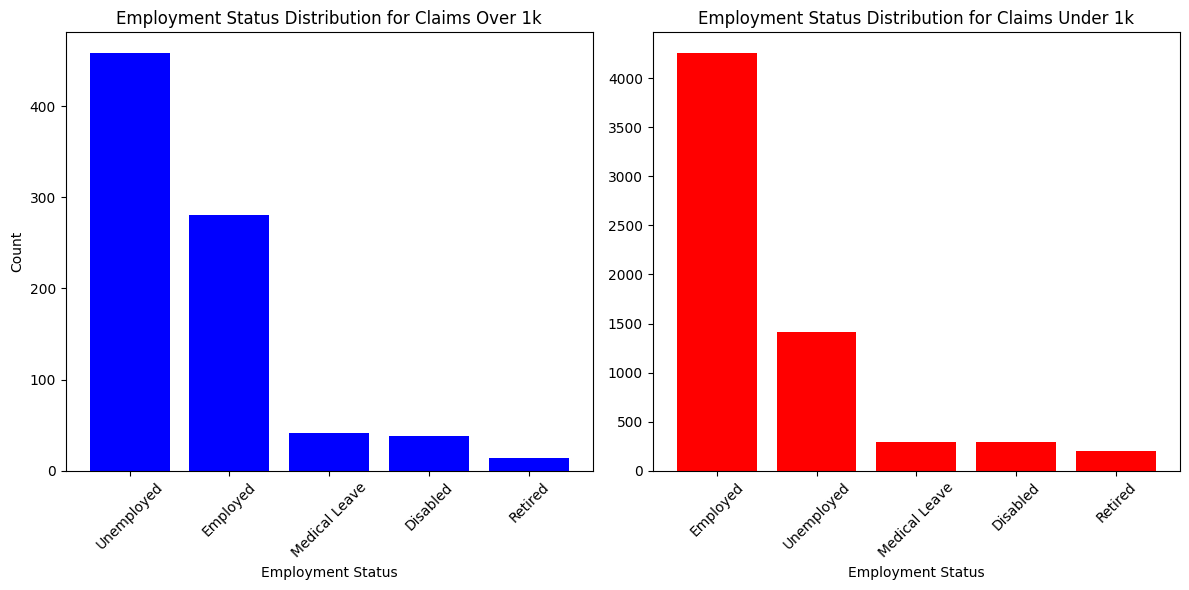

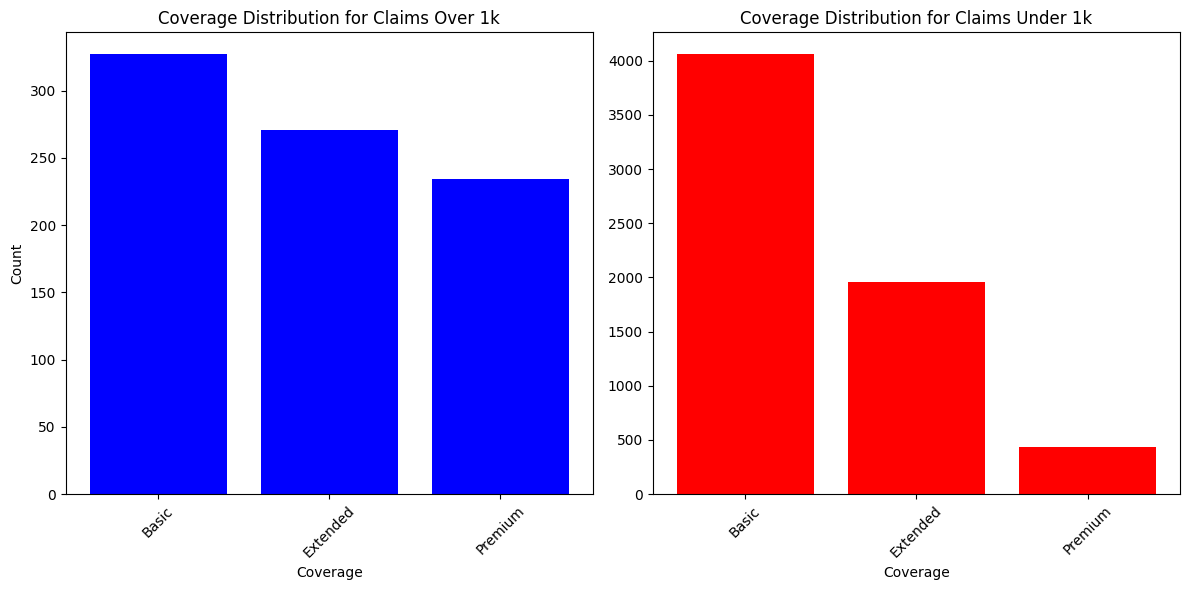

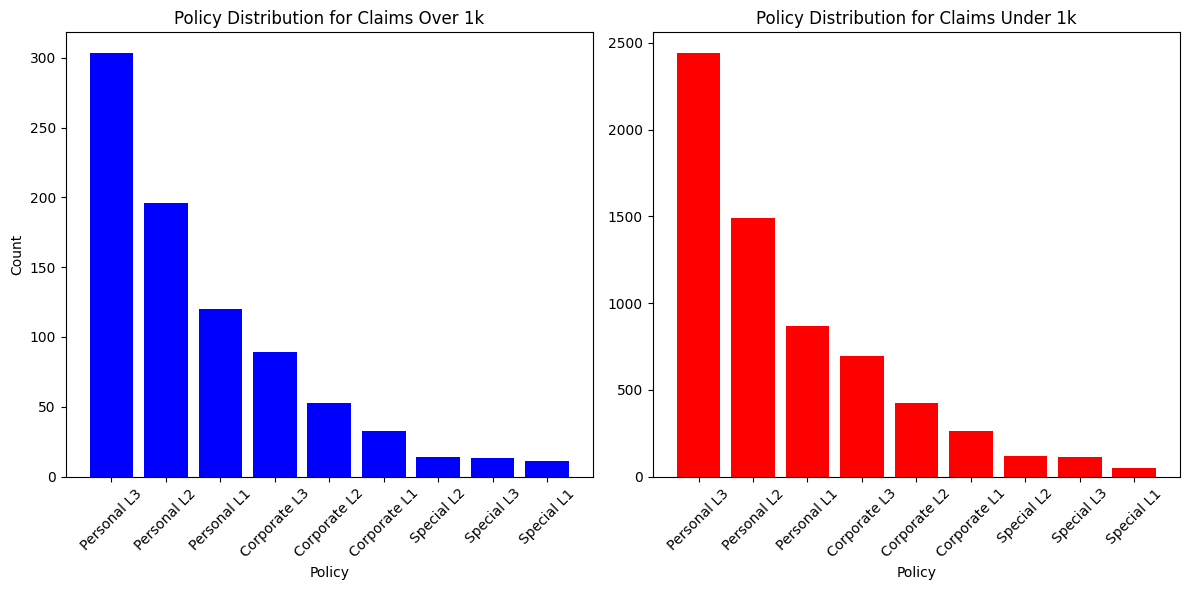

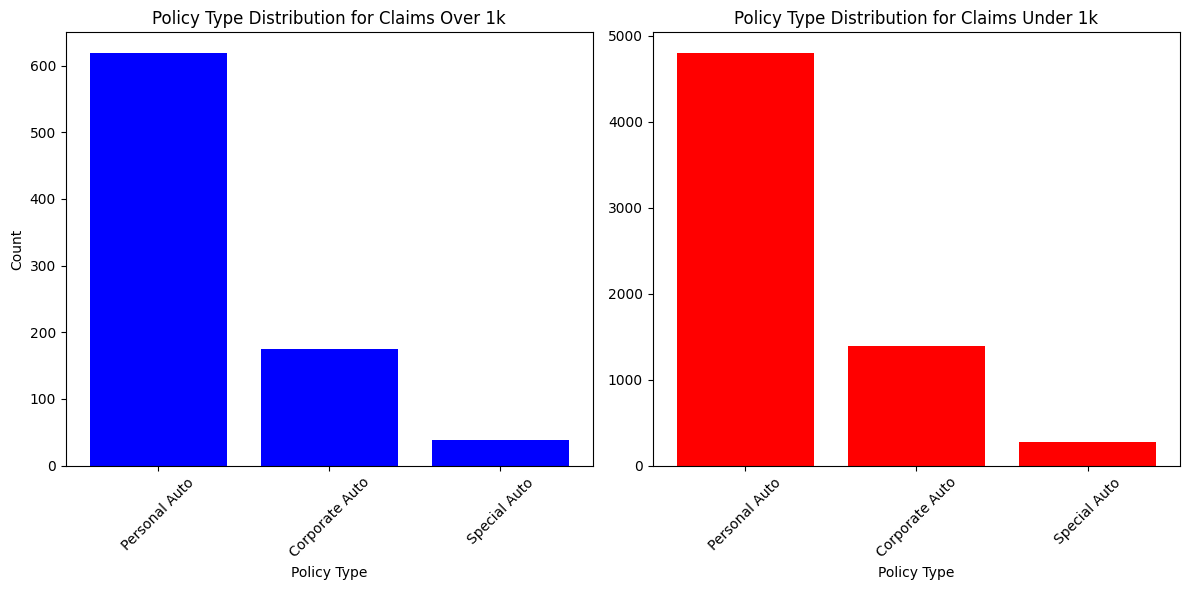

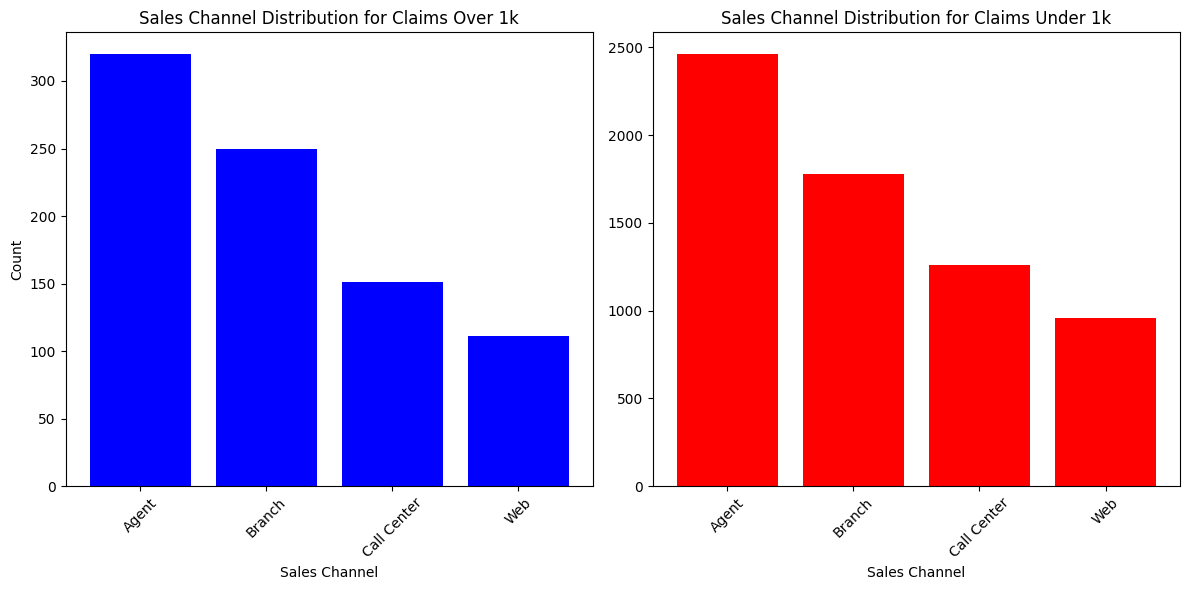

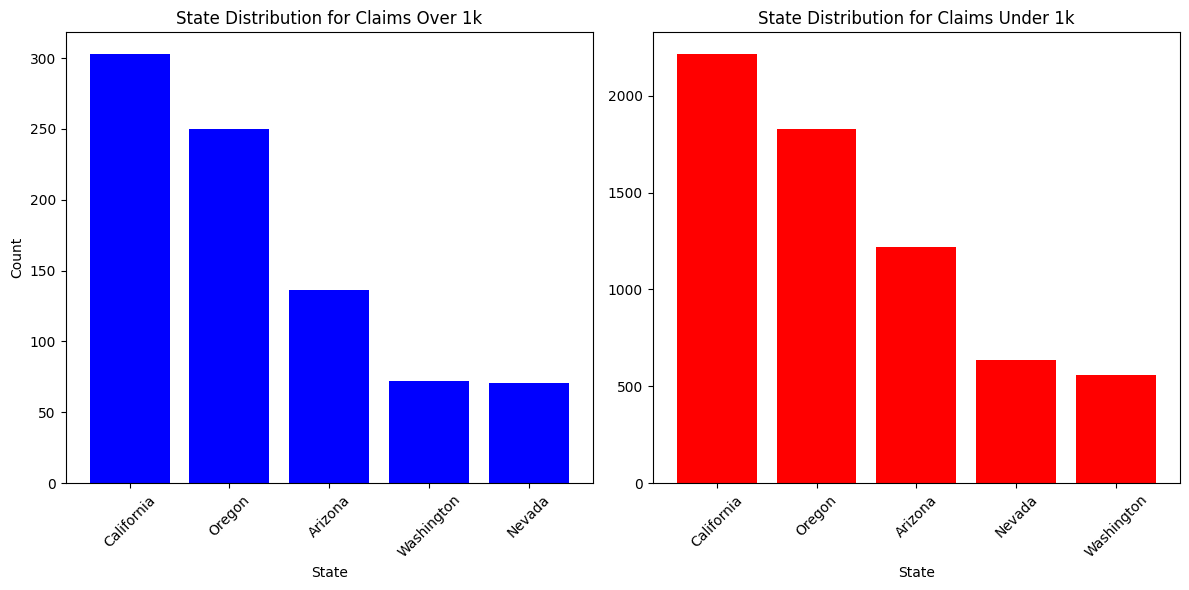

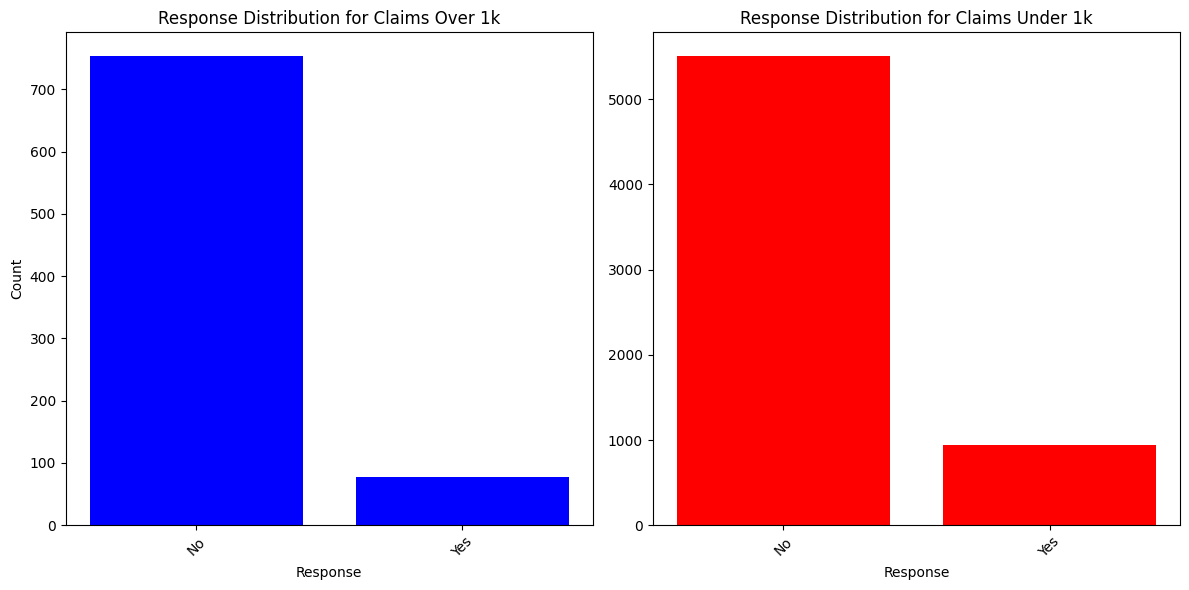

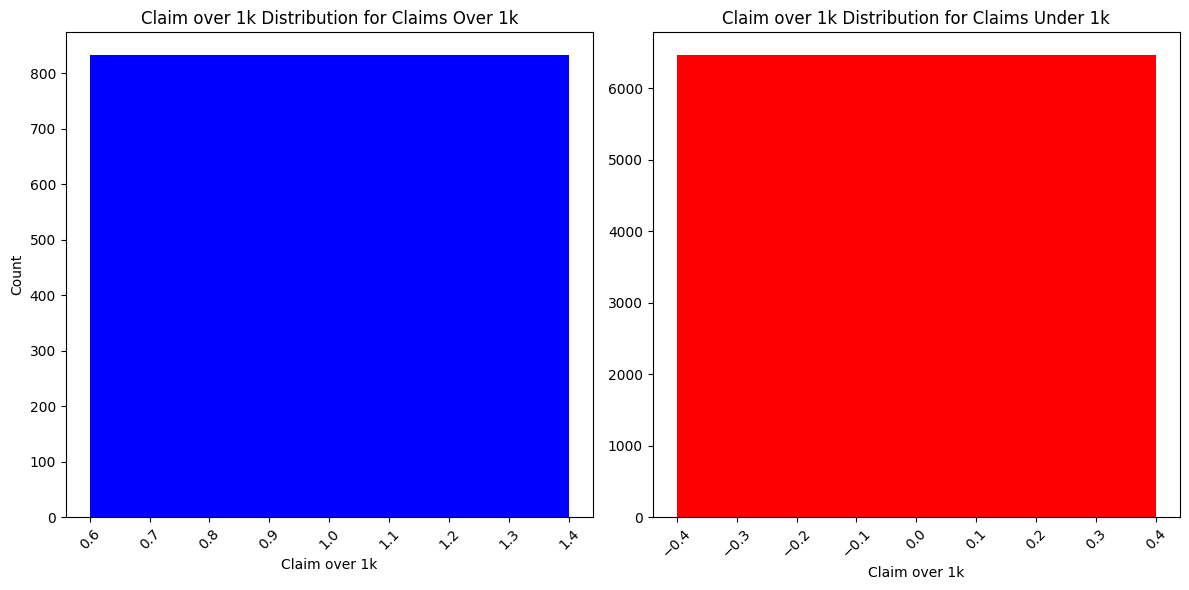

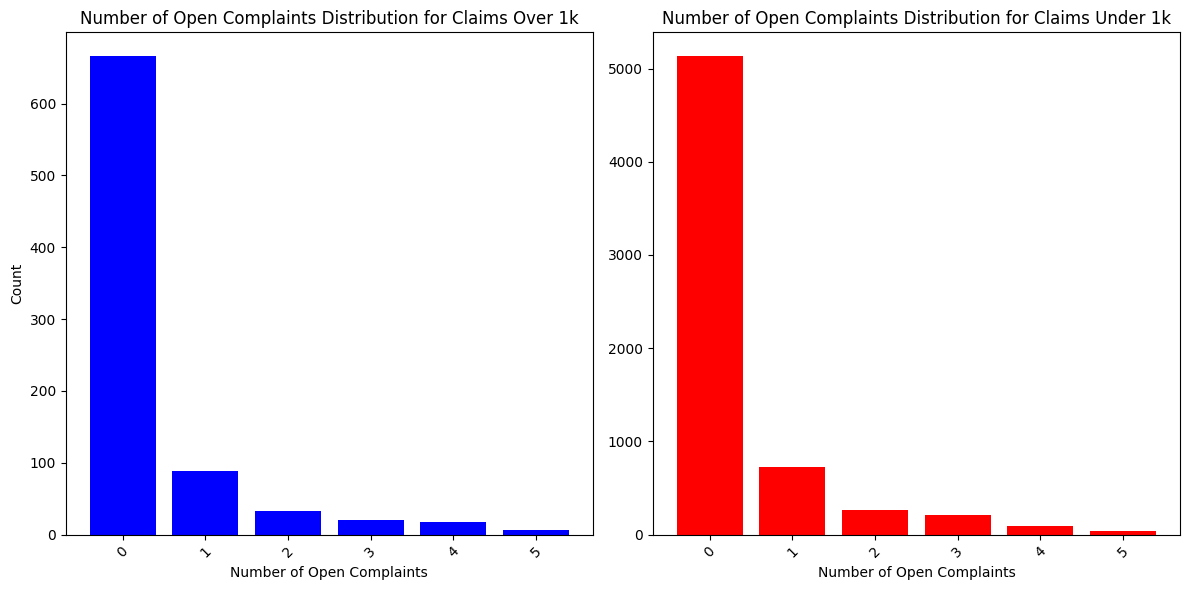

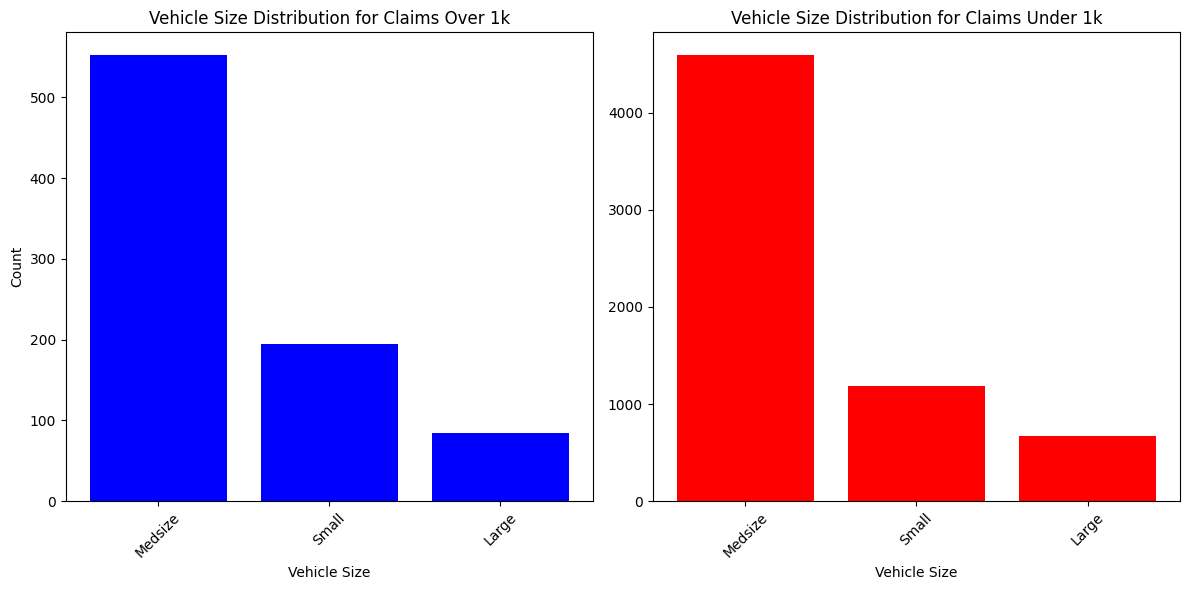

In [49]:
plot_claim_levels('Education')
plot_claim_levels('Employment Status')
plot_claim_levels('Coverage')
plot_claim_levels('Policy')
plot_claim_levels('Policy Type')
plot_claim_levels('Sales Channel')
plot_claim_levels('State')
plot_claim_levels('Response')
plot_claim_levels('Claim over 1k')
plot_claim_levels('Number of Open Complaints')
plot_claim_levels('Vehicle Size')

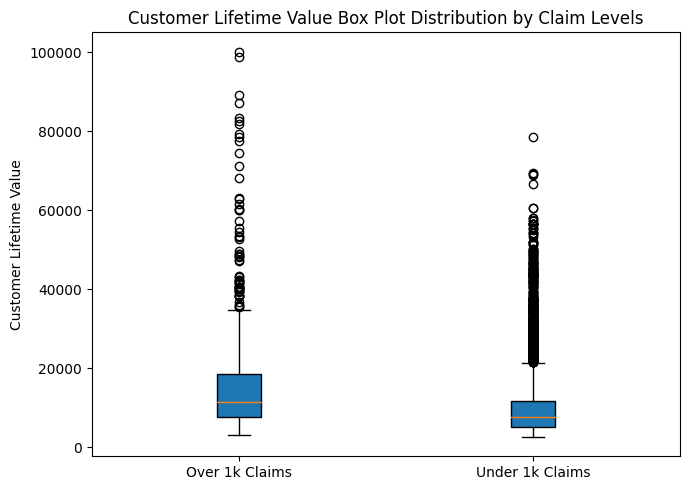

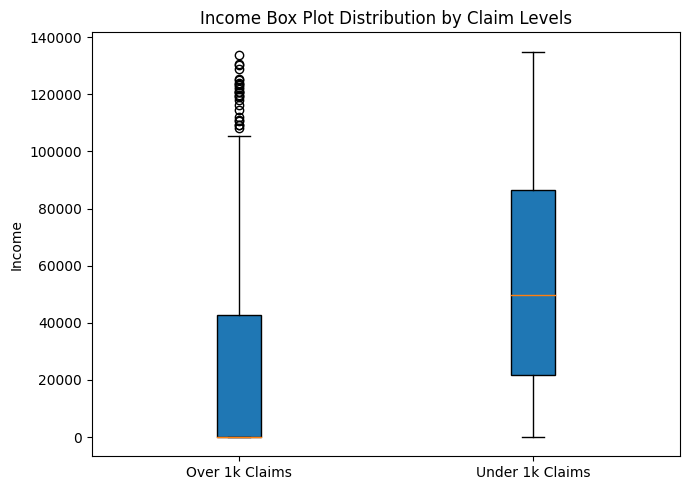

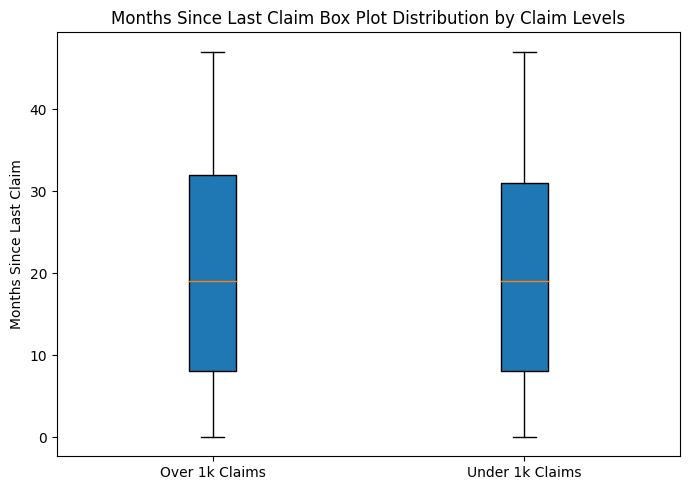

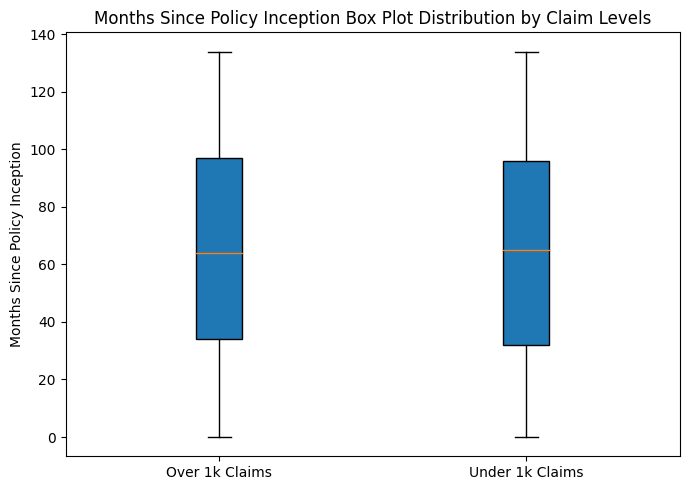

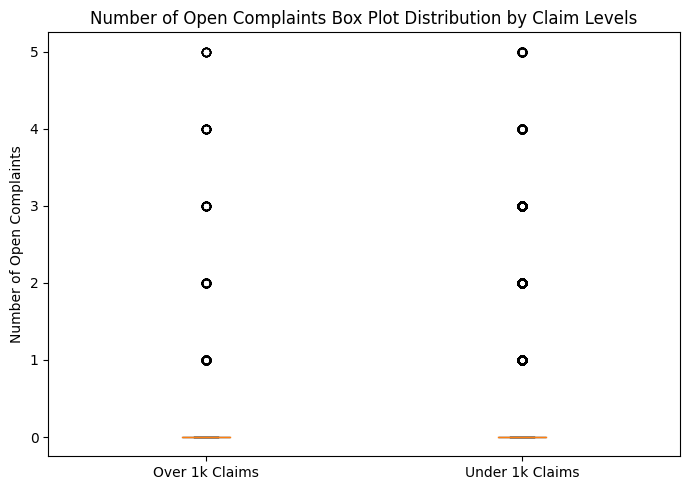

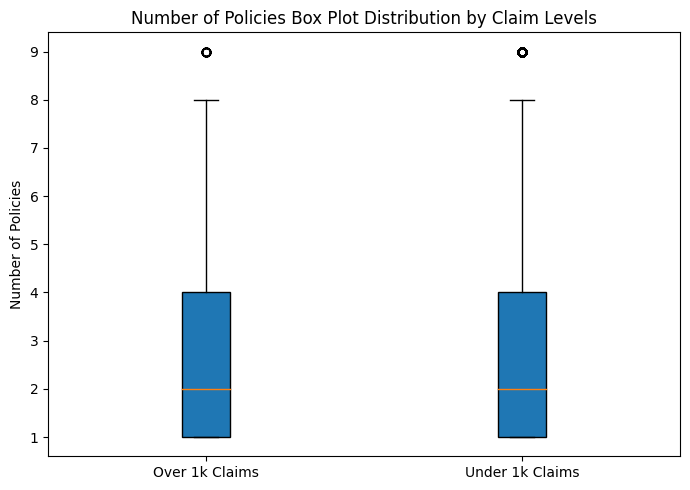

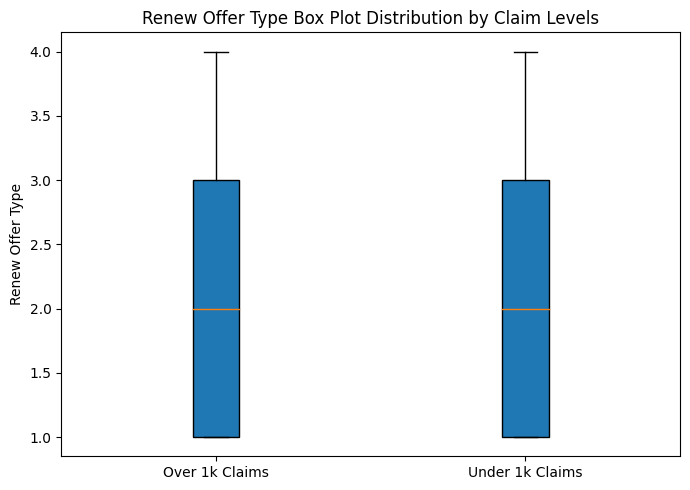

In [50]:
for feature in actual_numeric_cols:
    plot_claim_box(feature)

## Each year

In [51]:
df['Year'] = df['Effective To Date'].map(lambda x: x[-4:])
df_test['Year'] = df_test['Effective To Date'].map(lambda x: x[-4:])
df_2011 = df[df['Year'] == '2011']
df_2024 = df[df['Year'] == '2024']

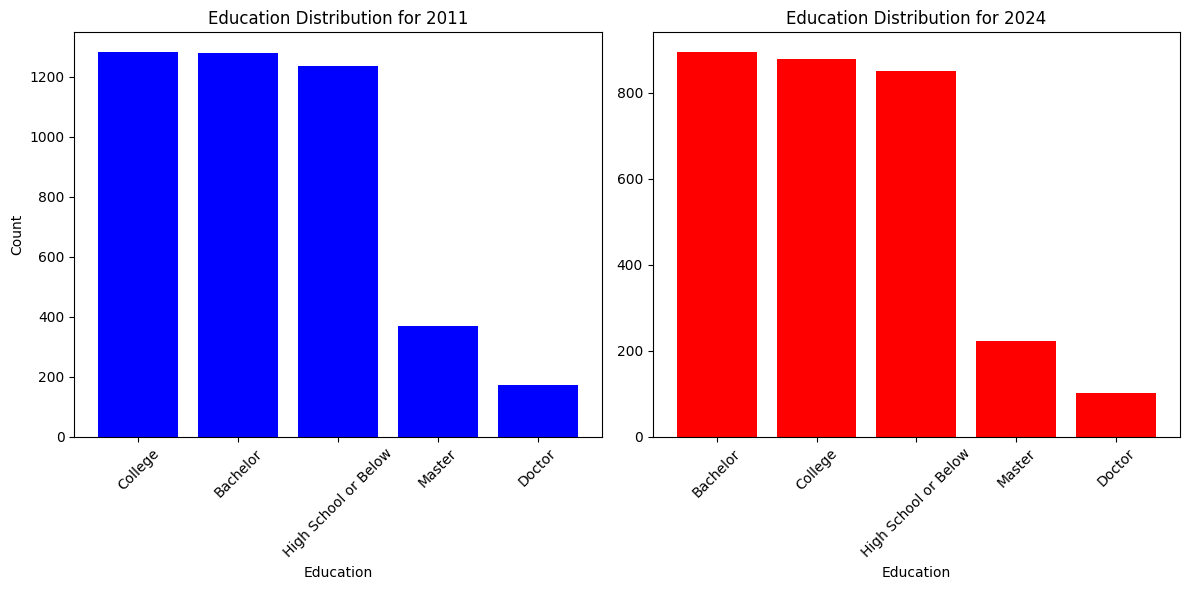

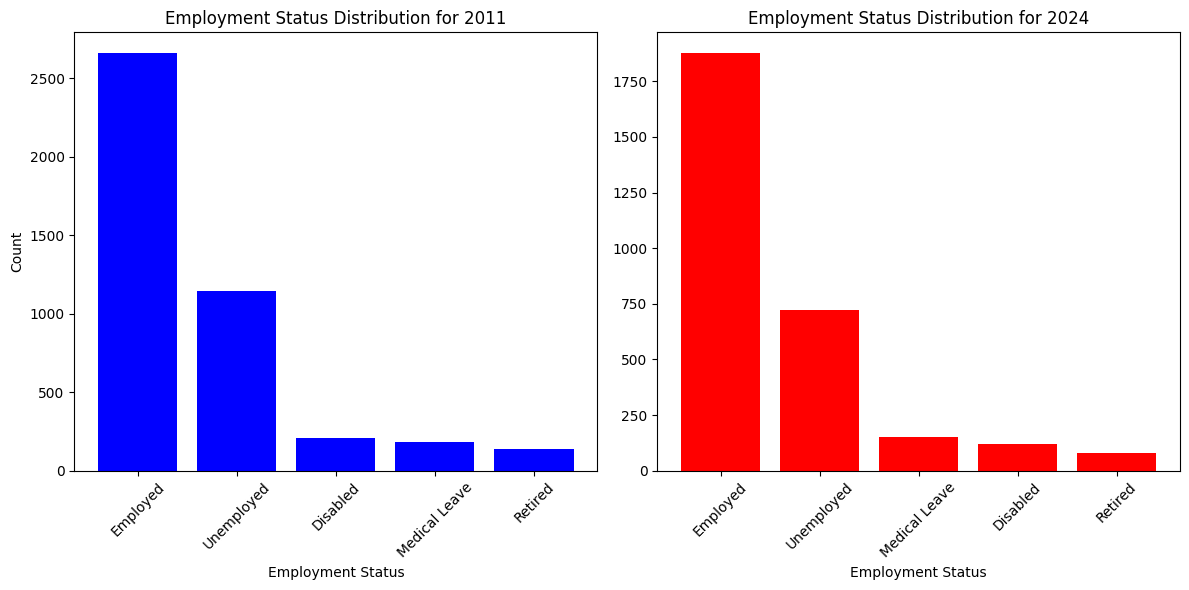

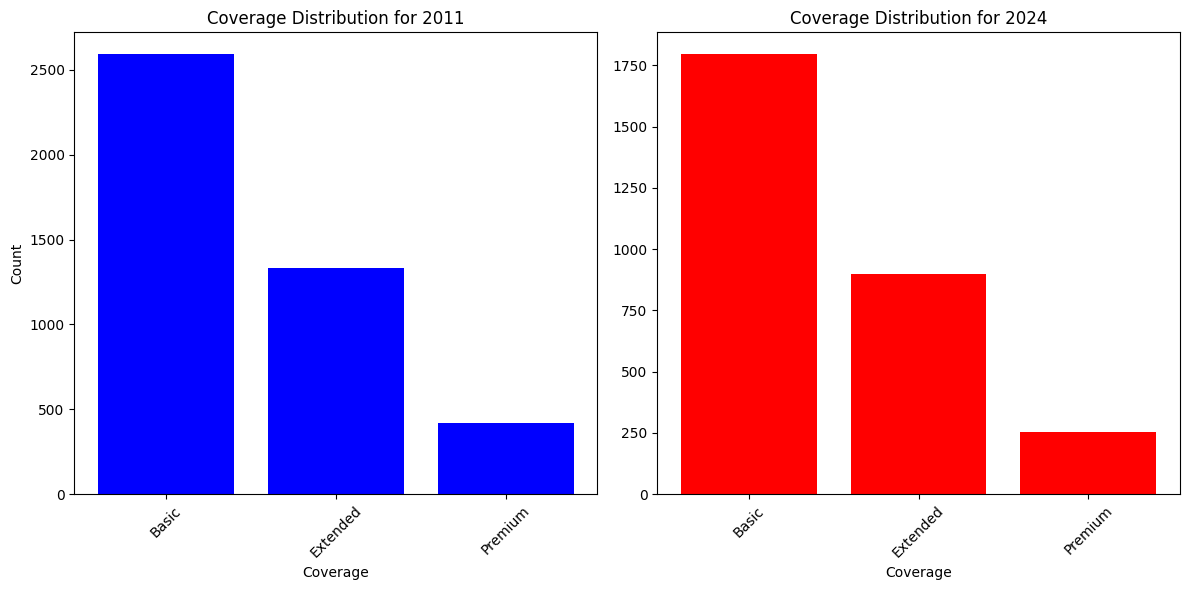

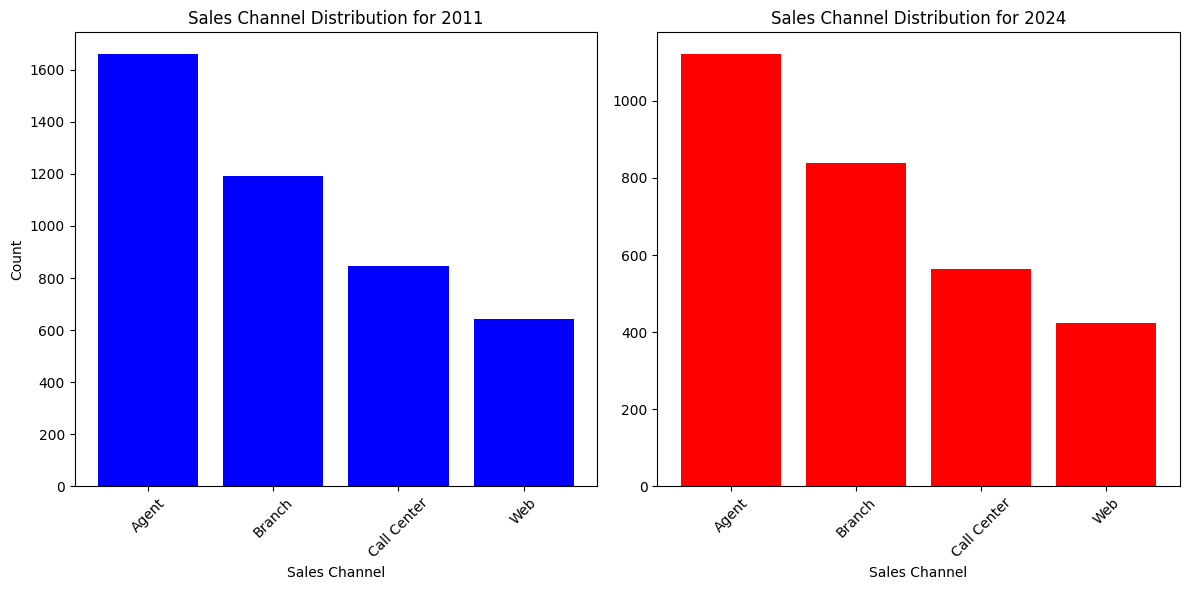

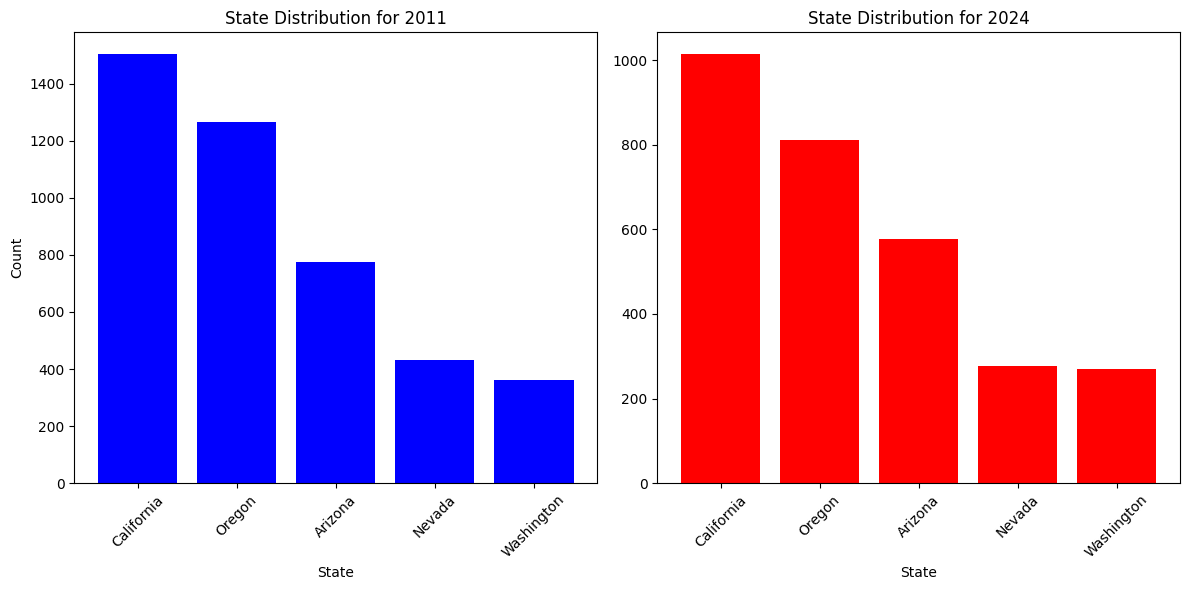

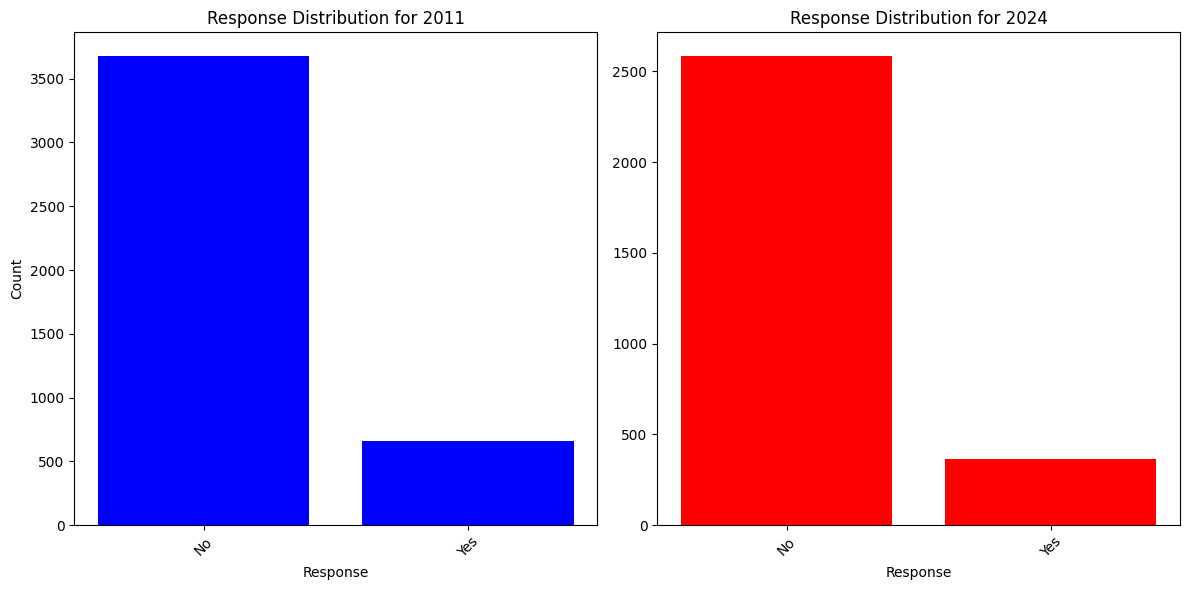

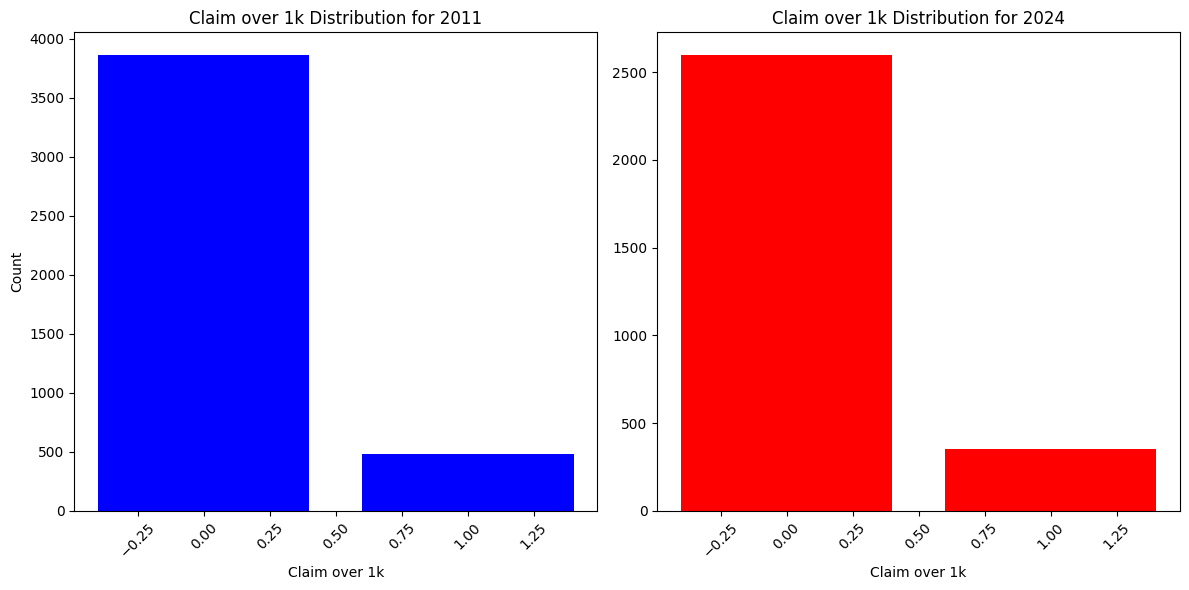

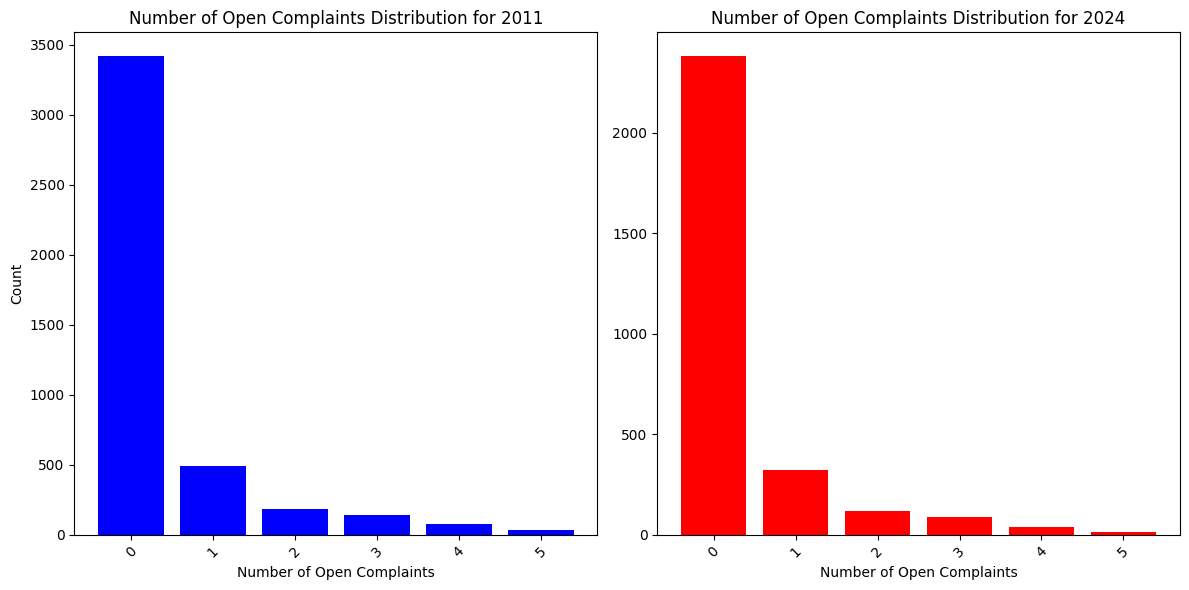

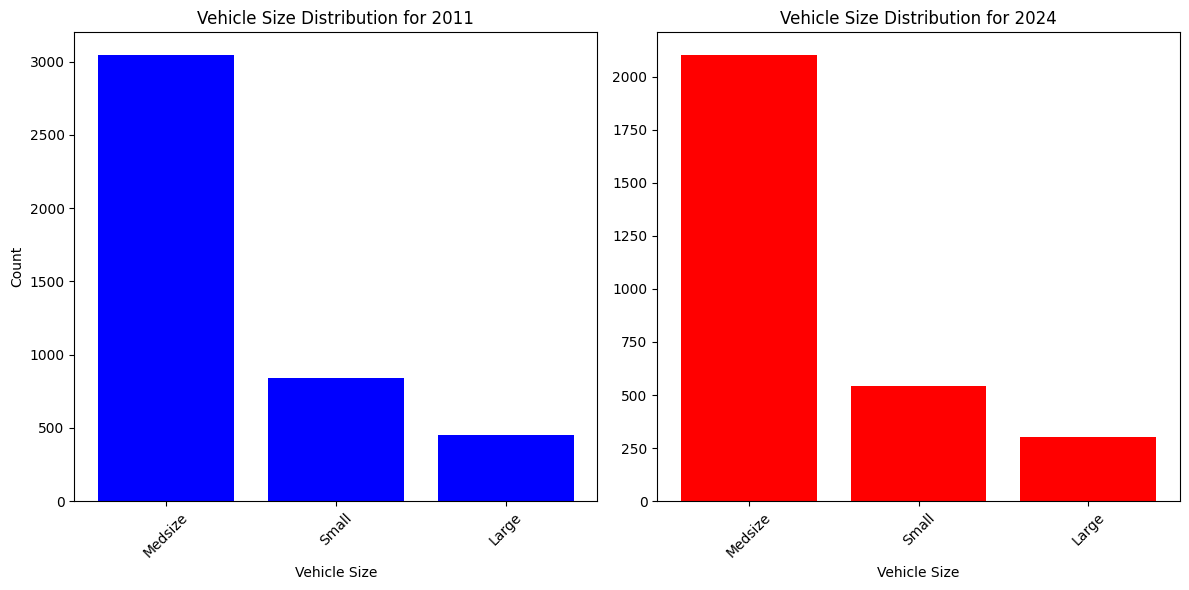

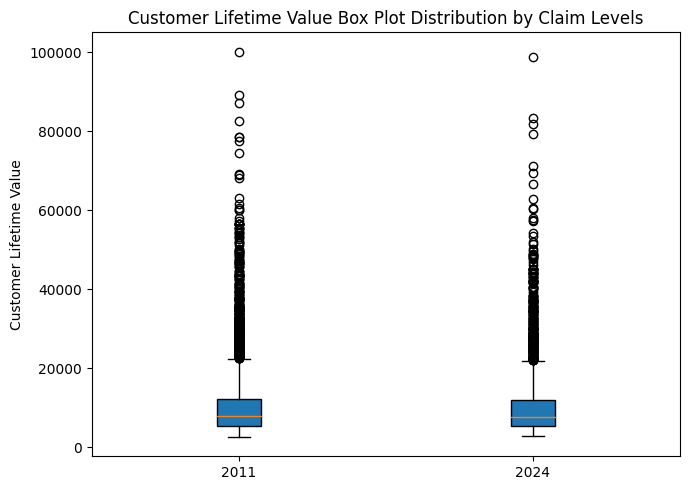

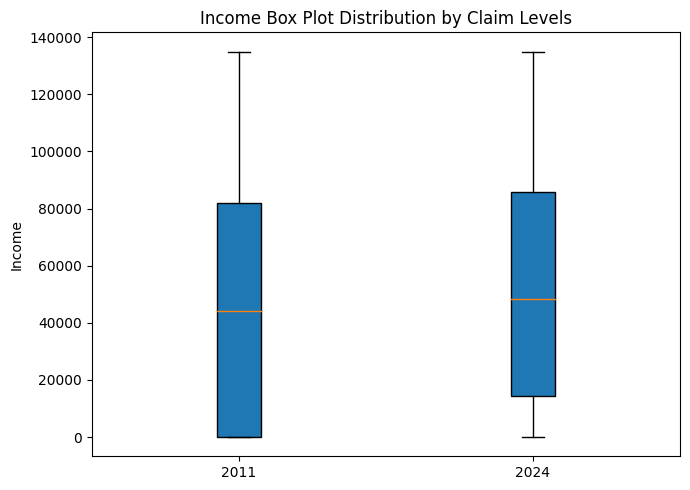

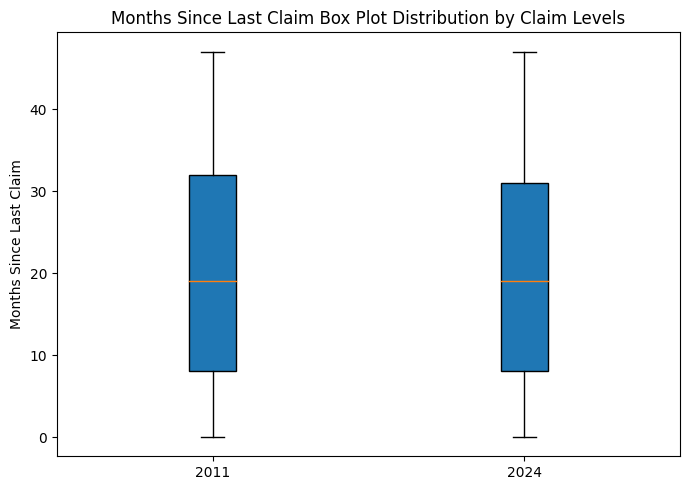

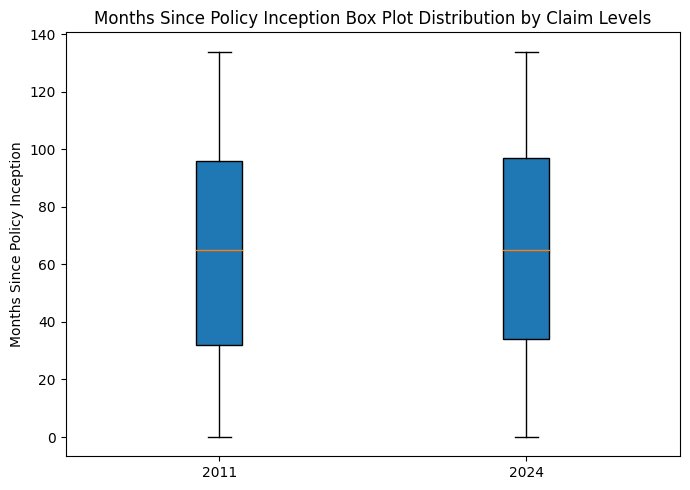

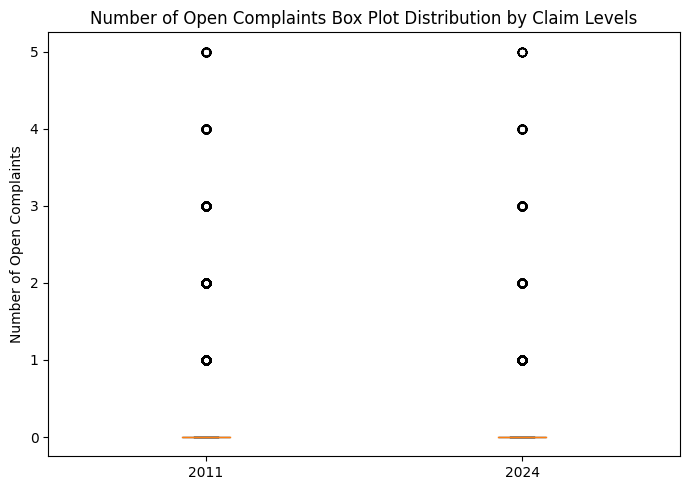

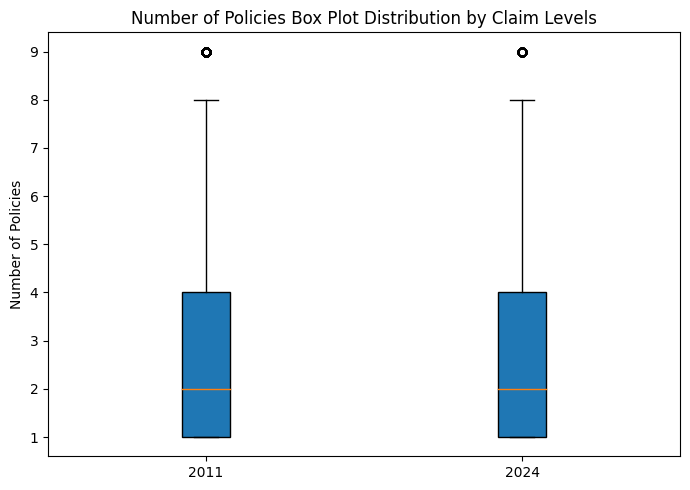

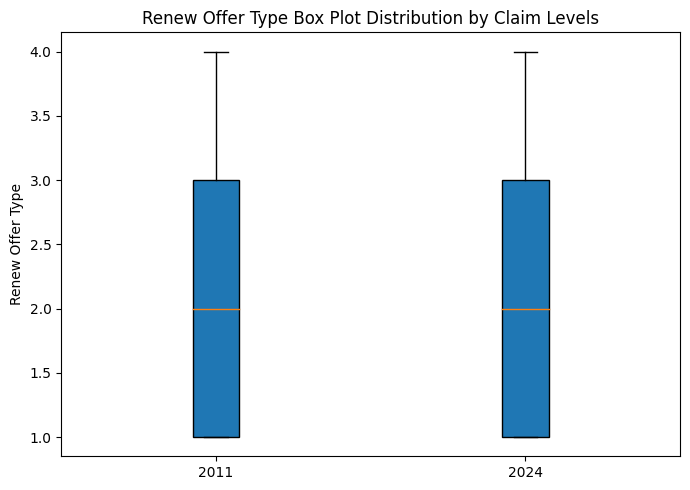

In [52]:
def plot_year(input_feature):
    over_values = df_2011[input_feature].value_counts()
    under_values = df_2024[input_feature].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row and 2 columns

    # Plot for Claims Over 1k
    ax[0].bar(over_values.index, over_values.values, color='blue')
    ax[0].set_title(input_feature + ' Distribution for 2011')
    ax[0].set_xlabel(input_feature)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    # Plot for Claims Under 1k
    ax[1].bar(under_values.index, under_values.values, color='red')
    ax[1].set_title(input_feature + ' Distribution for 2024')
    ax[1].set_xlabel(input_feature)
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_year_box(input_feature):
    over_values = df_2011[input_feature].dropna()
    under_values = df_2024[input_feature].dropna()

    fig, ax = plt.subplots(figsize=(7, 5))

    data = [over_values, under_values]

    ax.boxplot(data, patch_artist=True, labels=['2011', '2024'])

    ax.set_title(input_feature + ' Box Plot Distribution by Claim Levels')
    ax.set_ylabel(input_feature)

    plt.tight_layout()
    plt.show()


plot_year('Education')
plot_year('Employment Status')
plot_year('Coverage')
plot_year('Sales Channel')
plot_year('State')
plot_year('Response')
plot_year('Claim over 1k')
plot_year('Number of Open Complaints')
plot_year('Vehicle Size')

for feature in actual_numeric_cols:
    plot_year_box(feature)

## Each Quarter

In [53]:
def to_quarter(date):
    month = date.split('/')[0]
    if month >= '1' and month < '4':
        return 'Q1'
    elif month >= '4' and month < '7':
        return 'Q2'
    elif month >= '7' and month < '10':
        return 'Q3'
    elif month >= '10' and month < '12':
        return 'Q4'
    
df['Quarter'] = df['Effective To Date'].map(lambda date: to_quarter(date))
df['Quarter'].value_counts()

df_test['Quarter'] = df_test['Effective To Date'].map(lambda date: to_quarter(date))

# Preprocessing

Re encode some features

In [54]:
df = pd.read_csv("/kaggle/input/ASNA-hackathon/train.csv")
df_test = pd.read_csv("/kaggle/input/ASNA-hackathon/test.csv")
sample = pd.read_csv("/kaggle/input/ASNA-hackathon/sample_submission.csv")

In [55]:
df.columns

Index(['CustomerID', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Coverage Index', 'Education', 'Education Index',
       'Effective To Date', 'Employment Status', 'Employment Status Index',
       'Gender', 'Income', 'Marital Status', 'Marital Status Index',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy Type Index', 'Policy', 'Policy Index', 'Renew Offer Type',
       'Sales Channel', 'Sales Channel Index', 'Vehicle Size',
       'Vehicle Size Index', 'Claim over 1k'],
      dtype='object')

In [56]:
# df_train = pd.read_csv("/kaggle/input/ASNA-hackathon/train.csv") #7290
# df_test = pd.read_csv("/kaggle/input/ASNA-hackathon/test.csv") #1844
# for c in df_train.columns:
#     if c != 'Effective To Date':
#         col_type = df_train[c].dtype
#         if col_type == 'object' or col_type.name == 'category':
#             df_train[c] = df_train[c].astype('category')

# for c in df_test.columns:
#     if c != 'Effective To Date':
#         col_type = df_test[c].dtype
#         if col_type == 'object' or col_type.name == 'category':
#             df_test[c] = df_test[c].astype('category')

# cols_with_missing = [col for col in df_train.columns 
#                                  if df_train[col].isnull().any()]                                  
# candidate_train_predictors = df_train.drop(['CustomerID', 'Claim over 1k', 'Coverage', 'Education', 'Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'Vehicle Size'] + cols_with_missing, axis=1)
# candidate_test_predictors = df_test.drop(['CustomerID', 'Coverage', 'Education', 'Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'Vehicle Size'] + cols_with_missing, axis=1)
# candidate_train_predictors['Effective To Date'] = pd.to_datetime(candidate_train_predictors['Effective To Date'])
# candidate_train_predictors['Current Date'] = '10/1/2024'
# candidate_train_predictors['Current Date'] = pd.to_datetime(candidate_train_predictors['Current Date'])

# # create new columns
# candidate_train_predictors['clv_avg'] = candidate_train_predictors['Customer Lifetime Value'] / candidate_train_predictors['Months Since Policy Inception']
# candidate_train_predictors['complaints_avg'] = candidate_train_predictors['Number of Open Complaints'] / candidate_train_predictors['Number of Policies']
# candidate_train_predictors = candidate_train_predictors.drop(['Number of Open Complaints'], axis=1)
# candidate_train_predictors['Policy Age (in months)'] = ((candidate_train_predictors['Current Date'] - candidate_train_predictors['Effective To Date']) / pd.Timedelta(days=30.44)).astype(int)
# candidate_train_predictors = candidate_train_predictors.drop(['Current Date', 'Effective To Date'], axis=1)
# # remove noise
# candidate_train_predictors = candidate_train_predictors.drop(['State', 'Policy', 'Sales Channel', 'Renew Offer Type', 'Policy Type'], axis=1)
# candidate_test_predictors['Effective To Date'] = pd.to_datetime(candidate_test_predictors['Effective To Date'])
# candidate_test_predictors['Current Date'] = '10/1/2024'
# candidate_test_predictors['Current Date'] = pd.to_datetime(candidate_test_predictors['Current Date'])

# # create new columns
# candidate_test_predictors['clv_avg'] = candidate_test_predictors['Customer Lifetime Value'] / candidate_test_predictors['Months Since Policy Inception']
# candidate_test_predictors['complaints_avg'] = candidate_test_predictors['Number of Open Complaints'] / candidate_test_predictors['Number of Policies']
# candidate_test_predictors = candidate_test_predictors.drop(['Number of Open Complaints'], axis=1)
# candidate_test_predictors['Policy Age (in months)'] = ((candidate_test_predictors['Current Date'] - candidate_test_predictors['Effective To Date']) / pd.Timedelta(days=30.44)).astype(int)
# candidate_test_predictors = candidate_test_predictors.drop(['Current Date', 'Effective To Date'], axis=1)
# # remove noise
# candidate_test_predictors = candidate_test_predictors.drop(['State', 'Policy', 'Sales Channel', 'Renew Offer Type', 'Policy Type'], axis=1)
# y = df_train['Claim over 1k']
# X = candidate_train_predictors

In [57]:
def to_employment_status(x):
    if x == 'Medical Leave' or x == 'Disabled'or x == 'Retired':
        return 'Other'
    
    return x

df['Employment Status'] = df['Employment Status'].map(lambda x: to_employment_status(x))
df_test['Employment Status'] = df_test['Employment Status'].map(lambda x: to_employment_status(x))

In [58]:
df_train = df

In [59]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
df['Current Date'] = '10/1/2024'
df['Current Date'] = pd.to_datetime(df['Current Date'])
df['clv_avg'] = df['Customer Lifetime Value'] / df['Months Since Policy Inception'].replace([0], 1)
df['complaints_avg'] = df['Number of Open Complaints'] / df['Number of Policies']
df['Months Since Last Claim'] = df['Months Since Last Claim'].replace(0, 1)
df['Months Since Policy Inception'] = df['Months Since Policy Inception'].replace(0, 1)
df['Expected Claim Size'] = (df['Customer Lifetime Value'] * (df['Months Since Last Claim'] / df['Months Since Policy Inception']) * np.log(1 + df['Number of Policies']))

df = df.drop(['Number of Open Complaints'], axis=1)
df['Policy Age (in months)'] = ((df['Current Date'] - df['Effective To Date']) / pd.Timedelta(days=30.44)).astype(int)
df = df.drop(['Current Date', 'Effective To Date'], axis=1)

df = df.drop(['State', 'Policy', 'Sales Channel', 'Renew Offer Type', 'Policy Type'], axis=1)

In [60]:
df_test['Effective To Date'] = pd.to_datetime(df_test['Effective To Date'])
df_test['Current Date'] = '10/1/2024'
df_test['Current Date'] = pd.to_datetime(df_test['Current Date'])
df_test['clv_avg'] = df_test['Customer Lifetime Value'] / df_test['Months Since Policy Inception'].replace([0], 1)
df_test['complaints_avg'] = df_test['Number of Open Complaints'] / df_test['Number of Policies']
df_test['Months Since Last Claim'] = df_test['Months Since Last Claim'].replace(0, 1)
df_test['Months Since Policy Inception'] = df_test['Months Since Policy Inception'].replace(0, 1)
df_test['Expected Claim Size'] = (df_test['Customer Lifetime Value'] * (df_test['Months Since Last Claim'] / df_test['Months Since Policy Inception']) * np.log(1 + df_test['Number of Policies']))

df_test = df_test.drop(['Number of Open Complaints'], axis=1)
df_test['Policy Age (in months)'] = ((df_test['Current Date'] - df_test['Effective To Date']) / pd.Timedelta(days=30.44)).astype(int)
df_test = df_test.drop(['Current Date', 'Effective To Date'], axis=1)

df_test = df_test.drop(['State', 'Policy', 'Sales Channel', 'Renew Offer Type', 'Policy Type'], axis=1)

In [61]:
one_hot_columns = ['Employment Status', 'Marital Status', 'Response', 'Gender']
drop = ['CustomerID','Employment Status Index', 'Marital Status Index', 'Policy Type Index', 'Policy Index', 'Sales Channel Index', 'Response', 'Gender', 'Coverage', 'Education',
       'Vehicle Size']
ids = df_test['CustomerID']
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
df_encoded = encoder.fit_transform(df[one_hot_columns])
df_test_encoded = encoder.transform(df_test[one_hot_columns])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(one_hot_columns), index=df.index)
df_test_encoded = pd.DataFrame(df_test_encoded, columns=encoder.get_feature_names_out(one_hot_columns), index=df_test.index)
df = pd.concat([df.drop(one_hot_columns + drop, axis=1), df_encoded], axis=1)
df_test = pd.concat([df_test.drop(one_hot_columns + drop, axis=1), df_test_encoded], axis=1)

In [62]:
numeric_cols = df.select_dtypes(include=['number', 'bool']).columns
categoric_cols = df.select_dtypes(exclude=['number', 'bool']).columns
print(len(numeric_cols), len(categoric_cols))
print(numeric_cols)
print(categoric_cols)

19 0
Index(['Customer Lifetime Value', 'Coverage Index', 'Education Index',
       'Income', 'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Policies', 'Vehicle Size Index', 'Claim over 1k', 'clv_avg',
       'complaints_avg', 'Expected Claim Size', 'Policy Age (in months)',
       'Employment Status_Other', 'Employment Status_Unemployed',
       'Marital Status_Married', 'Marital Status_Single', 'Response_Yes',
       'Gender_M'],
      dtype='object')
Index([], dtype='object')


encode date data...

In [63]:
df[np.isinf(df['clv_avg'])]['Months Since Policy Inception'].replace([0], 1)

Series([], Name: Months Since Policy Inception, dtype: int64)

# Modeling

In [64]:
df

Customer Lifetime Value  Coverage Index  Education Index  Income  \
0                     3622.69               0                2   65163   
1                    10610.21               0                0       0   
2                    13868.02               1                1   81196   
3                     3119.69               0                2       0   
4                     5999.04               2                2   62618   
...                       ...             ...              ...     ...   
7285                 27500.54               0                2       0   
7286                 11750.03               0                3   83561   
7287                  7757.04               0                2   69302   
7288                  3465.16               0                0   28856   
7289                  4023.01               1                1   18272   

      Months Since Last Claim  Months Since Policy Inception  \
0                           4                            107   
1                          26                             14   
2                          11                             38   
3                          16                             32   
4                          45                            126   
...                       ...                            ...   
7285                        1                             28   
7286                        9                            107   
7287                       23                            119   
7288                       19                             89   
7289                        9                             72   

      Number of Policies  Vehicle Size Index  Claim over 1k     clv_avg  \
0                      1                   1              0   33.856916   
1                      7                   1              1  757.872143   
2                      3                   1              0  364.947895   
3                      1                   1              0   97.490313   
4                      1                   1              0   47.611429   
...                  ...                 ...            ...         ...   
7285                   2                   1              0  982.162143   
7286                   2                   1              0  109.813364   
7287                   9                   1              0   65.185210   
7288                   1                   2              0   38.934382   
7289                   1                   0              0   55.875139   

      complaints_avg  Expected Claim Size  Policy Age (in months)  \
0                3.0            93.871303                       9   
1                0.0         40974.721246                       9   
2                0.0          5565.177294                       9   
3                0.0          1081.202164                       9   
4                0.0          1485.077736                       9   
...              ...                  ...                     ...   
7285             0.5          1079.015400                       0   
7286             0.0          1085.780805                       0   
7287             0.0          3452.173340                       0   
7288             0.0           512.757885                       0   
7289             1.0           348.567255                       0   

      Employment Status_Other  Employment Status_Unemployed  \
0                         0.0                           0.0   
1                         0.0                           1.0   
2                         0.0                           0.0   
3                         0.0                           1.0   
4                         0.0                           0.0   
...                       ...                           ...   
7285                      0.0                           1.0   
7286                      0.0                           0.0   
7287                      0.0                      

In [65]:
def learning_curve_plot(train_sizes, train_scores, test_scores):
    '''This function plot the leaning curve given the train sizes, train scores, and test scores'''
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color="blue", marker='o', markersize=5, label="Training Accuracy")
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color="blue")
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing Accuracy')
    plt.fill_between(train_sizes, test_mean + train_std, test_mean - test_std, alpha=0.15, color="green")
    
    plt.grid()
    plt.xlabel("Number of training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.show()
    

def scores(scorer, estimator, X_train, y_train, validation_strats):
    '''Given the scorer, estimator, training dataset and validation strategy, model will
    return the scores'''
    scorer_define = make_scorer(scorer)
    scorer_scores = cross_val_score(estimator=estimator, X=X_train, y=y_train, cv=validation_strats, scoring=scorer_define)
    return scorer_scores

def all_scores(model, X_train, y_train, scoring_strategy):
    scores_model = cross_val_score(estimator=model, X=X_train, y=y_train.values.flatten(), cv=scoring_strategy)
    print("Accuracy score: ")
    print(scores_model)
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train.values.flatten(), train_sizes=np.linspace(0.1,1,10), cv=scoring_strategy)
    learning_curve_plot(train_sizes, train_scores, test_scores)
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
    model.fit(X_train_split, y_train_split.values.flatten())
    y_pred_split = model.predict(X_test_split)
    print("F1 score (Test set): ")
    print(f1_score(y_test_split, y_pred_split))
    print("ROCAUC score (Test set): ")
    print(roc_auc_score(y_test_split, model.predict_proba(X_test_split)[:, 1]))
    # Precision score on the test set
    print("Precision score (Test set): ")
    print(precision_score(y_test_split, y_pred_split))
    
    # Recall score on the test set
    print("Recall score (Test set): ")
    print(recall_score(y_test_split, y_pred_split))
    
    # Confusion matrix on the test set
    cm = confusion_matrix(y_test_split, y_pred_split)
    print("Confusion Matrix (Test set): ")
    print(cm)
    

In [66]:
stratified_kfold = StratifiedKFold(n_splits=10)
X = df.drop(['Claim over 1k'], axis=1)
y = df[['Claim over 1k']]
#.values.flatten()

num_features = ['Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'clv_avg', 'complaints_avg']
outlier_features = ['Customer Lifetime Value', 'Expected Claim Size']
cat_features = [col for col in X.columns if col not in num_features and col not in outlier_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('outlier', RobustScaler(), outlier_features),
        ('cat', 'passthrough', cat_features)
    ])

# X_transformed = preprocessor.fit_transform(X)
# columns = (num_features + outlier_features + cat_features)
# X = pd.DataFrame(X_transformed, columns=columns)

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

pipeline_xgb = Pipeline(steps=[
    ('classifier', xgb.XGBClassifier())
])

pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(verbose=-1))
])

pipeline_cat = Pipeline(steps=[
    ('classifier', CatBoostClassifier(verbose=0))
])

pipeline_knn = Pipeline(steps=[
    ('classifier', KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski'))
])

pipeline_ada = Pipeline(steps=[
    ('classifier', AdaBoostClassifier())
])

# pipeline_tabpfn = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', TabPFNClassifier())
# ])

In [67]:
X

Customer Lifetime Value  Coverage Index  Education Index  Income  \
0                     3622.69               0                2   65163   
1                    10610.21               0                0       0   
2                    13868.02               1                1   81196   
3                     3119.69               0                2       0   
4                     5999.04               2                2   62618   
...                       ...             ...              ...     ...   
7285                 27500.54               0                2       0   
7286                 11750.03               0                3   83561   
7287                  7757.04               0                2   69302   
7288                  3465.16               0                0   28856   
7289                  4023.01               1                1   18272   

      Months Since Last Claim  Months Since Policy Inception  \
0                           4                            107   
1                          26                             14   
2                          11                             38   
3                          16                             32   
4                          45                            126   
...                       ...                            ...   
7285                        1                             28   
7286                        9                            107   
7287                       23                            119   
7288                       19                             89   
7289                        9                             72   

      Number of Policies  Vehicle Size Index     clv_avg  complaints_avg  \
0                      1                   1   33.856916             3.0   
1                      7                   1  757.872143             0.0   
2                      3                   1  364.947895             0.0   
3                      1                   1   97.490313             0.0   
4                      1                   1   47.611429             0.0   
...                  ...                 ...         ...             ...   
7285                   2                   1  982.162143             0.5   
7286                   2                   1  109.813364             0.0   
7287                   9                   1   65.185210             0.0   
7288                   1                   2   38.934382             0.0   
7289                   1                   0   55.875139             1.0   

      Expected Claim Size  Policy Age (in months)  Employment Status_Other  \
0               93.871303                       9                      0.0   
1            40974.721246                       9                      0.0   
2             5565.177294                       9                      0.0   
3             1081.202164                       9                      0.0   
4             1485.077736                       9                      0.0   
...                   ...                     ...                      ...   
7285          1079.015400                       0                      0.0   
7286          1085.780805                       0                      0.0   
7287          3452.173340                       0                      0.0   
7288           512.757885                       0                      0.0   
7289           348.567255                       0                      1.0   

      Employment Status_Unemployed  Marital Status_Married  \
0                              0.0                     1.0   
1                              1.0                     0.0   
2                              0.0                     0.0   
3                              1.0                     0.0   
4                              0.0                     1.0   
...                            ...                     ...   
7285                           1.0                     0.0   
72

Accuracy score: 
[0.91632373 0.92592593 0.91632373 0.91358025 0.91358025 0.91495199
 0.9122085  0.91906722 0.9122085  0.91769547]


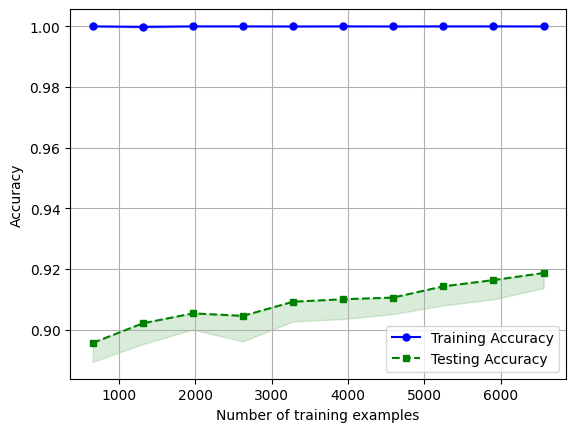

F1 score (Test set): 
0.6053639846743294
ROCAUC score (Test set): 
0.9128301130217464
Precision score (Test set): 
0.8315789473684211
Recall score (Test set): 
0.4759036144578313
Confusion Matrix (Test set): 
[[1276   16]
 [  87   79]]


In [68]:
warnings.filterwarnings("ignore")
all_scores(pipeline_rf, X, y, stratified_kfold)

Accuracy score: 
[0.92455418 0.93278464 0.91632373 0.92455418 0.9122085  0.91906722
 0.92729767 0.9218107  0.92592593 0.93278464]


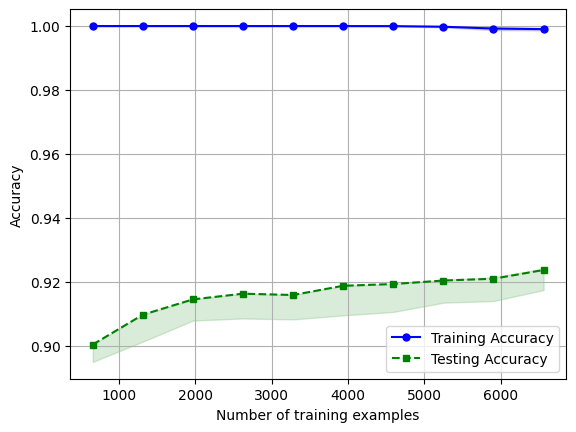

F1 score (Test set): 
0.6169491525423729
ROCAUC score (Test set): 
0.9137836174419038
Precision score (Test set): 
0.7054263565891473
Recall score (Test set): 
0.5481927710843374
Confusion Matrix (Test set): 
[[1254   38]
 [  75   91]]


In [69]:
all_scores(pipeline_xgb, X, y, stratified_kfold)

Accuracy score: 
[0.93141289 0.94101509 0.9122085  0.92866941 0.91906722 0.92592593
 0.93141289 0.92729767 0.92455418 0.93415638]


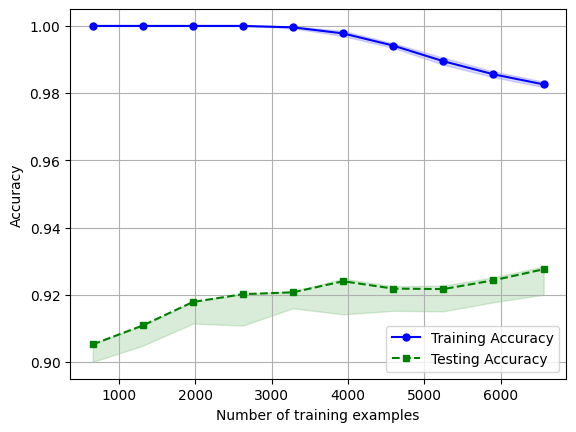

F1 score (Test set): 
0.6506849315068494
ROCAUC score (Test set): 
0.9247687343802454
Precision score (Test set): 
0.753968253968254
Recall score (Test set): 
0.572289156626506
Confusion Matrix (Test set): 
[[1261   31]
 [  71   95]]


In [70]:
all_scores(pipeline_lgbm, X, y, stratified_kfold)

Accuracy score: 
[0.93964335 0.93689986 0.91632373 0.92866941 0.92318244 0.93552812
 0.93004115 0.91906722 0.92729767 0.9382716 ]


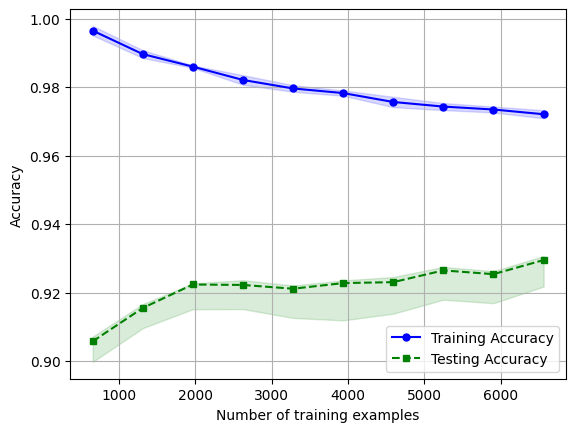

F1 score (Test set): 
0.6391752577319587
ROCAUC score (Test set): 
0.9315481741206311
Precision score (Test set): 
0.744
Recall score (Test set): 
0.5602409638554217
Confusion Matrix (Test set): 
[[1260   32]
 [  73   93]]


In [71]:
all_scores(pipeline_cat, X, y, stratified_kfold)

Accuracy score: 
[0.92318244 0.90672154 0.91083676 0.90534979 0.9122085  0.90672154
 0.91358025 0.91083676 0.91906722 0.92455418]


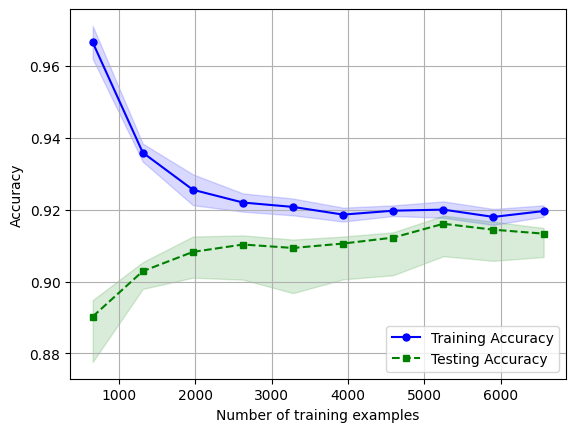

F1 score (Test set): 
0.5072463768115942
ROCAUC score (Test set): 
0.8976229997388936
Precision score (Test set): 
0.6363636363636364
Recall score (Test set): 
0.42168674698795183
Confusion Matrix (Test set): 
[[1252   40]
 [  96   70]]


In [72]:
all_scores(pipeline_ada, X, y, stratified_kfold)

Accuracy score: 
[0.8957476  0.8861454  0.88477366 0.89026063 0.88340192 0.87105624
 0.87791495 0.87928669 0.88751715 0.88477366]


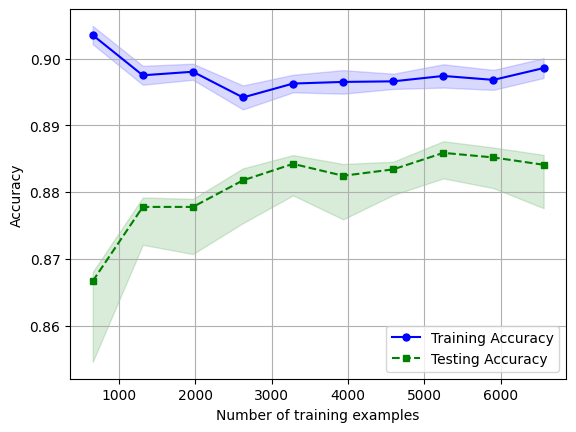

F1 score (Test set): 
0.19387755102040816
ROCAUC score (Test set): 
0.7594021597224814
Precision score (Test set): 
0.6333333333333333
Recall score (Test set): 
0.1144578313253012
Confusion Matrix (Test set): 
[[1281   11]
 [ 147   19]]


In [73]:
all_scores(pipeline_knn, X, y, stratified_kfold)

In [74]:
# # PCA doesn't work very well due to little correlation between features
# preprocessor_pca = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), num_features),
#         ('outlier', RobustScaler(), outlier_features),
#         ('pca', PCA(n_components=1), num_features),
#         ('cat', 'passthrough', cat_features)
#     ])
# pipeline_lgbm_pca = Pipeline(steps=[
#     ('preprocessor', preprocessor_pca),
#     ('classifier', lgb.LGBMClassifier(verbose=-1))
# ])

In [75]:
# all_scores(pipeline_lgbm_pca, X, y, stratified_kfold)

feature reduction to reduce overfitting

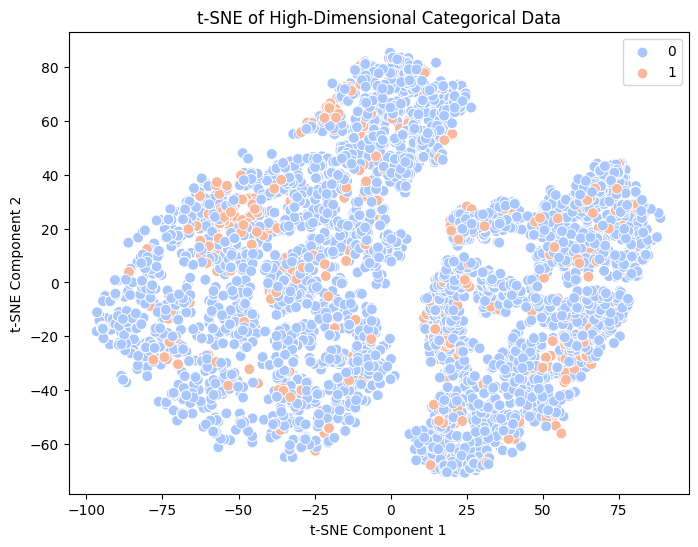

In [76]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X[cat_features])

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0].flatten(), y=X_tsne[:, 1].flatten(), hue=y.values.flatten(), palette='coolwarm', s=60)
plt.title('t-SNE of High-Dimensional Categorical Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

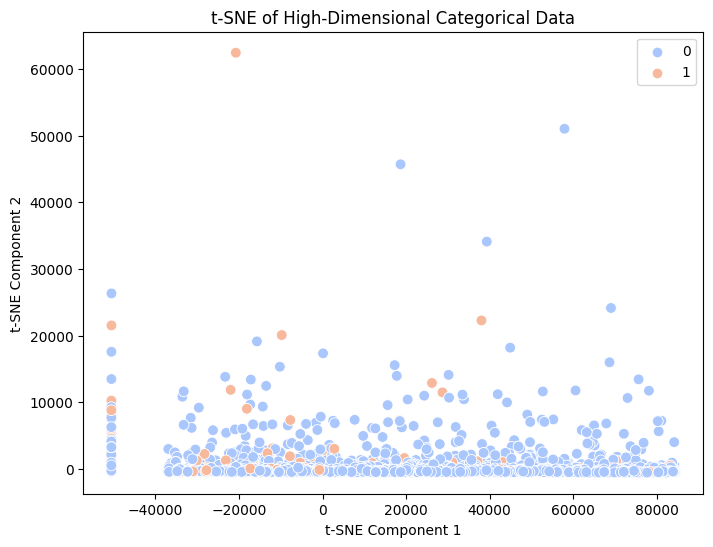

In [77]:
kpca = KernelPCA(n_components=2, random_state=42)
X_kpca = kpca.fit_transform(X[num_features])

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_kpca[:, 0].flatten(), y=X_kpca[:, 1].flatten(), hue=y.values.flatten(), palette='coolwarm', s=60)
plt.title('t-SNE of High-Dimensional Categorical Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

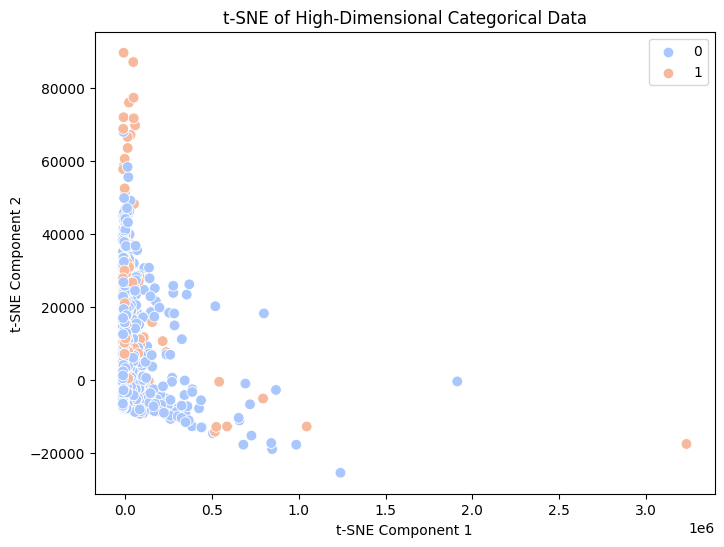

In [78]:
kpca = KernelPCA(n_components=2, random_state=42)
X_kpca = kpca.fit_transform(X[outlier_features])

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_kpca[:, 0].flatten(), y=X_kpca[:, 1].flatten(), hue=y.values.flatten(), palette='coolwarm', s=60)
plt.title('t-SNE of High-Dimensional Categorical Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [79]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import KernelPCA
score = silhouette_score(KernelPCA(n_components=2).fit_transform(X[num_features]), y.values.flatten())
print(f'Silhouette Score for KPCA: {score}')

Silhouette Score for KPCA: 0.008958756595137137


In [80]:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X[num_features])
# X = pd.concat([X, pd.DataFrame(X_pca, columns=[f'PCA Component {i+1}' for i in range(X_pca.shape[1])])], axis=1)
# X = X.drop(num_features, axis=1)

In [81]:
pipeline_lgbm.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income',
                                                   'Months Since Last Claim',
                                                   'Months Since Policy '
                                                   'Inception',
                                                   'clv_avg',
                                                   'complaints_avg']),
                                                 ('outlier', RobustScaler(),
                                                  ['Customer Lifetime Value',
                                                   'Expected Claim Size']),
                                                 ('cat', 'passthrough',
                                                  ['Coverage Index',
                                                   'Education Index',
                                                   'Number of Policies',
                                                   'Vehicle Size Index',
                                                   'Policy Age (in months)',
                                                   'Employment Status_Other',
                                                   'Employment '
                                                   'Status_Unemployed',
                                                   'Marital Status_Married',
                                                   'Marital Status_Single',
                                                   'Response_Yes',
                                                   'Gender_M'])])),
                ('classifier', LGBMClassifier(verbose=-1))])

In [82]:
from mlxtend.feature_selection import SequentialFeatureSelector

# Sequential Backward Selection
f1_scorer = make_scorer(f1_score)
model_lgbm = lgb.LGBMClassifier(verbose=-1)
sbs = SequentialFeatureSelector(model_lgbm, k_features=10, forward=False, scoring=f1_scorer, cv=3)
sbs.fit(X, y.values.flatten())

# Selected features
selected_features = list(sbs.k_feature_names_)

In [83]:
[col for col in X.columns if col not in selected_features]

['Income',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'complaints_avg',
 'Policy Age (in months)',
 'Employment Status_Other',
 'Response_Yes',
 'Gender_M']

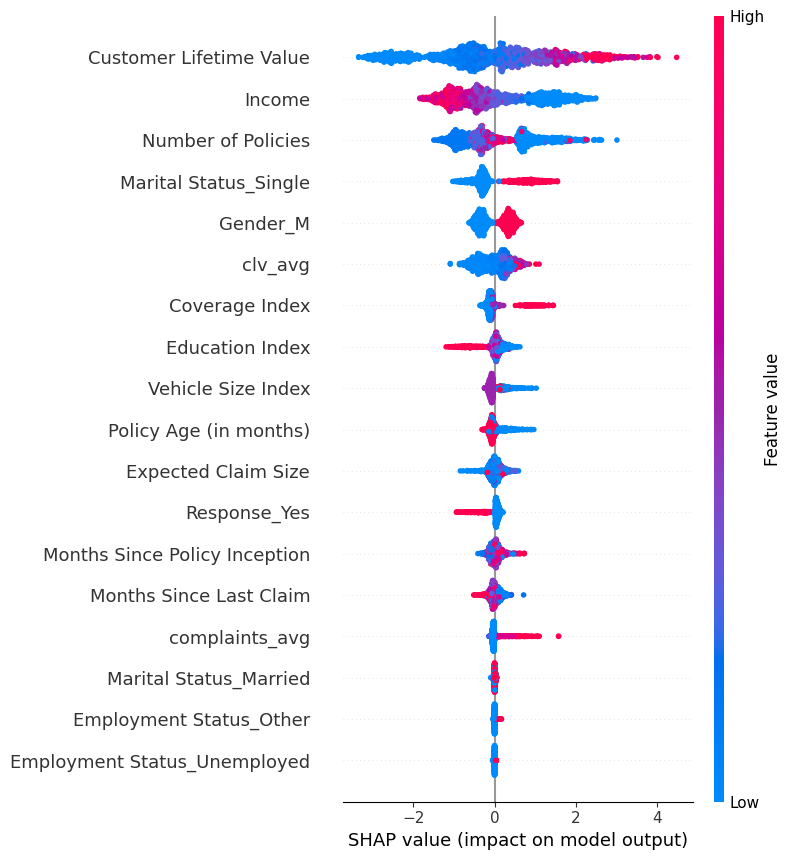

In [84]:
import shap
model_lgbm = lgb.LGBMClassifier(
        learning_rate=0.01,
        max_depth=None,
        n_estimators=1000,
        reg_alpha=0,
        reg_lambda=1,
        verbose = -1
    )

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=314, stratify=y)
model_lgbm.fit(train_X,train_y.values.flatten())
explainer = shap.Explainer(model_lgbm)
shap_values = explainer.shap_values(val_X)
shap.summary_plot(shap_values[1], val_X)

In [85]:
importances = model_lgbm.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display sorted feature importances
print(feature_importance_df)

                          Feature  Importance
0         Customer Lifetime Value        5967
10            Expected Claim Size        3418
5   Months Since Policy Inception        3051
3                          Income        2887
8                         clv_avg        2834
6              Number of Policies        2462
4         Months Since Last Claim        1963
11         Policy Age (in months)        1638
2                 Education Index        1180
1                  Coverage Index        1077
7              Vehicle Size Index         832
9                  complaints_avg         748
15          Marital Status_Single         619
17                       Gender_M         587
16                   Response_Yes         431
14         Marital Status_Married         160
12        Employment Status_Other          91
13   Employment Status_Unemployed          55


In [86]:
drop_columns = ['Employment Status_Unemployed', 'Employment Status_Other', 'Response_Yes', 'complaints_avg']
X = X.drop(drop_columns, axis=1)
df_test = df_test.drop(drop_columns, axis=1)

In [87]:
num_features = ['Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'clv_avg']
outlier_features = ['Customer Lifetime Value', 'Expected Claim Size']
cat_features = [col for col in X.columns if col not in num_features and col not in outlier_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('outlier', RobustScaler(), outlier_features),
        ('cat', 'passthrough', cat_features)
    ])

X_transformed = pd.DataFrame(preprocessor.fit_transform(X), columns=num_features + outlier_features + cat_features)
df_test_transformed = pd.DataFrame(preprocessor.fit_transform(df_test), columns=num_features + outlier_features + cat_features)
X_transformed[cat_features] = X[cat_features].values
df_test_transformed[cat_features] = df_test[cat_features].values
X = X_transformed
df_test = df_test_transformed
X_transformed.head()

Income  Months Since Last Claim  Months Since Policy Inception   clv_avg  \
0  0.355083                -1.218825                       1.111281 -0.256101   
1 -1.230848                 0.401587                      -1.359596  0.131333   
2  0.745293                -0.703240                      -0.721951 -0.078928   
3 -1.230848                -0.334964                      -0.881362 -0.222050   
4  0.293143                 1.801034                       1.616083 -0.248741   

   Customer Lifetime Value  Expected Claim Size  Coverage Index  \
0                -0.622894            -0.385519             0.0   
1                 0.407933             4.946302             0.0   
2                 0.888538             0.328068             1.0   
3                -0.697099            -0.256748             0.0   
4                -0.272326            -0.204073             2.0   

   Education Index  Number of Policies  Vehicle Size Index  \
0              2.0                 1.0                 1.0   
1              0.0                 7.0                 1.0   
2              1.0                 3.0                 1.0   
3              2.0                 1.0                 1.0   
4              2.0                 1.0                 1.0   

   Policy Age (in months)  Marital Status_Married  Marital Status_Single  \
0                     9.0                     1.0                    0.0   
1                     9.0                     0.0                    1.0   
2                     9.0                     0.0                    1.0   
3                     9.0                     0.0                    1.0   
4                     9.0                     1.0                    0.0   

   Gender_M  
0       0.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0

In [88]:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X[[col for col in num_features if col != 'complaints_avg']])
# X_pca = pd.concat([X, pd.DataFrame(X_pca, columns=[f'PCA Component {i+1}' for i in range(X_pca.shape[1])])], axis=1)
# X_pca = X_pca.drop([col for col in num_features if col != 'complaints_avg'], axis=1)

In [89]:
# model_lgbm = lgb.LGBMClassifier(
#         learning_rate=0.01,
#         max_depth=None,
#         n_estimators=1000,
#         reg_alpha=0,
#         reg_lambda=1,
#         verbose = -1
#     )
# all_scores(model_lgbm, X_pca, y, stratified_kfold)

visualizing wrong classified

In [90]:
# results, model, X_train, y_train, X_test, y_test = results_cat
# model.predict_proba(X_test)

In [91]:
# # Get predicted probabilities
# y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
# y_pred = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary predictions
# y_test = y_test.values.flatten()

# # Identify true positives, false positives, true negatives, and false negatives
# true_positive_indices = np.where((y_test == 1) & (y_pred == 1))[0]
# false_positive_indices = np.where((y_test == 0) & (y_pred == 1))[0]
# true_negative_indices = np.where((y_test == 0) & (y_pred == 0))[0]
# false_negative_indices = np.where((y_test == 1) & (y_pred == 0))[0]

# # Create a DataFrame to hold the results
# results_df = pd.DataFrame({
#     'True Label': y_test,
#     'Predicted Label': y_pred,
#     'Predicted Probability': y_pred_proba
# })

# # Visualize confidence scores
# plt.figure(figsize=(12, 8))

# # True Positives
# plt.scatter(true_positive_indices, y_pred_proba[true_positive_indices], color='green', label='True Positives', alpha=0.5)

# # False Positives
# plt.scatter(false_positive_indices, y_pred_proba[false_positive_indices], color='red', label='False Positives', alpha=0.5)

# # True Negatives
# plt.scatter(true_negative_indices, y_pred_proba[true_negative_indices], color='blue', label='True Negatives', alpha=0.5)

# # False Negatives
# plt.scatter(false_negative_indices, y_pred_proba[false_negative_indices], color='orange', label='False Negatives', alpha=0.5)

# # Add labels and legend
# plt.axhline(0.5, color='grey', linestyle='--', label='Decision Threshold (0.5)')
# plt.title('Classification Confidence Scores')
# plt.xlabel('Sample Index')
# plt.ylabel('Predicted Probability (Confidence)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [92]:
# df_fp = X_test.iloc[false_positive_indices, :]
# df_fn = X_test.iloc[false_negative_indices, :]
# df_tp = X_test.iloc[true_positive_indices, :]
# df_tn = X_test.iloc[true_negative_indices, :]

In [93]:
# df_fp.shape, df_fn.shape, df_tp.shape, df_tn.shape

Grid search

In [94]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_eta = [0.001, 0.01, 0.1, 0.3]
param_n_estimators = [300, 800, 1000]
param_max_depth = [3, 7, 10, None]
param_alpha = [0, 0.1, 0.5, 1]  # L1 regularization (reg_alpha)
param_lambda = [0.01, 0.1, 0.5, 1]  # L2 regularization (reg_lambda)

param_grid = {
    "learning_rate": param_eta,     # Corrected without classifier__ prefix
    "n_estimators": param_n_estimators,
    "max_depth": param_max_depth,
    "reg_alpha": param_alpha,       # L1 regularization
    "reg_lambda": param_lambda      # L2 regularization
}

scoring = {"roc_auc": make_scorer(roc_auc_score), "f1_score": make_scorer(f1_score), "accuracy": make_scorer(accuracy_score)}

# gs_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, scoring=make_scorer(f1_score, average='binary'), cv=stratified_kfold)
# gs_xgb.fit(X, y)

# print("Best parameters found: ", gs_xgb.best_params_)
# print("Best f1 score: ", gs_xgb.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 800, 'reg_alpha': 1, 'reg_lambda': 0.5}
Best f1 score:  0.6646792471719386

In [95]:
# gs_lgbm = GridSearchCV(estimator=lgb.LGBMClassifier(verbose=-1), refit='f1_score', param_grid=param_grid, scoring=scoring, cv=stratified_kfold)
# gs_lgbm.fit(X, y.values.flatten())

# print("Best parameters found: ", gs_lgbm.best_params_)
# print("Best f1 score: ", gs_lgbm.best_score_)

# cv_results = gs_lgbm.cv_results_

# # Find the best index based on each scoring metric
# best_index_roc_auc = np.argmax(cv_results['mean_test_roc_auc'])
# best_index_f1 = np.argmax(cv_results['mean_test_f1_score'])
# best_index_accuracy = np.argmax(cv_results['mean_test_accuracy'])

# # Print the best parameters for each scoring metric
# print("\nBest parameters for roc_auc:")
# print("Parameters: ", cv_results['params'][best_index_roc_auc])
# print("Best roc_auc score: ", cv_results['mean_test_roc_auc'][best_index_roc_auc])

# print("\nBest parameters for f1_score:")
# print("Parameters: ", cv_results['params'][best_index_f1])
# print("Best f1 score: ", cv_results['mean_test_f1_score'][best_index_f1])

# print("\nBest parameters for accuracy:")
# print("Parameters: ", cv_results['params'][best_index_accuracy])
# print("Best accuracy score: ", cv_results['mean_test_accuracy'][best_index_accuracy])

Best parameters found:  {'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 800, 'reg_alpha': 0, 'reg_lambda': 1}
Best f1 score:  0.6751818451957323

Best parameters for roc_auc:
Parameters:  {'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 800, 'reg_alpha': 0, 'reg_lambda': 1}
Best roc_auc score:  0.7850299848892086

Best parameters for f1_score:
Parameters:  {'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 800, 'reg_alpha': 0, 'reg_lambda': 1}
Best f1 score:  0.6751818451957323

Best parameters for accuracy:
Parameters:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 800, 'reg_alpha': 1, 'reg_lambda': 0.01}
Best accuracy score:  0.9356652949245543

In [96]:
# param_grid = {
#     "learning_rate": param_eta,     # Corrected without classifier__ prefix
#     "n_estimators": param_n_estimators,
#     "max_depth": param_max_depth,
#     "l2_leaf_reg": param_lambda       # Correct parameter name for CatBoost,
# }

# stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# scoring = {"roc_auc": make_scorer(roc_auc_score), "f1_score": make_scorer(f1_score), "accuracy": make_scorer(accuracy_score)}
# gs_cat = GridSearchCV(estimator=CatBoostClassifier(verbose=0), 
#                       param_grid=param_grid, 
#                       scoring=scoring, 
#                       refit='f1_score',
#                       cv=stratified_kfold, 
#                       error_score='raise')  # Add error_score='raise'

# # Fitting the model
# gs_cat.fit(X, y.values.flatten())

# print("Best parameters found: ", gs_cat.best_params_)
# print("Best f1 score: ", gs_cat.best_score_)

# cv_results = gs_cat.cv_results_

# # Find the best index based on each scoring metric
# best_index_roc_auc = np.argmax(cv_results['mean_test_roc_auc'])
# best_index_f1 = np.argmax(cv_results['mean_test_f1_score'])
# best_index_accuracy = np.argmax(cv_results['mean_test_accuracy'])

# # Print the best parameters for each scoring metric
# print("\nBest parameters for roc_auc:")
# print("Parameters: ", cv_results['params'][best_index_roc_auc])
# print("Best roc_auc score: ", cv_results['mean_test_roc_auc'][best_index_roc_auc])

# print("\nBest parameters for f1_score:")
# print("Parameters: ", cv_results['params'][best_index_f1])
# print("Best f1 score: ", cv_results['mean_test_f1_score'][best_index_f1])

# print("\nBest parameters for accuracy:")
# print("Parameters: ", cv_results['params'][best_index_accuracy])
# print("Best accuracy score: ", cv_results['mean_test_accuracy'][best_index_accuracy])

Best parameters found:  {'l2_leaf_reg': 1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}
Best f1 score:  0.6625969255977362

Best parameters for roc_auc:
Parameters:  {'l2_leaf_reg': 1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}
Best roc_auc score:  0.7810937533498011

Best parameters for f1_score:
Parameters:  {'l2_leaf_reg': 1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}
Best f1 score:  0.6625969255977362

Best parameters for accuracy:
Parameters:  {'l2_leaf_reg': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Best accuracy score:  0.9336076817558299

In [97]:
# param_grid = {
#     'n_estimators': [300, 800, 1000],
#     'learning_rate': [0.001, 0.01, 0.1, 0.3],
#     'base_estimator__max_depth': [3, 7, 10, None],
#     'base_estimator__min_samples_split': [2, 10, 20],
#     'base_estimator__min_samples_leaf': [1, 5, 10],
#     'base_estimator__max_leaf_nodes': [None, 10, 30, 50],
# }

# base_estimator = DecisionTreeClassifier()

# adaboost = AdaBoostClassifier(base_estimator=base_estimator)

# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, refit='f1_score', scoring=scoring, cv=5, n_jobs=-1)
# grid_search.fit(X, y.values.flatten())

# cv_results = grid_search.cv_results_

# # Find the best index based on each scoring metric
# best_index_roc_auc = np.argmax(cv_results['mean_test_roc_auc'])
# best_index_f1 = np.argmax(cv_results['mean_test_f1_score'])
# best_index_accuracy = np.argmax(cv_results['mean_test_accuracy'])

# # Print the best parameters for each scoring metric
# print("\nBest parameters for roc_auc:")
# print("Parameters: ", cv_results['params'][best_index_roc_auc])
# print("Best roc_auc score: ", cv_results['mean_test_roc_auc'][best_index_roc_auc])

# print("\nBest parameters for f1_score:")
# print("Parameters: ", cv_results['params'][best_index_f1])
# print("Best f1 score: ", cv_results['mean_test_f1_score'][best_index_f1])

# print("\nBest parameters for accuracy:")
# print("Parameters: ", cv_results['params'][best_index_accuracy])
# print("Best accuracy score: ", cv_results['mean_test_accuracy'][best_index_accuracy])

In [98]:
best_param_xgb = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 800, 'reg_alpha': 1, 'reg_lambda': 0.5}
best_param_lgbm = {'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 800, 'reg_alpha': 0, 'reg_lambda': 1, 'verbose':-1}
best_param_cat = {'l2_leaf_reg': 1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300, 'verbose': 0}

pipeline_xgb = Pipeline(steps=[
    ('classifier', xgb.XGBClassifier(
        **best_param_xgb
        ))
    ])

pipeline_lgbm = Pipeline(steps=[
    ('classifier', lgb.LGBMClassifier(
        **best_param_lgbm
    ))
    ])


pipeline_cat = Pipeline(steps=[
    ('classifier', CatBoostClassifier(
        **best_param_cat
    ))
    ])

In [99]:
def evaluate_model_with_upsampling(X, y, model, n_splits=5):
    kf = StratifiedKFold(n_splits)
    results = {
        'accuracy': [],
        'roc_auc': [],
        'f1_score': [],
        'precision': [],
        'recall': [],
        'confusion_matrices': []
    }

    for train_index, test_index in kf.split(X, y):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Upsample the training data
        class_0_instances = list(y_train.value_counts().values)[0]
        ros = RandomOverSampler(sampling_strategy={1: int(class_0_instances/2)}, random_state=42)
        X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train, y_train)
        print(X_train_upsampled.shape, y_train_upsampled.shape)

        # Fit the model
        model.fit(X_train_upsampled, y_train_upsampled.values.flatten())

        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')  # or 'macro'/'micro' depending on your needs
        recall = recall_score(y_test, y_pred, average='weighted') 

        # Store the results
        results['accuracy'].append(accuracy)
        results['roc_auc'].append(roc_auc)
        results['f1_score'].append(f1)
        results['precision'].append(precision)
        results['recall'].append(recall)


        # Calculate and store the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        results['confusion_matrices'].append(cm)

    return results, model, X_train_upsampled, y_train_upsampled, X_test, y_test

In [100]:
results_xgb = evaluate_model_with_upsampling(X, y, pipeline_xgb, n_splits=5)
results_xgb[0]

(7749, 14) (7749, 1)
(7749, 14) (7749, 1)
(7749, 14) (7749, 1)
(7750, 14) (7750, 1)
(7750, 14) (7750, 1)


{'accuracy': [0.9080932784636488,
  0.9087791495198903,
  0.9094650205761317,
  0.9012345679012346,
  0.897119341563786],
 'roc_auc': [0.9117600432690515,
  0.8988725801036963,
  0.887360587862285,
  0.9036767673019568,
  0.9089829635848365],
 'f1_score': [0.6378378378378378,
  0.5981873111782477,
  0.5950920245398773,
  0.5909090909090909,
  0.5901639344262296],
 'precision': [0.9180830331883345,
  0.908540341206263,
  0.908063410311527,
  0.9060289931198545,
  0.9061272722700505],
 'recall': [0.9080932784636488,
  0.9087791495198903,
  0.9094650205761317,
  0.9012345679012346,
  0.897119341563786],
 'confusion_matrices': [array([[1206,   86],
         [  48,  118]]),
  array([[1226,   66],
         [  67,   99]]),
  array([[1229,   63],
         [  69,   97]]),
  array([[1210,   81],
         [  63,  104]]),
  array([[1200,   91],
         [  59,  108]])]}

In [101]:
results_lgbm = evaluate_model_with_upsampling(X, y, pipeline_lgbm, n_splits=5)
results_lgbm[0]

(7749, 14) (7749, 1)
(7749, 14) (7749, 1)
(7749, 14) (7749, 1)
(7750, 14) (7750, 1)
(7750, 14) (7750, 1)


{'accuracy': [0.9183813443072703,
  0.9039780521262003,
  0.9108367626886146,
  0.9074074074074074,
  0.9080932784636488],
 'roc_auc': [0.9186373978887687,
  0.9067057704502219,
  0.9037729866835764,
  0.9146787756786968,
  0.9210703302921655],
 'f1_score': [0.6590257879656161,
  0.6174863387978142,
  0.6107784431137724,
  0.6239554317548747,
  0.6193181818181819],
 'precision': [0.9222475582240812,
  0.913139621102584,
  0.9113076059530265,
  0.9138069744309871,
  0.9126025271729498],
 'recall': [0.9183813443072703,
  0.9039780521262003,
  0.9108367626886146,
  0.9074074074074074,
  0.9080932784636488],
 'confusion_matrices': [array([[1224,   68],
         [  51,  115]]),
  array([[1205,   87],
         [  53,  113]]),
  array([[1226,   66],
         [  64,  102]]),
  array([[1211,   80],
         [  55,  112]]),
  array([[1215,   76],
         [  58,  109]])]}

In [102]:
results_cat = evaluate_model_with_upsampling(X, y, pipeline_cat, n_splits=5)
results_cat[0]

(7749, 14) (7749, 1)
(7749, 14) (7749, 1)
(7749, 14) (7749, 1)
(7750, 14) (7750, 1)
(7750, 14) (7750, 1)


{'accuracy': [0.9053497942386831,
  0.9108367626886146,
  0.9108367626886146,
  0.9046639231824417,
  0.906721536351166],
 'roc_auc': [0.9177561639747845,
  0.9005464582789362,
  0.8752750941847887,
  0.8987277188458095,
  0.9144793294897424],
 'f1_score': [0.6406249999999999,
  0.608433734939759,
  0.5987654320987655,
  0.603988603988604,
  0.6179775280898876],
 'precision': [0.9196552295283018,
  0.9108367626886146,
  0.9090096075375025,
  0.9090483882006772,
  0.9123508830773227],
 'recall': [0.9053497942386831,
  0.9108367626886146,
  0.9108367626886146,
  0.9046639231824417,
  0.906721536351166],
 'confusion_matrices': [array([[1197,   95],
         [  43,  123]]),
  array([[1227,   65],
         [  65,  101]]),
  array([[1231,   61],
         [  69,   97]]),
  array([[1213,   78],
         [  61,  106]]),
  array([[1212,   79],
         [  57,  110]])]}

In [103]:
def stratified_kfold_oversample_fit(X, y, model, k_folds=5, random_state=42):    
    # Stratified KFold setup
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=random_state)

    optimal_thresholds = []
    auc_scores = []
    
    for train_idx, test_idx in skf.split(X, y):
        # Splitting the data into train and test sets
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Oversampling the minority class
        class_0_instances = list(y_train.value_counts().values)[0]
        ros = RandomOverSampler(sampling_strategy={1: int(class_0_instances / 2)}, random_state=random_state)
        X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train, y_train)
        X_train_upsampled, y_train_upsampled = X_train, y_train

        # Fit the model
        model.fit(X_train_upsampled, y_train_upsampled.values.flatten())

        # Calculate AUC score
        auc_score = roc_auc_score(y_test, model.predict(X_test))
        auc_scores.append(auc_score)

        # ROC Curve calculation
        fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:, 1], drop_intermediate=False)

        # Finding the optimal threshold
        optimal_threshold = thresholds[np.argmin(np.abs(fpr + tpr - 1))]
        optimal_thresholds.append(optimal_threshold)

    # Calculating threshold variance
    threshold_variance = np.var(optimal_thresholds)

    return {
        'optimal_thresholds': optimal_thresholds,
        'mean_auc': np.mean(auc_scores),
        'threshold_variance': threshold_variance
    }

In [104]:
warnings.filterwarnings("ignore")
result_lgbm = stratified_kfold_oversample_fit(X, y, pipeline_lgbm, k_folds=5, random_state=42)
result_cat = stratified_kfold_oversample_fit(X, y, pipeline_cat, k_folds=5, random_state=42)
result_xgb = stratified_kfold_oversample_fit(X, y, pipeline_xgb, k_folds=5, random_state=42)
# result_ada = stratified_kfold_oversample_fit(X, y, pipeline_ada, k_folds=5, random_state=42)

In [105]:
optimal_threshold_lgbm = np.mean(result_lgbm['optimal_thresholds'])
optimal_threshold_cat = np.mean(result_cat['optimal_thresholds'])
optimal_threshold_xgb = np.mean(result_xgb['optimal_thresholds'])
# optimal_threshold_ada = np.mean(result_ada['optimal_thresholds'])

In [106]:
result_lgbm, result_cat, result_xgb

({'optimal_thresholds': [0.2064438140309881,
   0.19284672277151532,
   0.21521300003242771,
   0.20335786307986162,
   0.20093505428613787],
  'mean_auc': 0.7789595521072723,
  'threshold_variance': 5.312314344714966e-05},
 {'optimal_thresholds': [0.1977490599494493,
   0.16766060435394592,
   0.187633265047942,
   0.1772858649374719,
   0.17766186144445478],
  'mean_auc': 0.7714677552932434,
  'threshold_variance': 0.00010512397090483993},
 {'optimal_thresholds': [0.21473566,
   0.21689148,
   0.22327952,
   0.20878577,
   0.20624597],
  'mean_auc': 0.773512100356548,
  'threshold_variance': 3.6464742e-05})

In [107]:
# optimal_threshold_lgbm, optimal_threshold_cat, optimal_threshold_xgb, optimal_threshold_ada
optimal_threshold_lgbm, optimal_threshold_cat, optimal_threshold_xgb

(0.20375929084018612, 0.1815981311466528, 0.21398768)

In [108]:
# Define your all_scores function
def all_scores(model, X_train, y_train, optimal_threshold=0.5, scoring_strategy='accuracy'):
    # Cross-validation scores
    scores_model = cross_val_score(estimator=model, X=X_train, y=y_train.values.flatten(), cv=5, scoring=scoring_strategy)  # Adjust cv as needed
    print("Cross-validation scores: ")
    print(scores_model)
    
#     Learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train.values.flatten(), 
                                                             train_sizes=np.linspace(0.1, 1, 10), cv=5)  # Adjust cv as needed
    learning_curve_plot(train_sizes, train_scores, test_scores)
    
    # Train-test split
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, 
                                                                                test_size=0.2, stratify=y_train)
    class_0_instances = list(y_train_split.value_counts().values)[0]
    ros = RandomOverSampler(sampling_strategy={1: int(class_0_instances/2)}, random_state=42)
    X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train_split, y_train_split)
    model.fit(X_train_upsampled, y_train_upsampled.values.flatten())
    
    # Predictions on the test set
    y_proba_split = model.predict_proba(X_test_split)[:, 1]  # Get probabilities for the positive class
    y_pred_split = (y_proba_split >= optimal_threshold).astype(int)  # Apply the threshold
    
    # Evaluation metrics
    print("F1 score (Test set): ")
    print(f1_score(y_test_split, y_pred_split))
    
    print("ROCAUC score (Test set): ")
    print(roc_auc_score(y_test_split, y_proba_split))  # Use probabilities for ROC AUC
    
    print("Precision score (Test set): ")
    print(precision_score(y_test_split, y_pred_split))
    
    print("Recall score (Test set): ")
    print(recall_score(y_test_split, y_pred_split))
    
    # Confusion matrix on the test set
    cm = confusion_matrix(y_test_split, y_pred_split)
    print("Confusion Matrix (Test set): ")
    print(cm)


Cross-validation scores: 
[0.9218107  0.92249657 0.91975309 0.9218107  0.9266118 ]


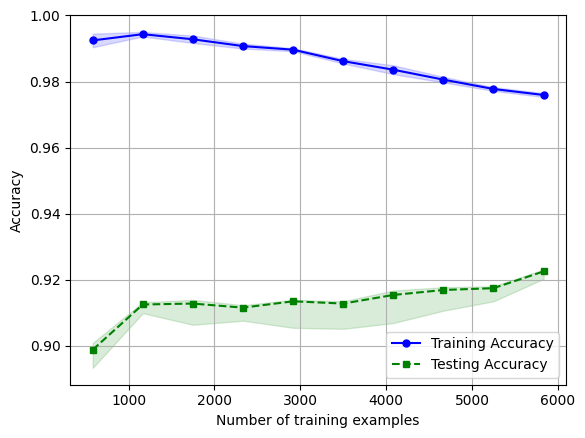

F1 score (Test set): 
0.5806451612903226
ROCAUC score (Test set): 
0.9098157335223245
Precision score (Test set): 
0.4701492537313433
Recall score (Test set): 
0.7590361445783133
Confusion Matrix (Test set): 
[[1150  142]
 [  40  126]]


In [109]:
# # Example usage with your pipeline
# # Assuming you have your training data in X_train and y_train
all_scores(pipeline_xgb, X, y, optimal_threshold=optimal_threshold_xgb, scoring_strategy='accuracy')

Cross-validation scores: 
[0.93347051 0.92112483 0.9218107  0.92043896 0.92386831]


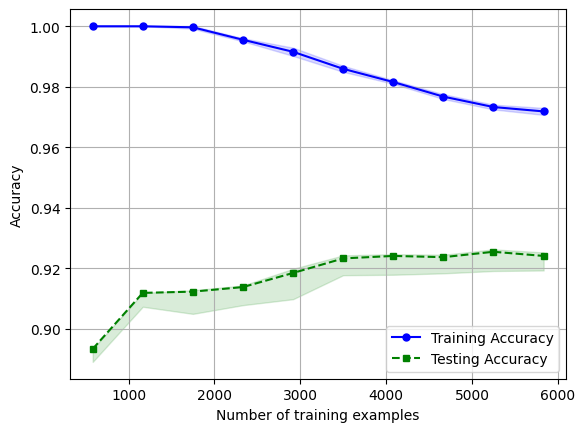

F1 score (Test set): 
0.5548902195608783
ROCAUC score (Test set): 
0.9221576709314034
Precision score (Test set): 
0.41492537313432837
Recall score (Test set): 
0.8373493975903614
Confusion Matrix (Test set): 
[[1096  196]
 [  27  139]]


In [110]:
all_scores(pipeline_lgbm, X, y, optimal_threshold=optimal_threshold_lgbm, scoring_strategy='accuracy')

Cross-validation scores: 
[0.92729767 0.92112483 0.91289438 0.9122085  0.9218107 ]


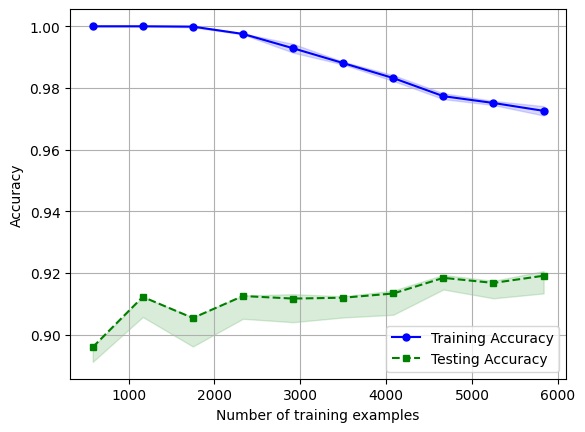

F1 score (Test set): 
0.5502008032128515
ROCAUC score (Test set): 
0.9083889738520646
Precision score (Test set): 
0.4126506024096386
Recall score (Test set): 
0.8253012048192772
Confusion Matrix (Test set): 
[[1097  195]
 [  29  137]]


In [111]:
all_scores(pipeline_cat, X, y, optimal_threshold=optimal_threshold_cat, scoring_strategy='accuracy')

In [112]:
# all_scores(pipeline_ada, X, y, optimal_threshold=optimal_threshold_ada, scoring_strategy='accuracy')

In [113]:
def evaluate_model_with_upsampling(X, y, model, optimal_threshold=0.35, n_splits=5):
    kf = StratifiedKFold(n_splits=n_splits)
    results = {
        'accuracy': [],
        'roc_auc': [],
        'f1_score': [],
        'precision': [],
        'recall': [],
        'confusion_matrices': []
    }

    for train_index, test_index in kf.split(X, y):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Upsample the training data
        class_0_instances = list(y_train.value_counts().values)[0]
        ros = RandomOverSampler(sampling_strategy={1: int(class_0_instances/2)}, random_state=42)
        X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train, y_train)

        # Fit the model
        model.fit(X_train_upsampled, y_train_upsampled.values.flatten())

        # Make predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Apply the optimal threshold to convert probabilities to class predictions
        y_pred = (y_pred_proba >= optimal_threshold).astype(int)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)  # or 'macro'/'micro' depending on your needs
        recall = recall_score(y_test, y_pred)

        # Store the results
        results['accuracy'].append(accuracy)
        results['roc_auc'].append(roc_auc)
        results['f1_score'].append(f1)
        results['precision'].append(precision)
        results['recall'].append(recall)

        # Calculate and store the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        results['confusion_matrices'].append(cm)

    return results, model, X_train_upsampled, y_train_upsampled, X_test, y_test


In [114]:
results_xgb = evaluate_model_with_upsampling(X, y, pipeline_xgb, optimal_threshold_xgb, n_splits=4)

In [115]:
results_lgbm = evaluate_model_with_upsampling(X, y, pipeline_lgbm, optimal_threshold_lgbm, n_splits=4)

In [116]:
results_cat = evaluate_model_with_upsampling(X, y, pipeline_cat, optimal_threshold_cat, n_splits=4)

In [117]:
results_lgbm[0], results_cat[0], results_xgb[0]

({'accuracy': [0.8222709818979704,
   0.8628634119583105,
   0.8386388583973655,
   0.827113062568606],
  'roc_auc': [0.9276434865444153,
   0.9030066682543463,
   0.912922385854542,
   0.9115402487846727],
  'f1_score': [0.5221238938053097,
   0.5535714285714286,
   0.5377358490566038,
   0.5007923930269413],
  'precision': [0.37659574468085105,
   0.4403409090909091,
   0.39953271028037385,
   0.3735224586288416],
  'recall': [0.8509615384615384,
   0.7451923076923077,
   0.8221153846153846,
   0.7596153846153846],
  'confusion_matrices': [array([[1322,  293],
          [  31,  177]]),
   array([[1418,  197],
          [  53,  155]]),
   array([[1357,  257],
          [  37,  171]]),
   array([[1349,  265],
          [  50,  158]])]},
 {'accuracy': [0.8107515085024685,
   0.8475041140976413,
   0.845225027442371,
   0.8084522502744237],
  'roc_auc': [0.9120236961181234,
   0.877426172898309,
   0.8880230673910972,
   0.8978112191402153],
  'f1_score': [0.5007235890014471,
   0.512280

In [118]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
def apply_threshold(probs, threshold):
    """
    Apply a custom threshold to probabilities.
    
    Parameters:
    - probs: Model's predicted probabilities.
    - threshold: Optimal threshold for classification.
    
    Returns:
    - Binary classification (0 or 1) based on the threshold.
    """
    return (probs[:, 1] >= threshold).astype(int)

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    
    def fit(self, X, y):
        self.base_models_ = [list() for _ in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=1)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                
                X_train, y_train = X.iloc[train_index], y.iloc[train_index]
                
                # Handle class imbalance
                class_0_instances = list(y_train.value_counts().values)[0]
                ros = RandomOverSampler(sampling_strategy={1: int(class_0_instances / 2)}, random_state=42)
                X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train, y_train)
                X_train_upsampled, y_train_upsampled = X_train, y_train
                
                instance.fit(X_train_upsampled, y_train_upsampled.values.flatten())
                
                # Predict probabilities
                y_pred = instance.predict_proba(X.iloc[holdout_index])[:,1]  # Probabilities for class 1
                
                out_of_fold_predictions[holdout_index, i] = y_pred
        print(out_of_fold_predictions.shape)
        # Fit the meta-model on the out-of-fold predictions
        # self.meta_model_.fit(out_of_fold_predictions, y, overwrite_warning=True)
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    def predict(self, X):
        # Predict meta-features for the test set using the average predictions of each base model
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        
        return self.meta_model_.predict(meta_features)

# Ensure `apply_threshold` and `optimal_threshold_*` functions are defined elsewhere


In [119]:
X.shape, y.shape

((7290, 14), (7290, 1))

In [120]:
# Define base models: XGBoost, LightGBM, CatBoost
warnings.filterwarnings("ignore")
base_models = [
    Pipeline(steps=[
    ('classifier', lgb.LGBMClassifier(
        **best_param_lgbm
    ))
    ]),
    Pipeline(steps=[
    ('classifier', CatBoostClassifier(
        **best_param_cat
    ))
    ]),
    Pipeline(steps=[
    ('classifier', xgb.XGBClassifier(
        **best_param_xgb
    ))
    ])
]

# Define the meta model (Logistic Regression)
meta_model = LogisticRegression()
# meta_model = TabPFNClassifier()
# Initialize the stacking model
stacking_model = StackingAveragedModels(base_models=base_models, meta_model=meta_model, n_folds=5)

# Train the stacking model
stacking_model.fit(X, y)


(7290, 3)


StackingAveragedModels(base_models=[Pipeline(steps=[('classifier',
                                                     LGBMClassifier(learning_rate=0.01,
                                                                    max_depth=None,
                                                                    n_estimators=800,
                                                                    reg_alpha=0,
                                                                    reg_lambda=1,
                                                                    verbose=-1))]),
                                    Pipeline(steps=[('classifier',
                                                     <catboost.core.CatBoostClassifier object at 0x786caf61dc90>)]),
                                    Pipeline(steps=[('classifier',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,...
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=800,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...))])],
                       meta_model=LogisticRegression())

In [121]:
pipeline_xgb = Pipeline(steps=[
    ('classifier', xgb.XGBClassifier(
        # **best_param_xgb
        ))
    ])

pipeline_lgbm = Pipeline(steps=[
    ('classifier', lgb.LGBMClassifier(
        # **best_param_lgbm
        verbose=-1
    ))
    ])


pipeline_cat = Pipeline(steps=[
    ('classifier', CatBoostClassifier(
        # **best_param_cat
        verbose=0
    ))
    ])

In [122]:
warnings.filterwarnings("ignore")
class_0_instances = list(y.value_counts().values)[0]
ros = RandomOverSampler(sampling_strategy={1: int(class_0_instances / 2)}, random_state=42)
X_train_upsampled, y_train_upsampled = ros.fit_resample(X, y)
X_train_upsampled, y_train_upsampled = X, y

pipeline_lgbm.fit(X_train_upsampled, y_train_upsampled.values.flatten())
pipeline_cat.fit(X_train_upsampled, y_train_upsampled.values.flatten())
pipeline_xgb.fit(X_train_upsampled, y_train_upsampled.values.flatten())

y_pred_lgbm_proba = pipeline_lgbm.predict_proba(df_test)
y_pred_cat_proba = pipeline_cat.predict_proba(df_test)
y_pred_xgb_proba = pipeline_xgb.predict_proba(df_test)

In [123]:
from scipy.stats import mode
warnings.filterwarnings("ignore")

y_pred_lgbm = pipeline_lgbm.predict(df_test)
y_pred_cat = pipeline_cat.predict(df_test)
y_pred_xgb = pipeline_xgb.predict(df_test)

# y_pred_lgbm = apply_threshold(y_pred_lgbm_proba, optimal_threshold_lgbm)
# y_pred_cat = apply_threshold(y_pred_cat_proba, optimal_threshold_cat)
# y_pred_xgb = apply_threshold(y_pred_xgb_proba, optimal_threshold_xgb)
y_test_pred_stacking = stacking_model.predict(df_test)

predictions_df = pd.DataFrame({
    # 'XGB': y_pred_xgb,
    'LGBM': y_pred_lgbm,
    'Stacking': y_test_pred_stacking,
    'Cat': y_pred_cat
})

y_test_pred = mode(predictions_df, axis=1)[0].flatten()

In [124]:
sum(y_pred_cat) / len(y_pred_cat)

0.0878524945770065

In [125]:
sum(y_pred_lgbm) / len(y_pred_lgbm)

0.09056399132321041

In [126]:
sum(y_test_pred_stacking) / len(y_test_pred_stacking)

0.08459869848156182

In [127]:
sum(y_test_pred) / len(y_test_pred)

0.08459869848156182

In [128]:
X.shape

(7290, 14)

In [129]:
pd.DataFrame({'CustomerID': ids, 'Claim over 1k': y_test_pred}).to_csv('submit10.csv', index=False)